# How well can an LLM recognize that the graph of an EBM depicts a well-known function?

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os

import t2ebm

import t2ebm.graphs as graphs

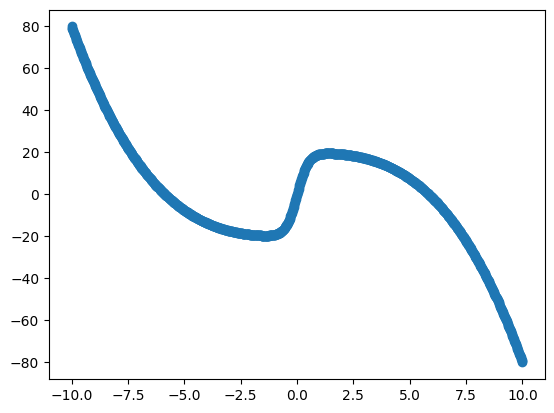

In [37]:
# for each, function draw 1000 samples from a uniform distribution and plot the function
function_points = []
x = np.linspace(-10, 10, 1000)
y = -1/10 * x ** 3 + 20 * np.tanh(2*x) 
plt.scatter(x, y)
plt.show()

# F-Bench (Well-known Functions)

30


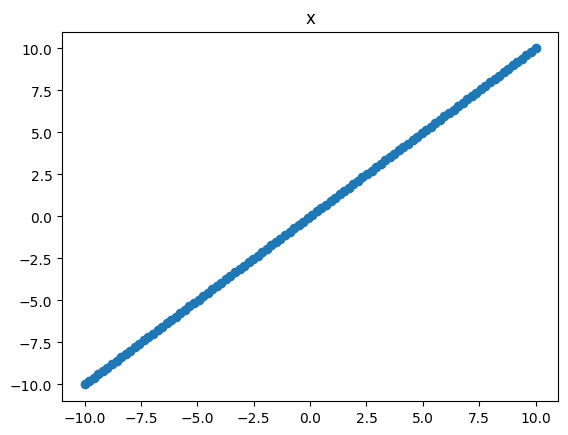

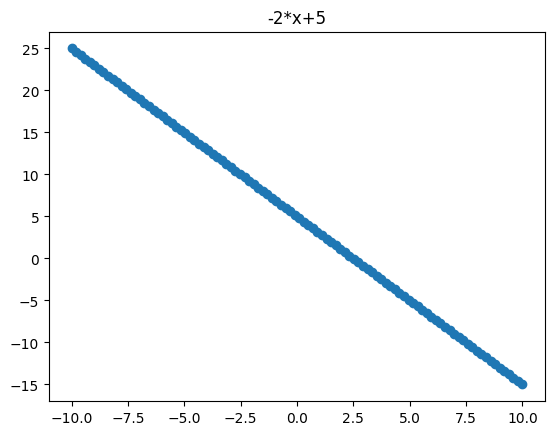

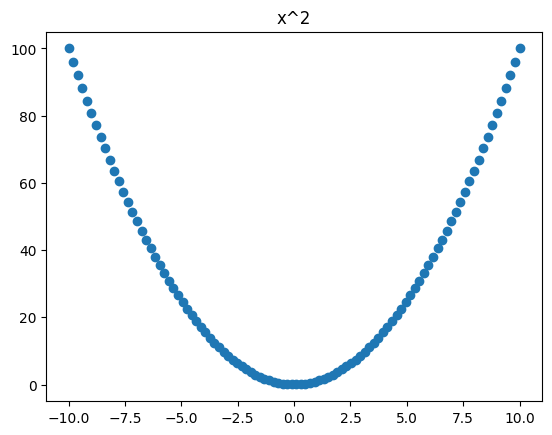

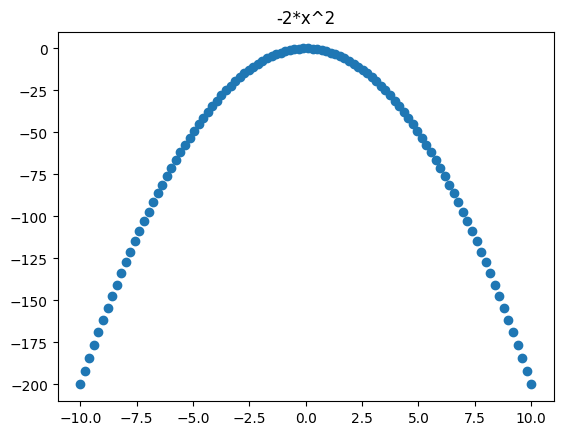

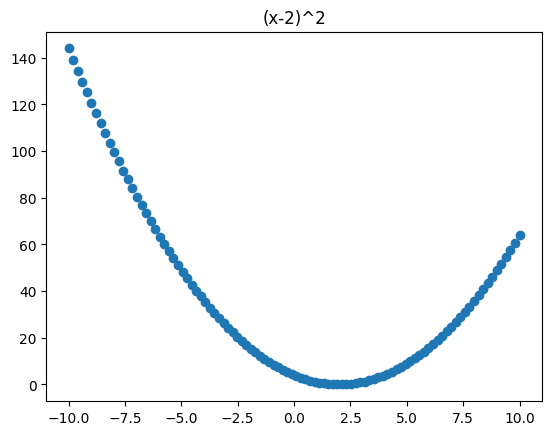

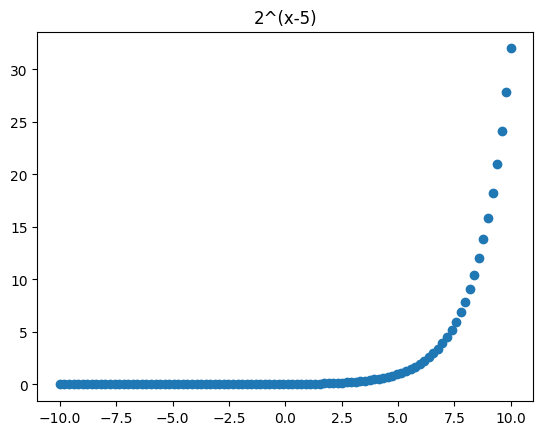

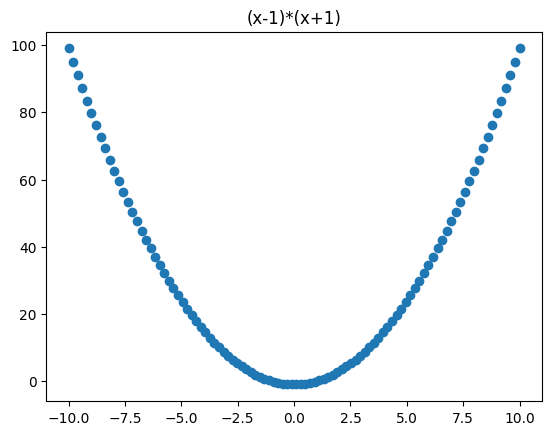

KeyboardInterrupt: 

In [38]:
fbench = [
    # polynomials
    (lambda x: x, 'x'),
    (lambda x: -2*x+5, '-2*x+5'),
    (lambda x: x**2, 'x^2'),
    (lambda x: -2*x**2, '-2*x^2'),
    (lambda x: (x-2)**2, '(x-2)^2'),
    (lambda x: 2 ** (x-5), '2^(x-5)'),
    (lambda x: (x-1)*(x+1), '(x-1)*(x+1)'),
    (lambda x: x**3, 'x^3'),
    (lambda x: -3*x**3, '-3*x^3'),
    (lambda x: x ** 4, 'x^4'),
    (lambda x: (x + 4) ** 4, '(x + 4)^4'),

    # sign
    (lambda x: np.sign(x), 'sign(x)'),
    (lambda x: np.sign(x+3), 'sign(x+3)'),
    (lambda x: np.sign(x-1), 'sign(x-1)'),

    # abs
    (lambda x: np.abs(x), '|x|'),
    (lambda x: np.abs(2*x+5), '|2*x+4|'),

    # root
    (lambda x: np.sqrt(x+10), 'sqrt(x+10)'),
    (lambda x: np.sqrt(x ** 2 + 3*x + 5), 'sqrt(x ** 2 + 3*x +5)'),

    # exponential
    (lambda x: np.exp(-x**2), 'exp(-x^2)'),
    (lambda x: np.exp(x), 'exp(x)'),
    (lambda x: np.exp(-x), 'exp(-x)'),

    # logarithm
    (lambda x: np.log(x+10), 'log(x+10)'),

    # trigonometric
    (lambda x: np.sin(x), 'sin(x)'),
    (lambda x: np.cos(x), 'cos(x)'),
    (lambda x: np.sinh(x), 'sinh(x)'),
    (lambda x: np.cosh(x), 'cosh(x)'),
    (lambda x: np.tanh(x), 'tanh(x)'),
    (lambda x: np.arcsinh(x), 'arcsinh(x)'),
    (lambda x: np.arctan(x), 'arctan(x)'),

    # logistic function
    (lambda x: 1/(1+np.exp(-x)), '1/(1+exp(-x))'),
]

print(len(fbench))

# for each, function draw 1000 samples from a uniform distribution and plot the function
x = np.linspace(-10, 10, 100)
for f, n in fbench:
    y = f(x)
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

### Generate mulitple choice questions. graphs are combined so that the correct option has a fairly unique shape among all options

Question  0


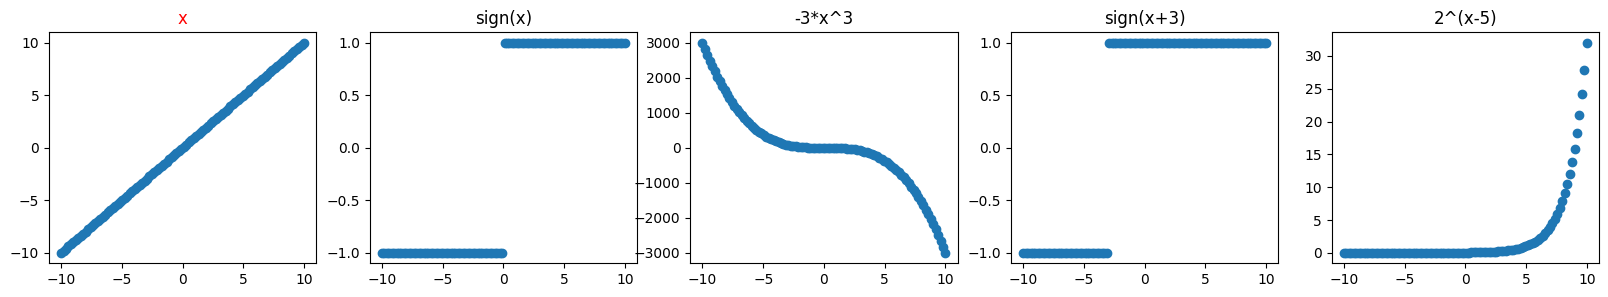

Question  1


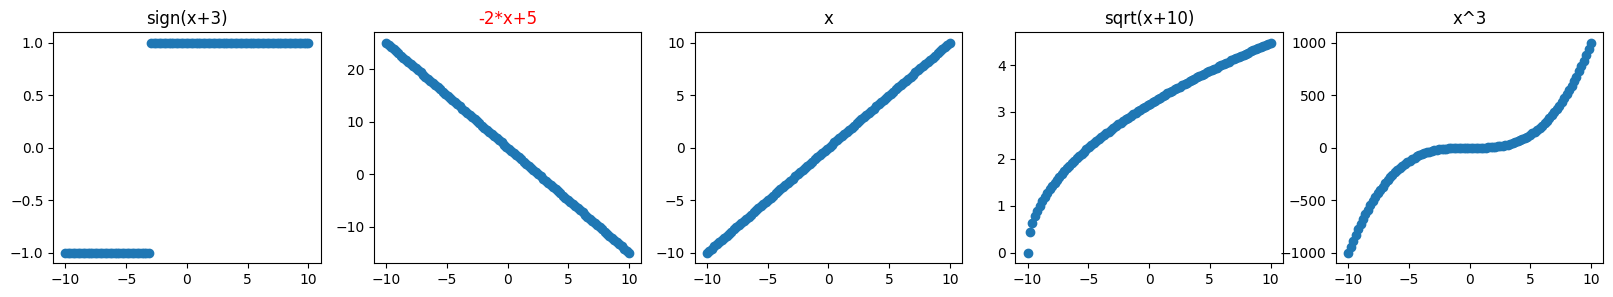

Question  2


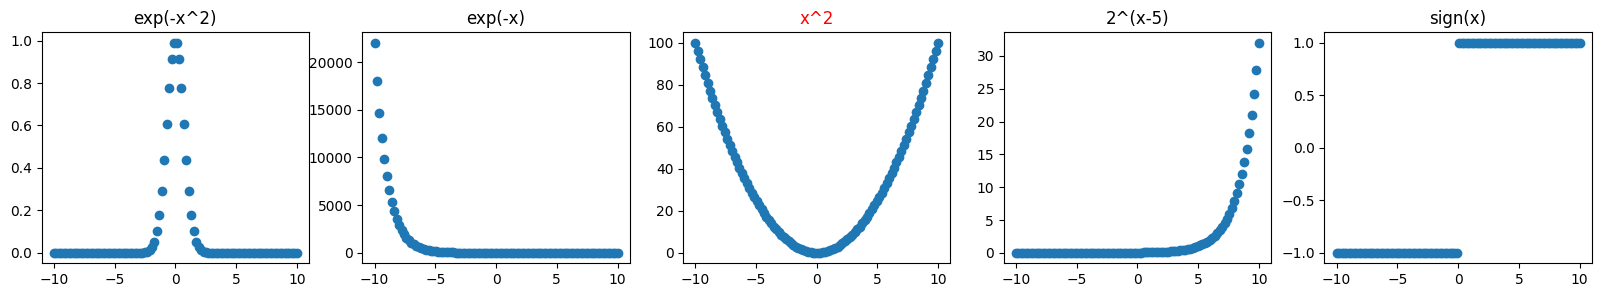

Question  3


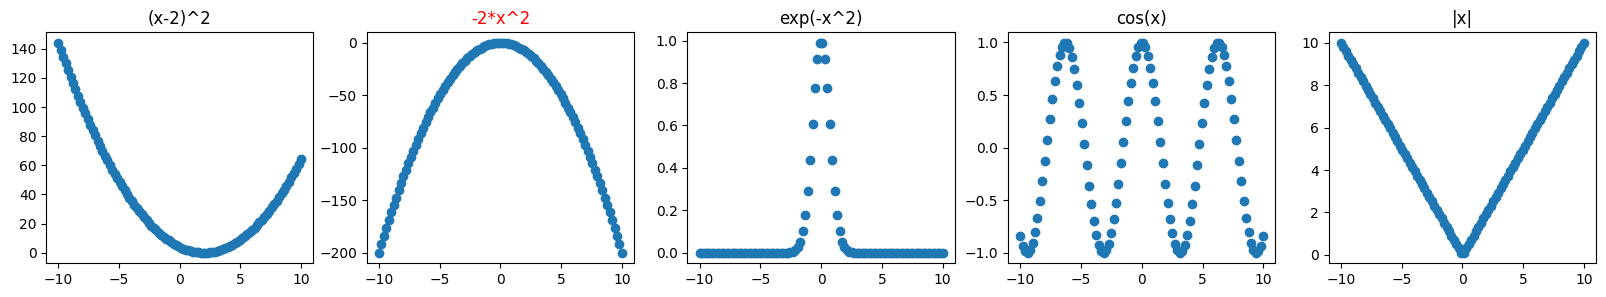

Question  4


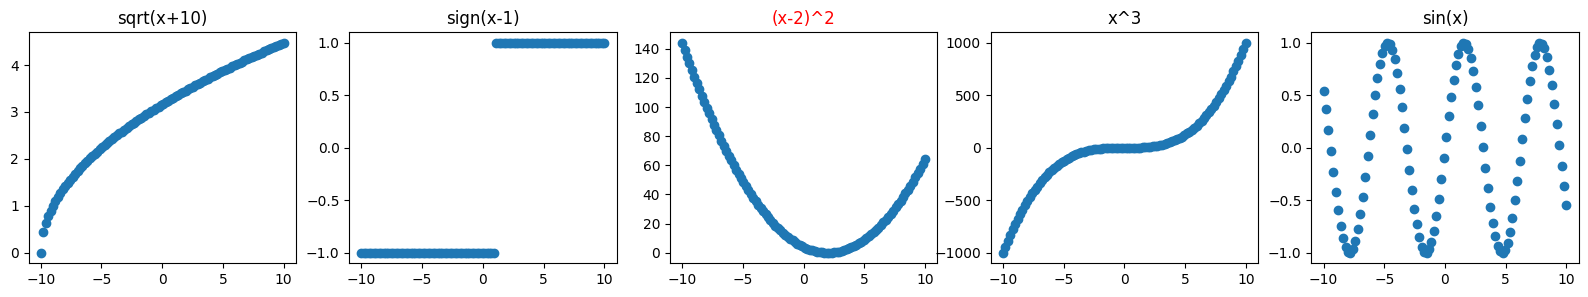

Question  5


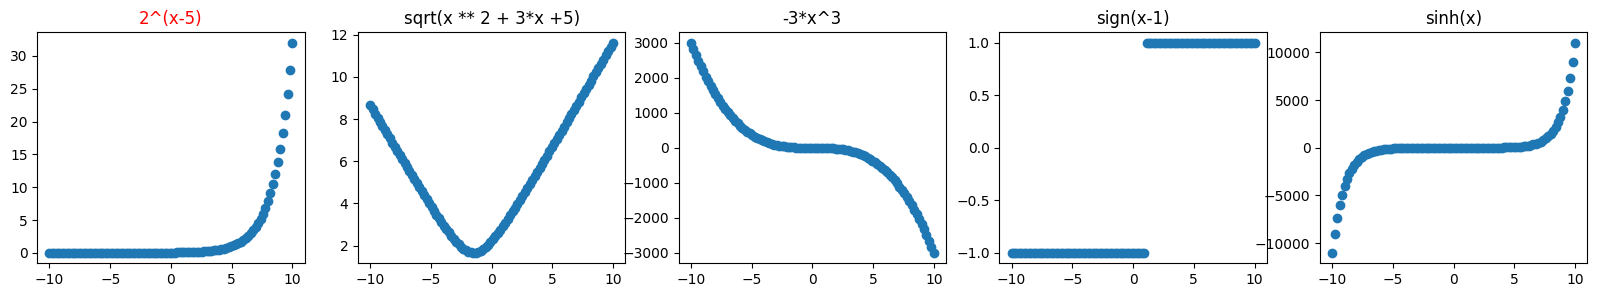

Question  6


/tmp/ipykernel_29557/2008396885.py:34: RuntimeWarning: divide by zero encountered in log
  (lambda x: np.log(x+10), 'log(x+10)'),


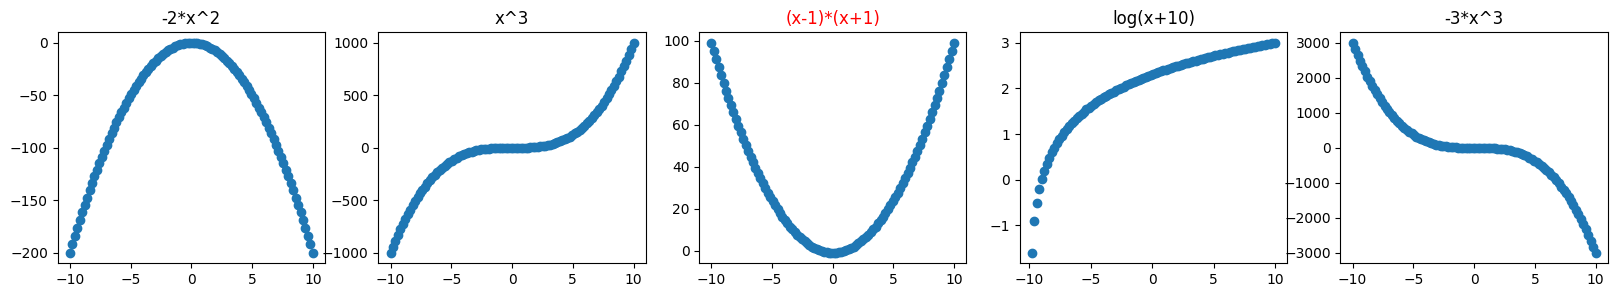

Question  7


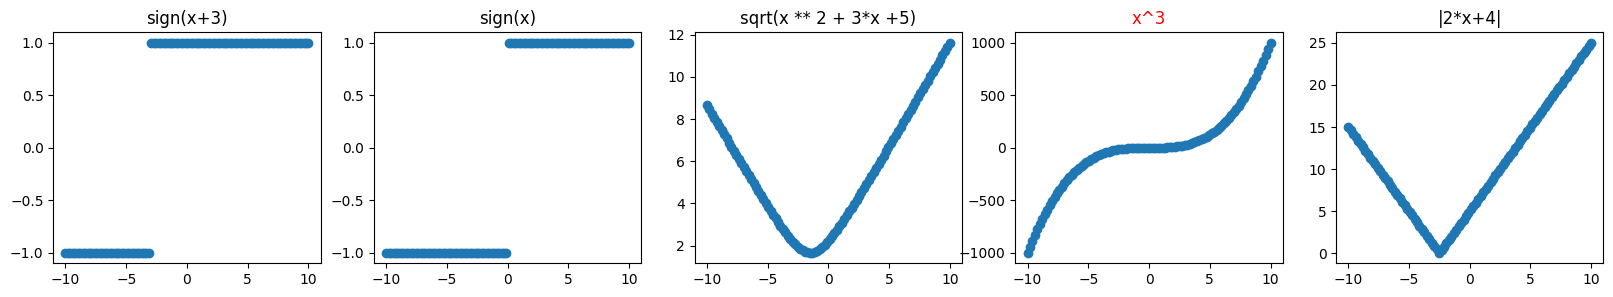

Question  8


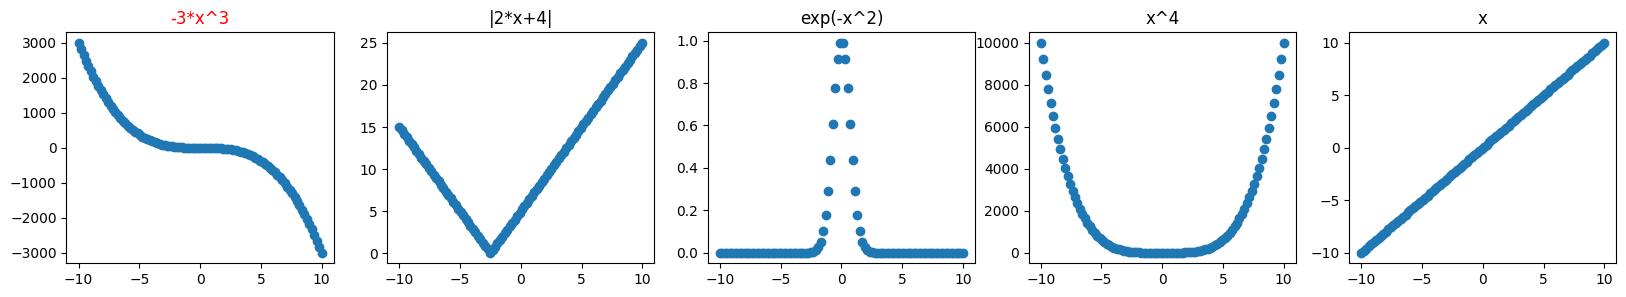

Question  9


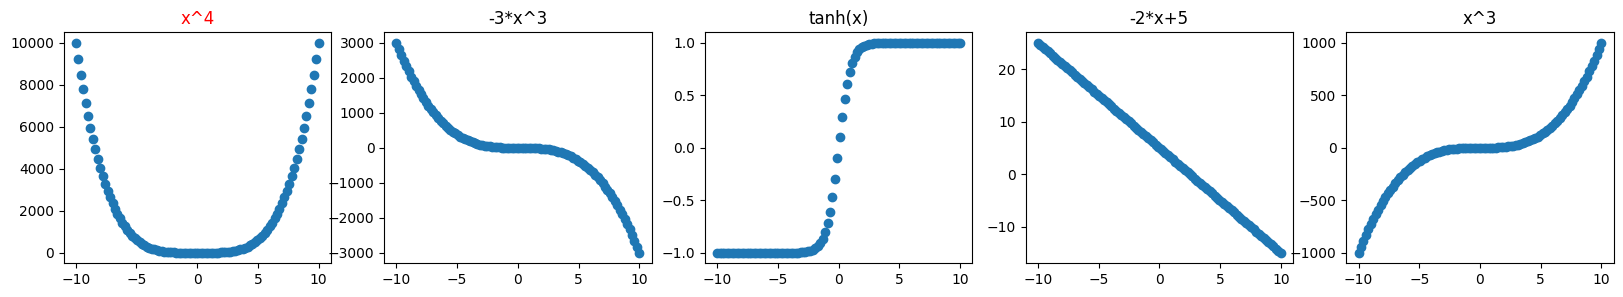

Question  10


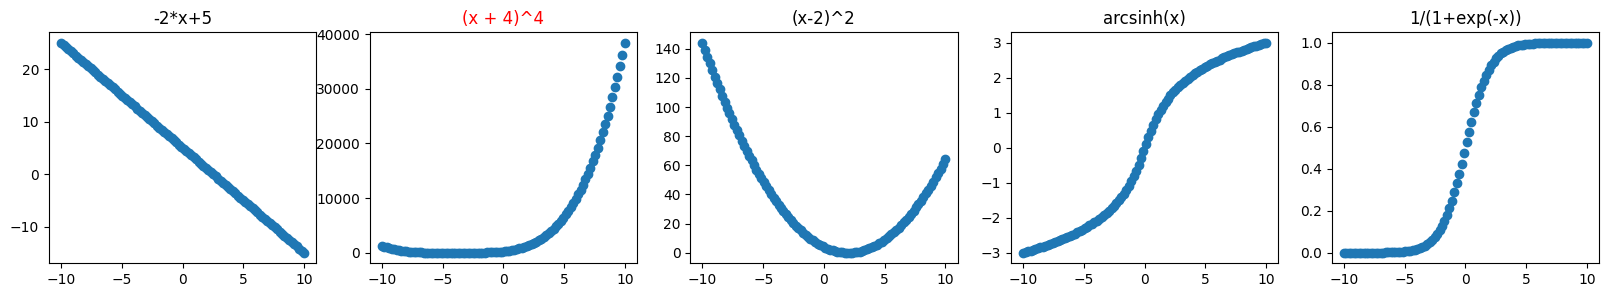

Question  11


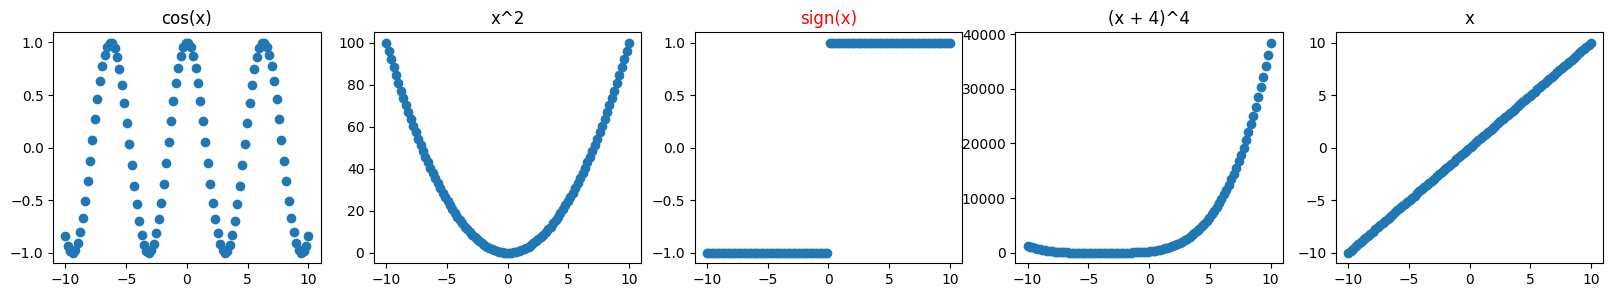

Question  12


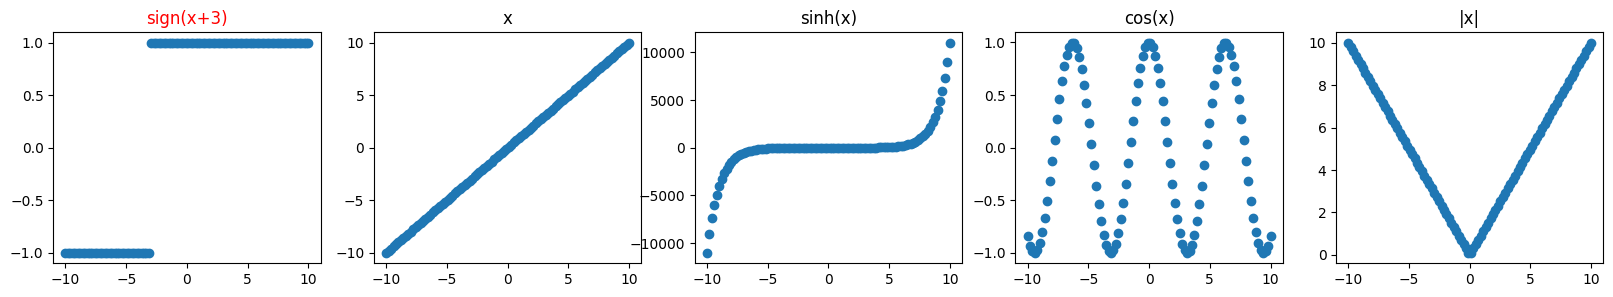

Question  13


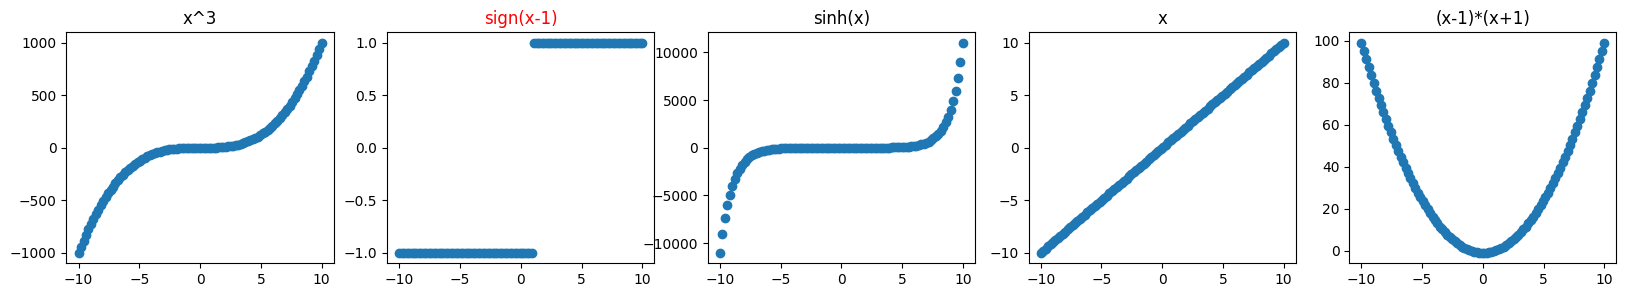

Question  14


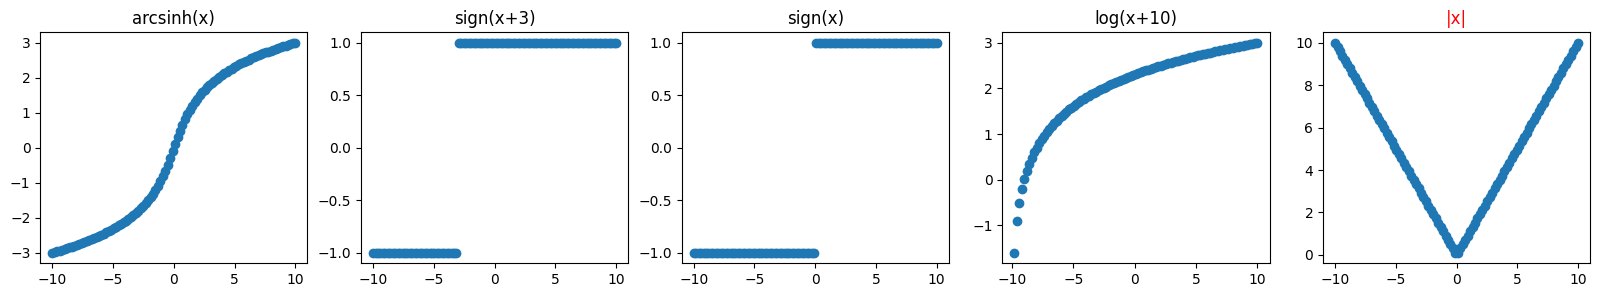

Question  15


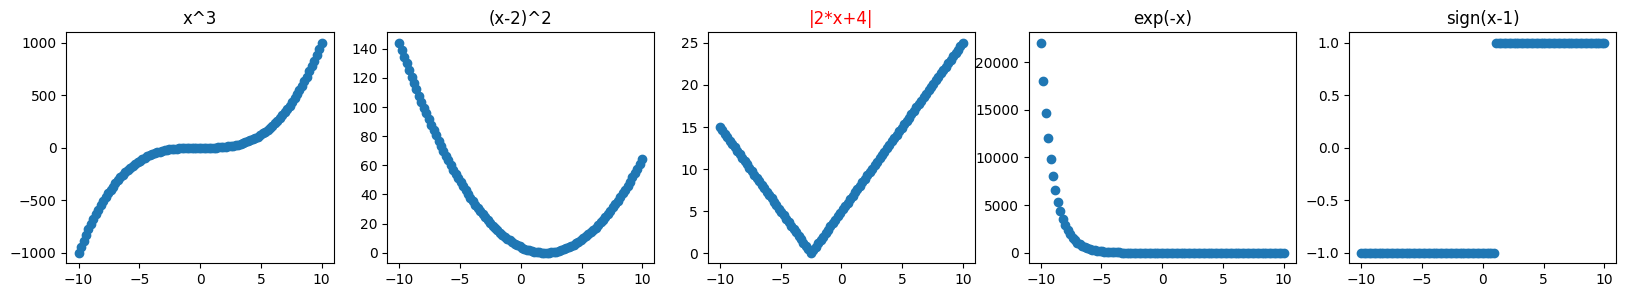

Question  16


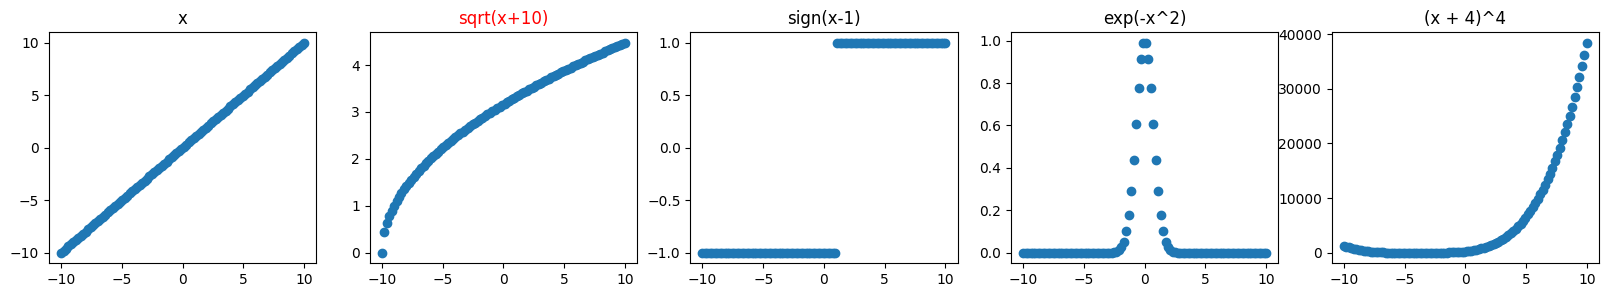

Question  17


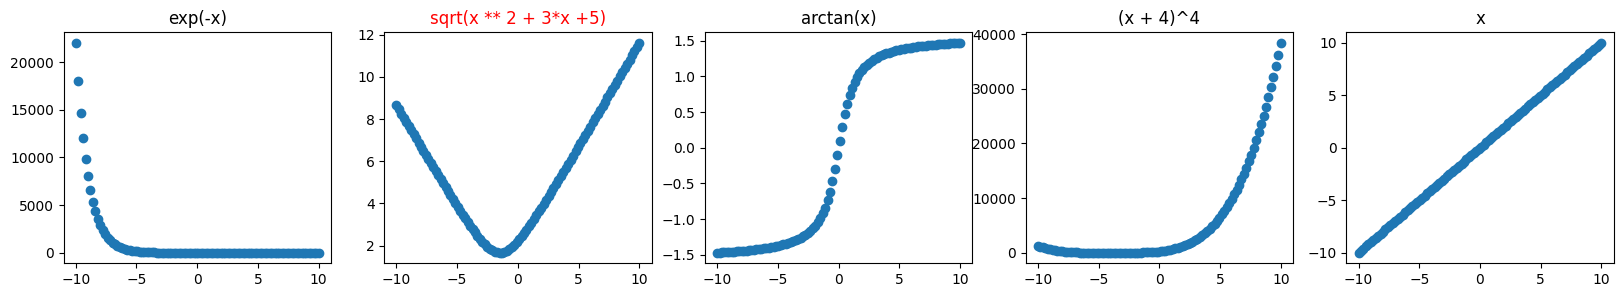

Question  18


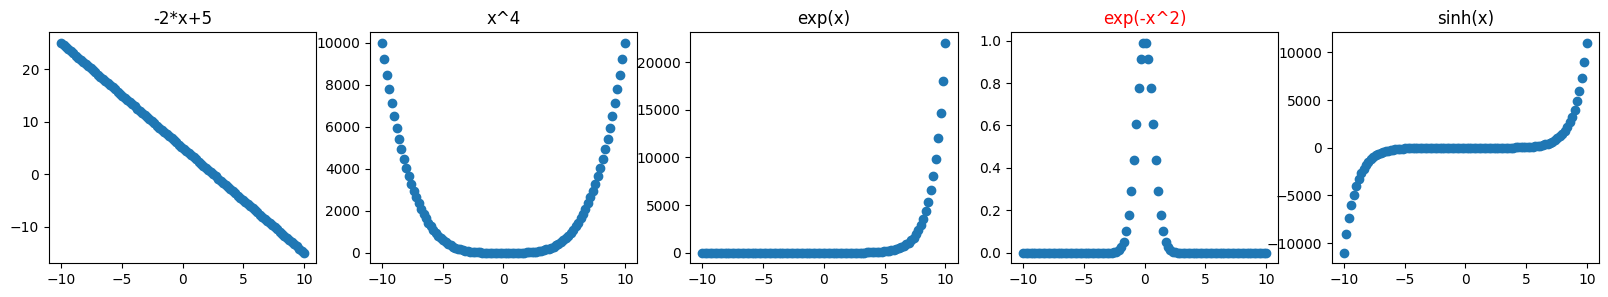

Question  19


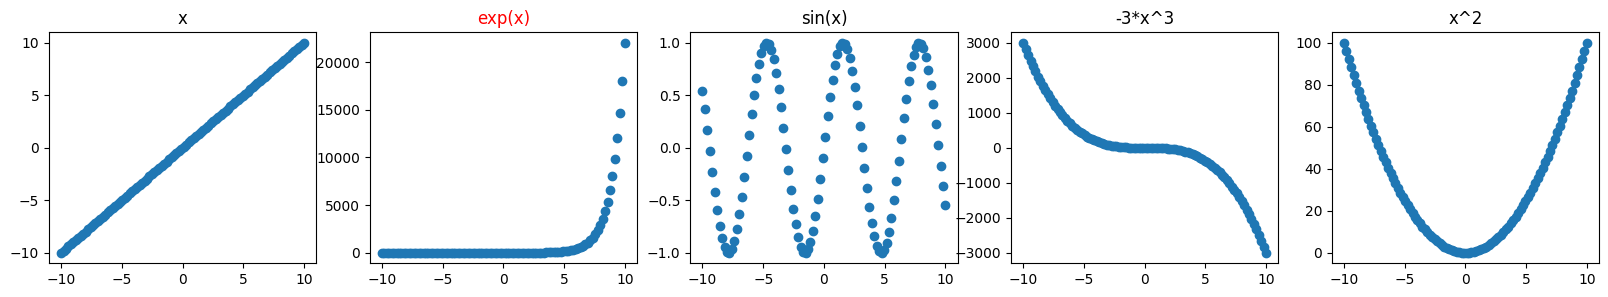

Question  20


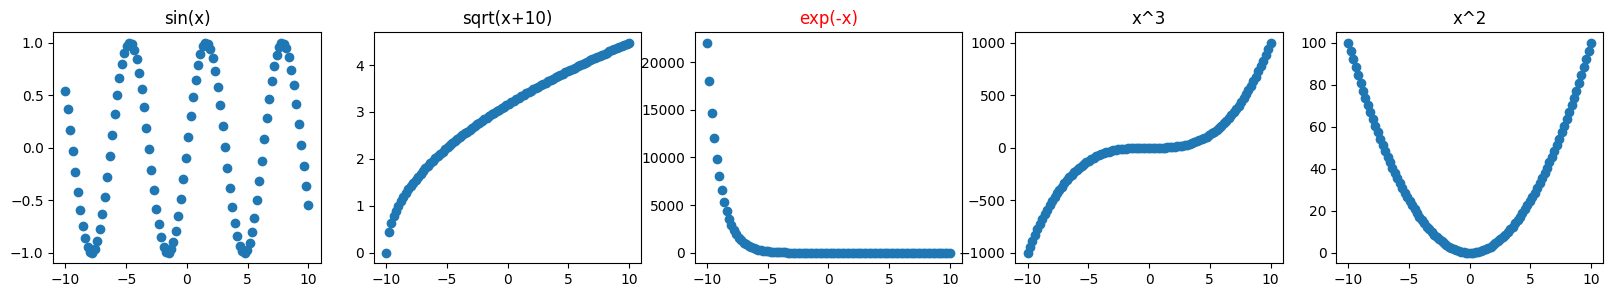

Question  21


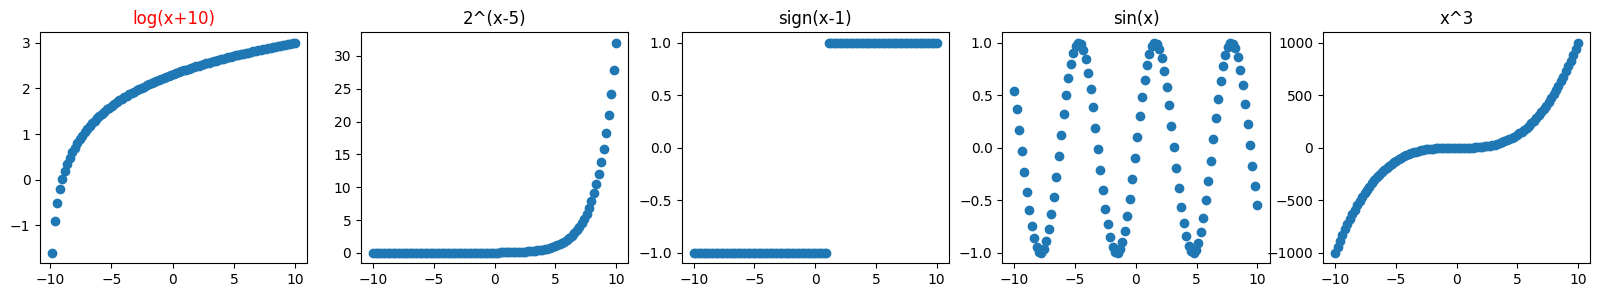

Question  22


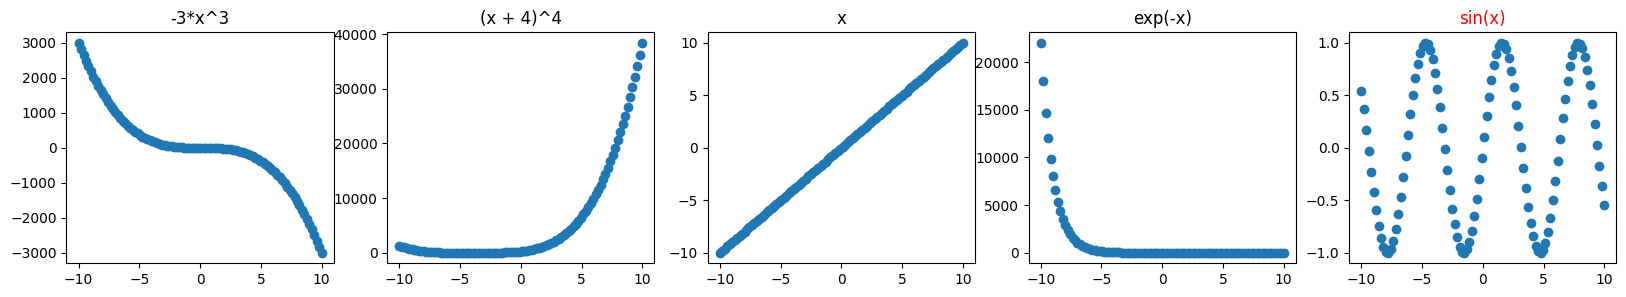

Question  23


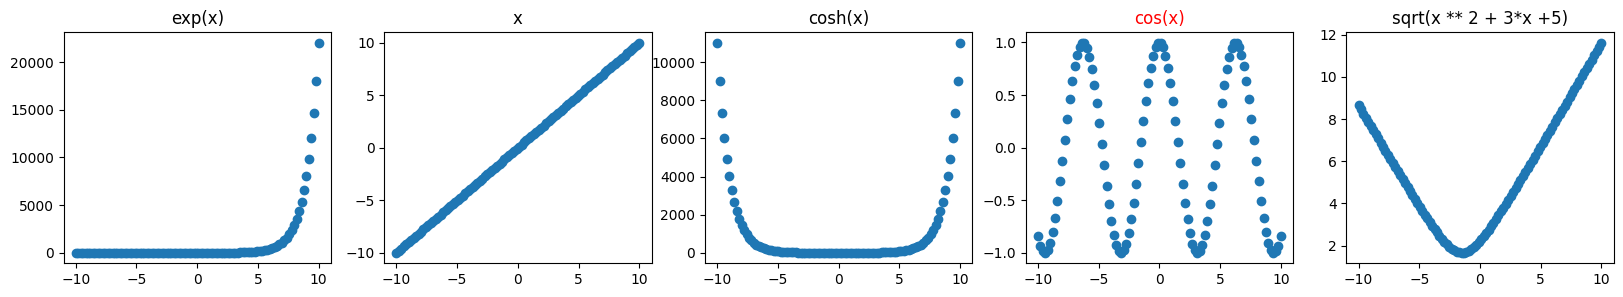

Question  24


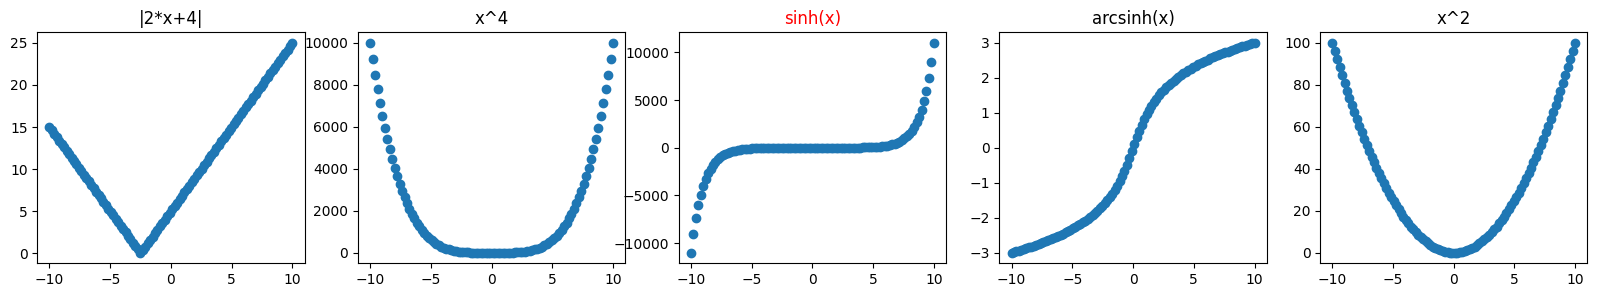

Question  25


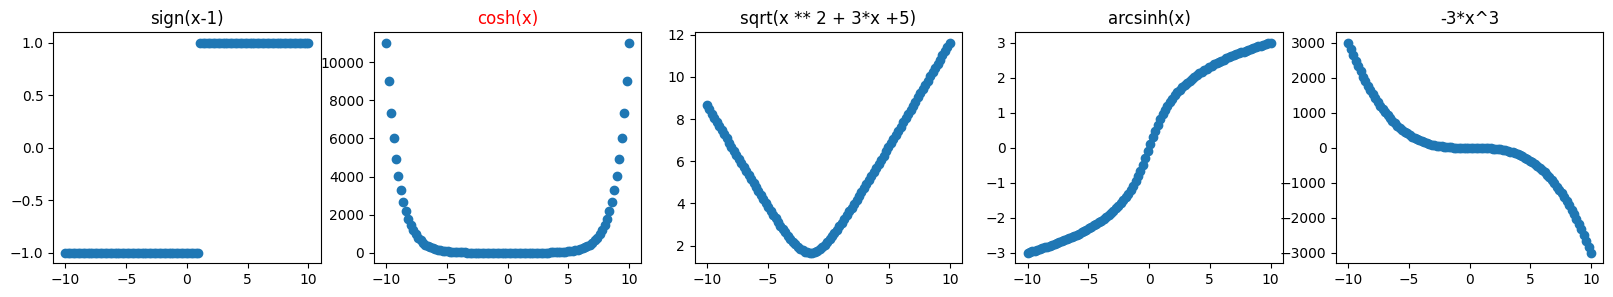

Question  26


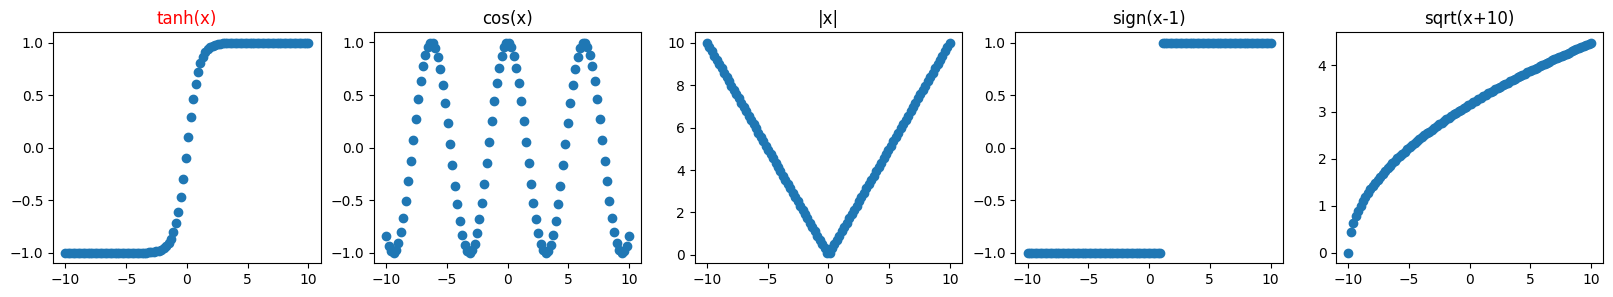

Question  27


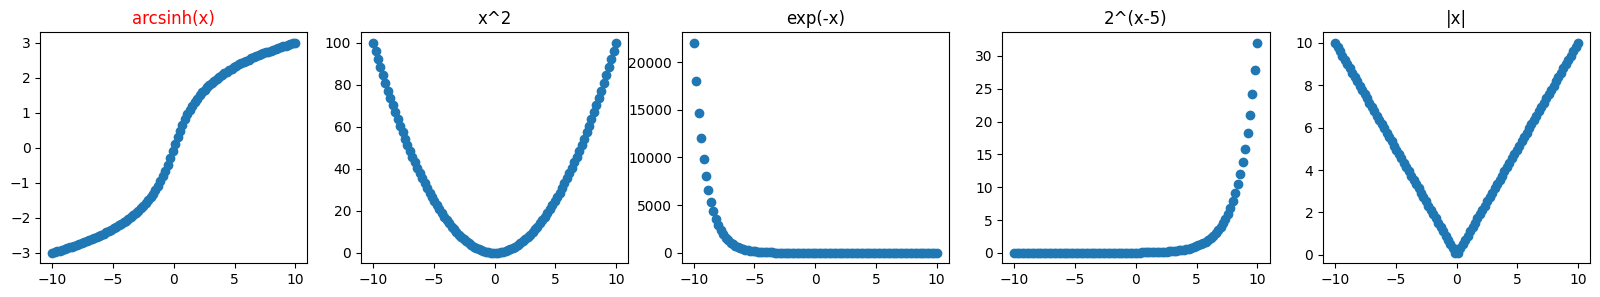

Question  28


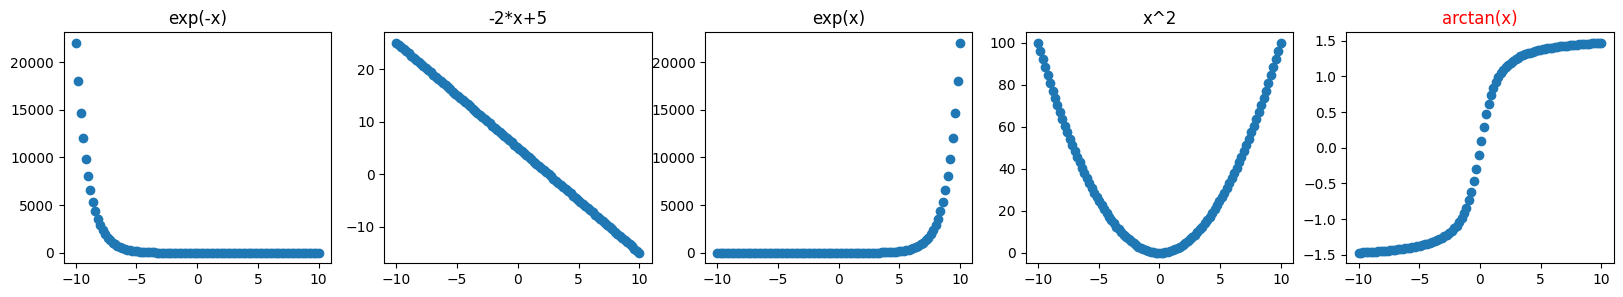

Question  29


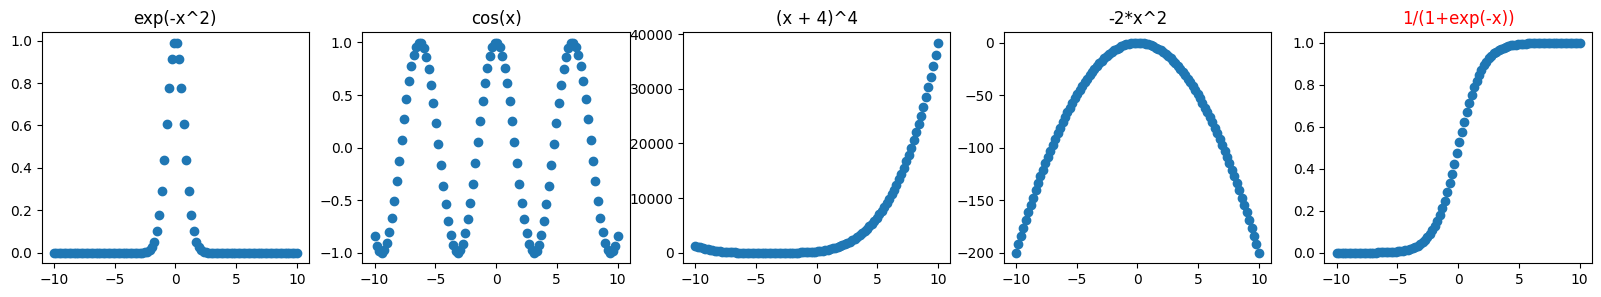

In [55]:
# first, randomly select the other multiple choice options
np.random.seed(1)
fbench_questions = []
for idx, _ in enumerate(fbench):
    mc_options = [idx]
    # select 4 more random functions
    for _ in range(4):
        random_idx = np.random.randint(0, len(fbench))
        while random_idx in mc_options:
            random_idx = np.random.randint(0, len(fbench))
        mc_options.append(random_idx)
    # shuffle options
    np.random.shuffle(mc_options)
    # store the options and the correct answer
    fbench_questions.append((mc_options, idx))

# assure that the shape of the correct answer is unique among the mc options
fbench_questions[4] = ([16, 13, 4, 7, 22], 4)
fbench_questions[7] = ([12, 11, 17, 7, 15], 7)
fbench_questions[9] = ([9, 8, 26, 1, 7], 9)
fbench_questions[10] = ([1, 10, 4, 27, 29], 10)
fbench_questions[13] = ([7, 13, 24, 0, 6], 13)
fbench_questions[19] = ([0, 19, 22, 8, 2], 19)
fbench_questions[21] = ([21, 5, 13, 22, 7], 21)
fbench_questions[22] = ([8, 10, 0, 20, 22], 22)
fbench_questions[27] = ([27, 2, 20, 5, 14], 27)
fbench_questions[29] = ([18, 23, 10, 3, 29], 29)

# plot the 5 functions for each question
# make a 1x5 grid of plots
for idx, (options, correct) in enumerate(fbench_questions):
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    print('Question ', idx)
    for i, ax in enumerate(axes):
        f, n = fbench[options[i]]
        y = f(x)
        ax.scatter(x, y)
        ax.set_title(n)
        # if it is the correct one, set the title color to red
        if options[i] == correct:
            ax.title.set_color('red')
    plt.show()

# F-Bench (Hard subset with less well-known functions)

30


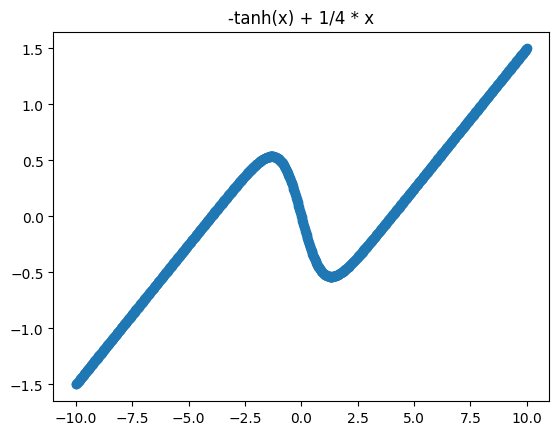

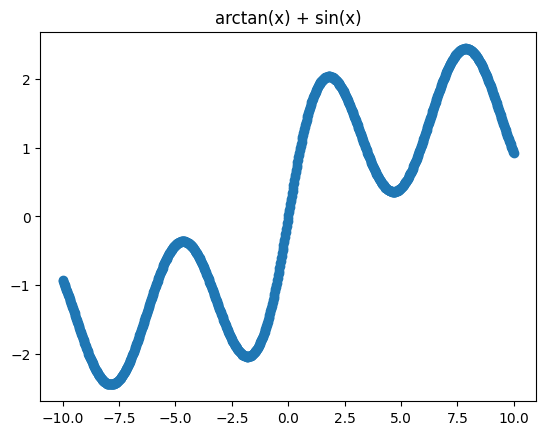

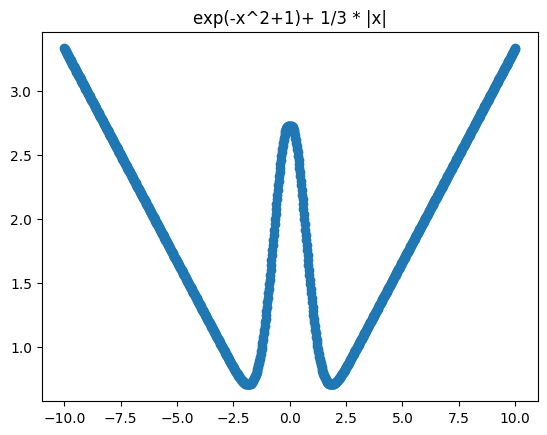

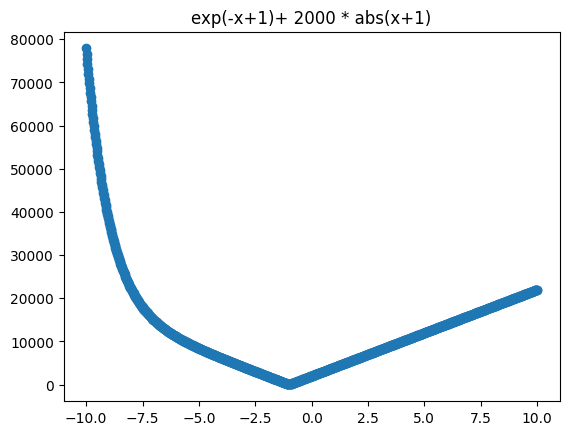

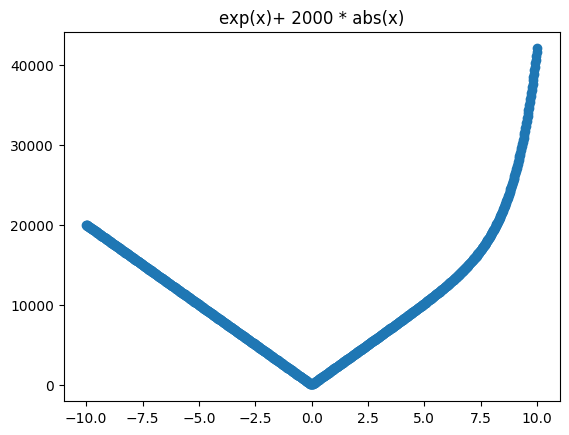

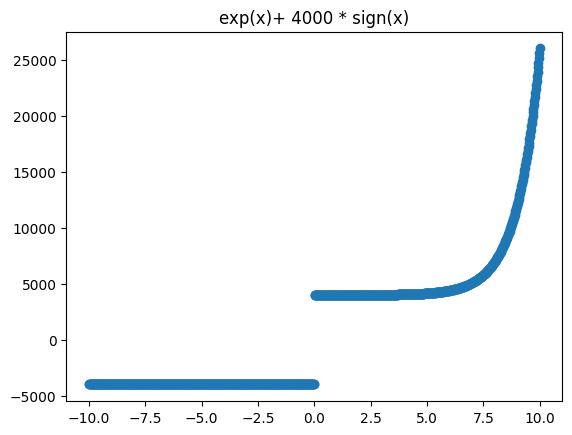

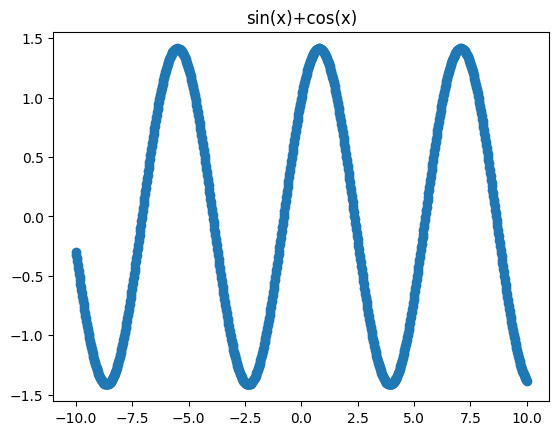

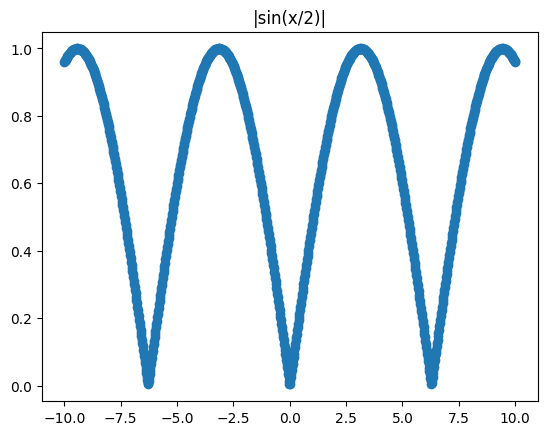

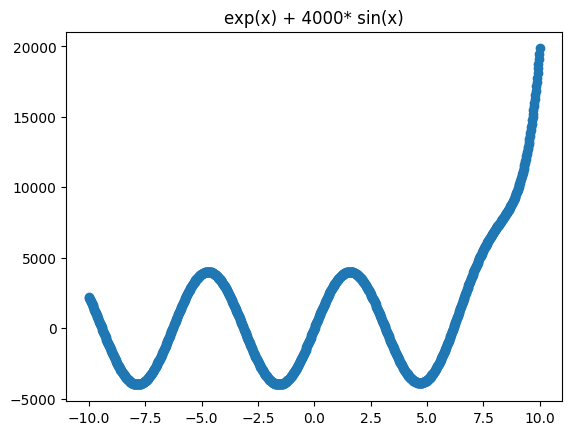

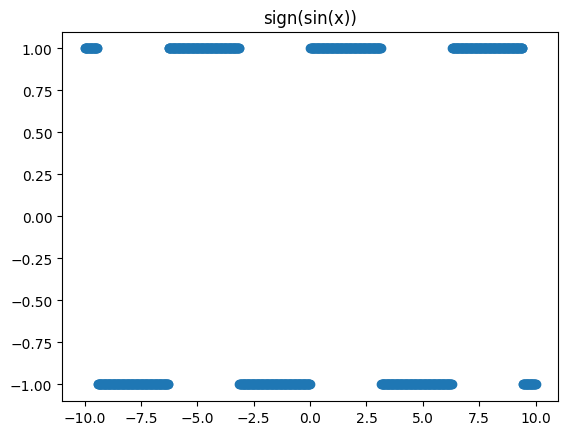

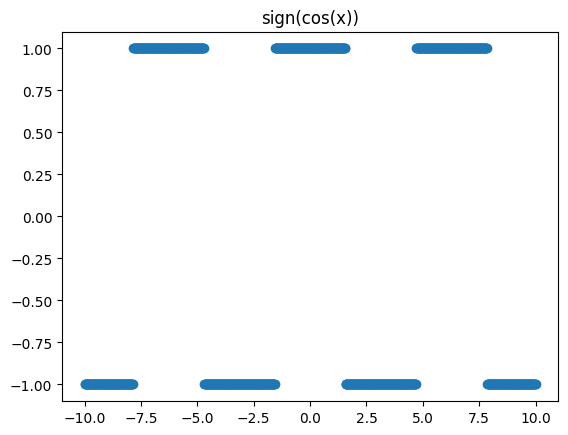

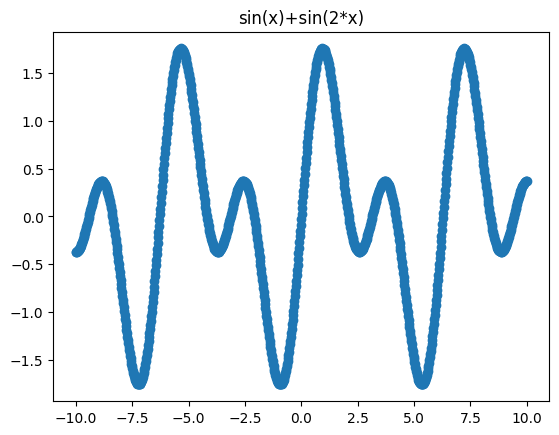

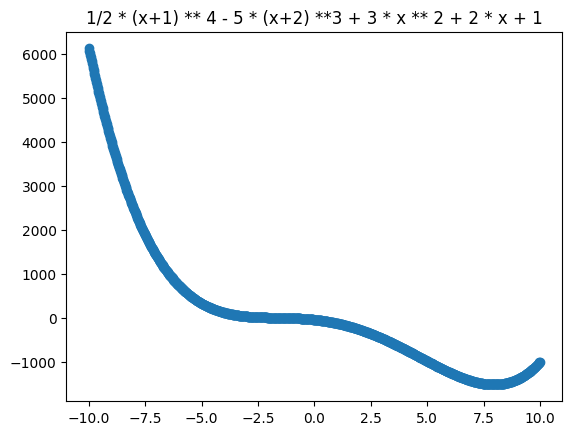

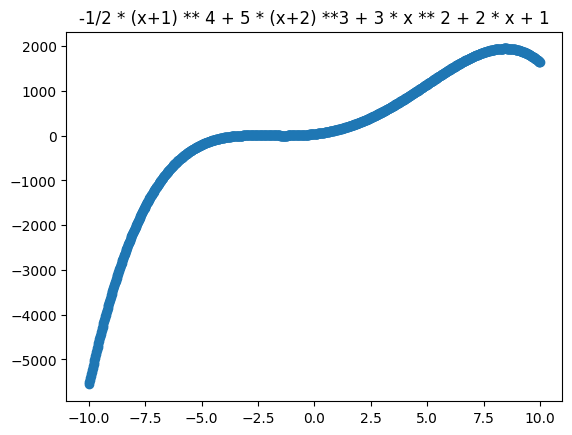

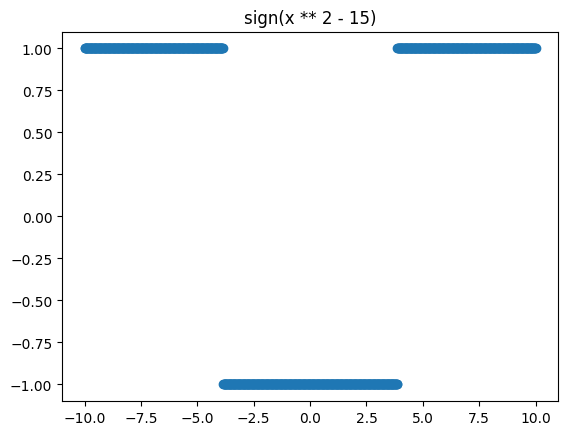

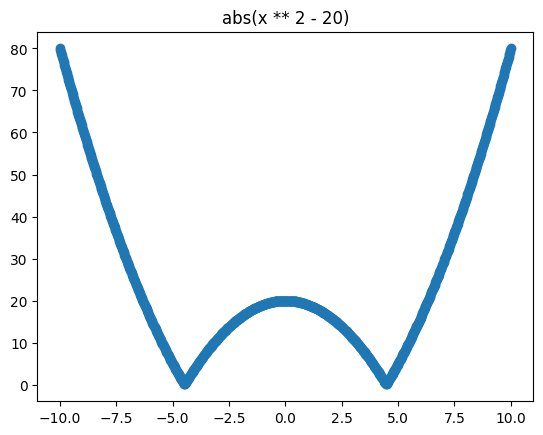

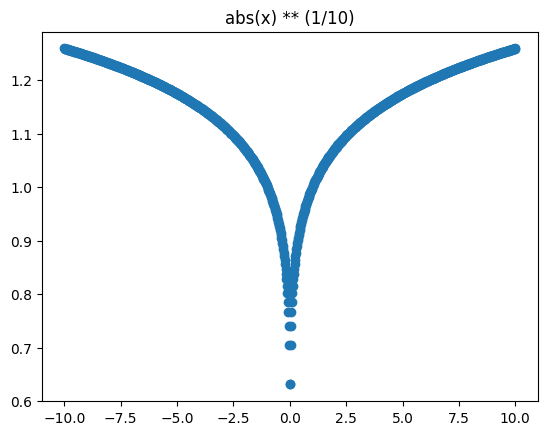

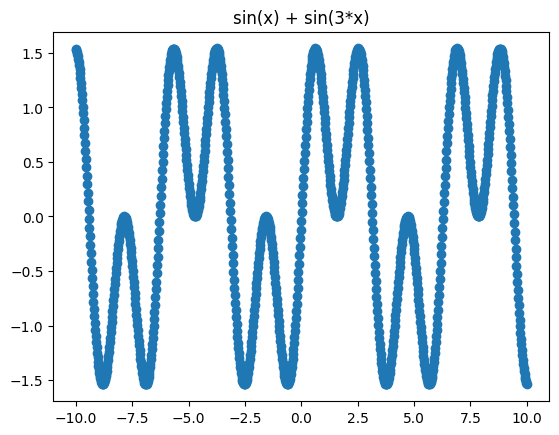

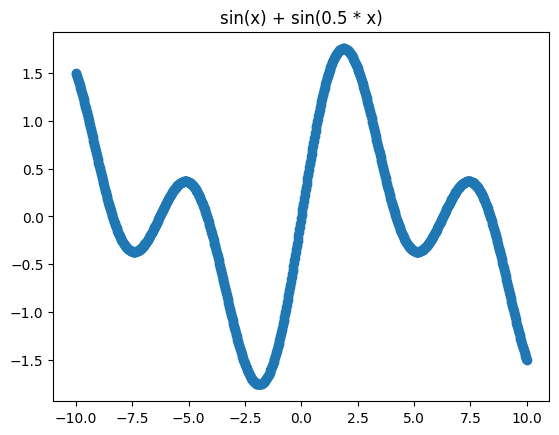

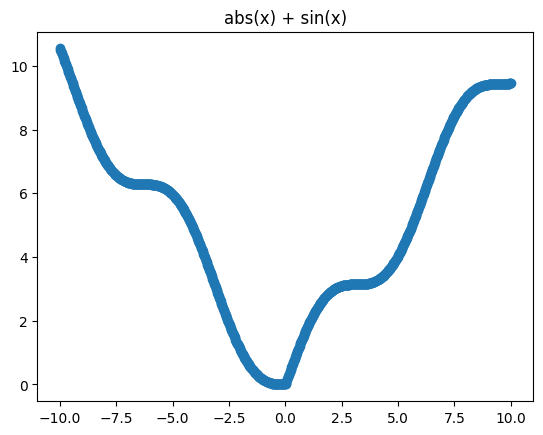

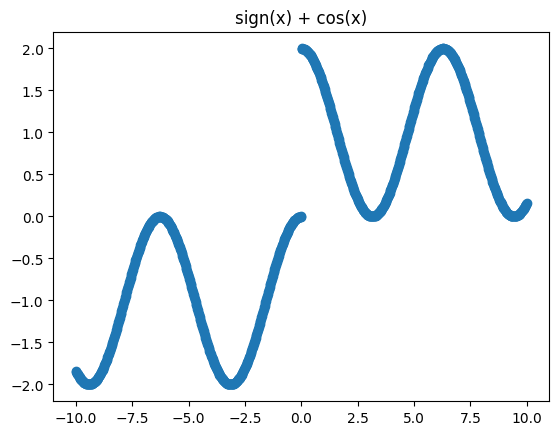

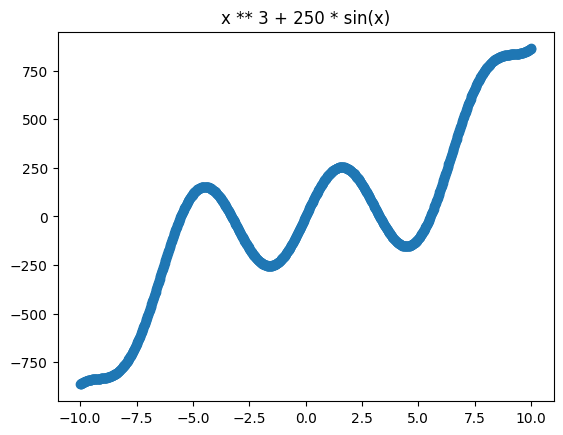

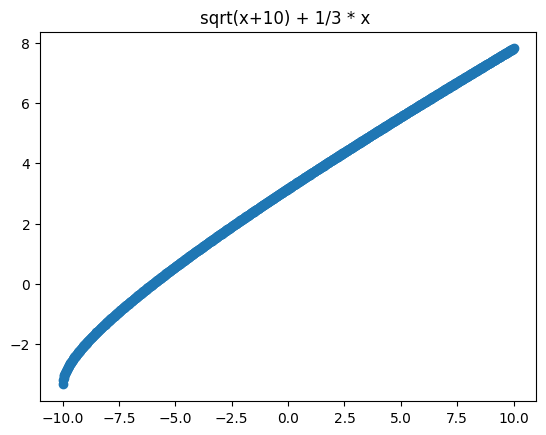

/tmp/ipykernel_29557/1061528540.py:26: RuntimeWarning: divide by zero encountered in log
  (lambda x: np.log(x+10) + 1/3 * x , 'log(x+10) + 1/3 * x '),


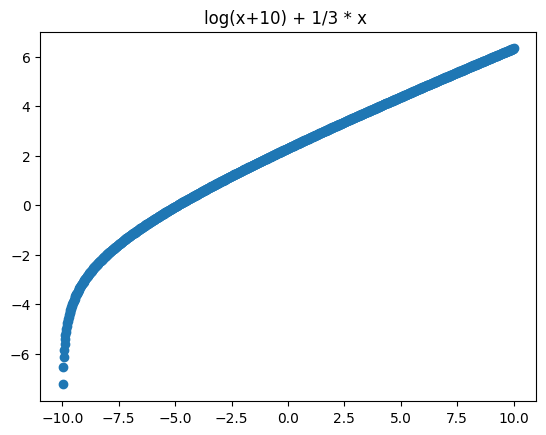

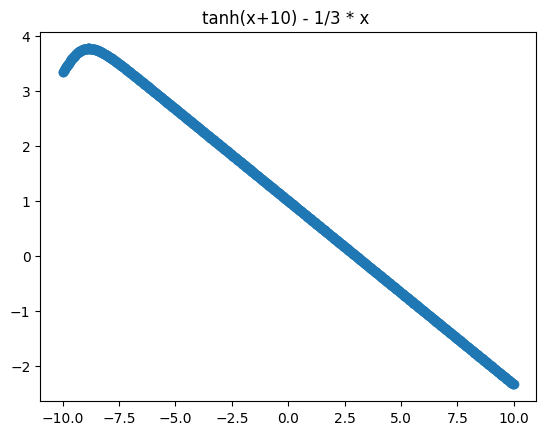

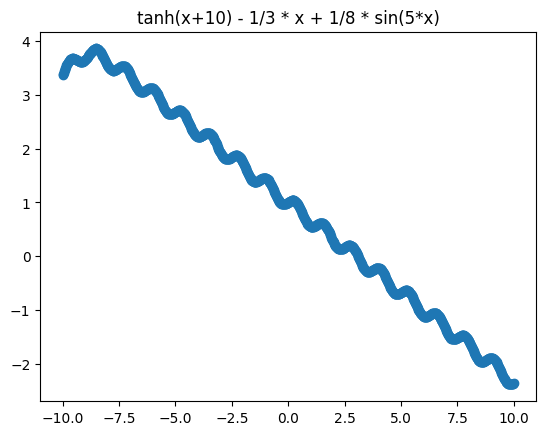

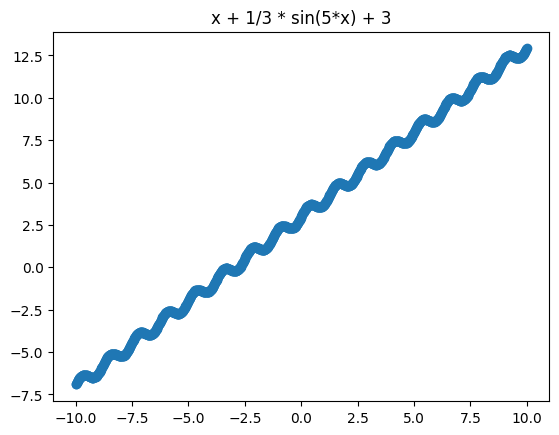

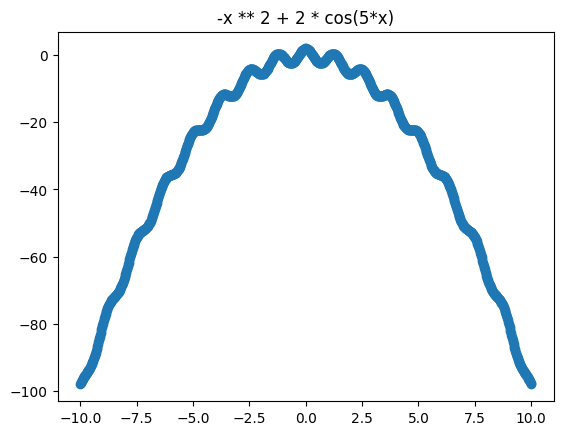

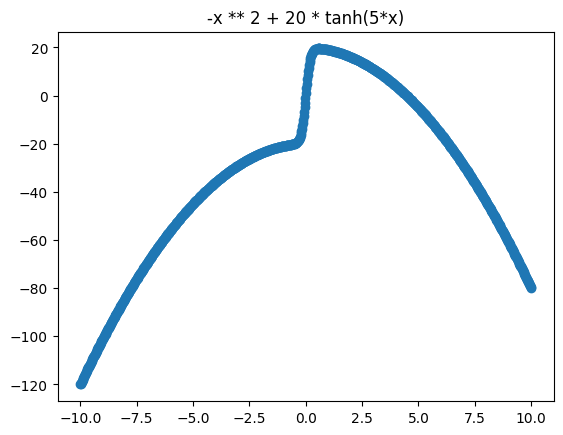

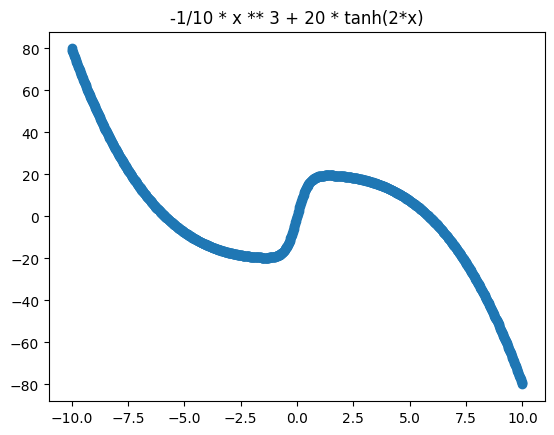

In [ ]:
fbench_hard = [
    # composite functions
    (lambda x: -np.tanh(x) + 1/4 * x, '-tanh(x) + 1/4 * x'),
    (lambda x: np.arctan(x) + np.sin(x), 'arctan(x) + sin(x)'),
    (lambda x: np.exp(-x**2+1) + 1/3*np.abs(x), 'exp(-x^2+1)+ 1/3 * |x|'),
    (lambda x: np.exp(-x+1) + 2000* np.abs(x+1), 'exp(-x+1)+ 2000 * abs(x+1)'),
    (lambda x: np.exp(x) + 2000* np.abs(x), 'exp(x)+ 2000 * abs(x)'),
    (lambda x: np.exp(x) + 4000* np.sign(x), 'exp(x)+ 4000 * sign(x)'),
    (lambda x: np.sin(x) + np.cos(x), 'sin(x)+cos(x)'),
    (lambda x: np.abs(np.sin(x/2)), '|sin(x/2)|'),
    (lambda x: np.exp(x) + 4000* np.sin(x), 'exp(x) + 4000* sin(x)'),
    (lambda x: np.sign(np.sin(x)), 'sign(sin(x))'),
    (lambda x: np.sign(np.cos(x)), 'sign(cos(x))'),
    (lambda x: np.sin(x) + np.sin(2*x), 'sin(x)+sin(2*x)'),
    (lambda x: 1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1, '1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1'),
    (lambda x: -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1, '-1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1'),
    (lambda x: np.sign(x ** 2 - 15), 'sign(x ** 2 - 15)'),
    (lambda x: np.abs(x ** 2 - 20), 'abs(x ** 2 - 20)'),
    (lambda x: np.abs(x) ** (1/10), 'abs(x) ** (1/10)'),
    (lambda x: np.sin(x) + np.sin(3*x), 'sin(x) + sin(3*x)'),
    (lambda x: np.sin(x) + np.sin(0.5 * x), 'sin(x) + sin(0.5 * x)'),
    (lambda x: np.abs(x) + np.sin(x), 'abs(x) + sin(x)'),
    (lambda x: np.sign(x) + np.cos(x), 'sign(x) + cos(x)'),
    (lambda x: x ** 3 + 250 * np.sin(x), 'x ** 3 + 250 * sin(x)'),
    (lambda x: np.sqrt(x+10) + 1/3 * x , 'sqrt(x+10) + 1/3 * x '),
    (lambda x: np.log(x+10) + 1/3 * x , 'log(x+10) + 1/3 * x '),
    (lambda x: np.tanh(x+10) - 1/3 * x , 'tanh(x+10) - 1/3 * x '),
    (lambda x: np.tanh(x+10) - 1/3 * x + 1/8 * np.sin(5*x), 'tanh(x+10) - 1/3 * x + 1/8 * sin(5*x)'),
    (lambda x: x + 1/3 * np.sin(5*x) + 3, 'x + 1/3 * sin(5*x) + 3'),
    (lambda x: -x ** 2 + 2 * np.cos(5*x), '-x ** 2 + 2 * cos(5*x)'),
    (lambda x: -x ** 2 + 20 * np.tanh(5*x), '-x ** 2 + 20 * tanh(5*x)'),
    (lambda x: -1/10 * x ** 3 + 20 * np.tanh(2*x), '-1/10 * x ** 3 + 20 * tanh(2*x)'),
]

print(len(fbench_hard))

# for each, function draw 1000 samples from a uniform distribution and plot the function
function_points = []
x = np.linspace(-10, 10, 1000)
for f, n in fbench_hard:
    y = f(x)
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

### Generate multiple choice questions

Question  0


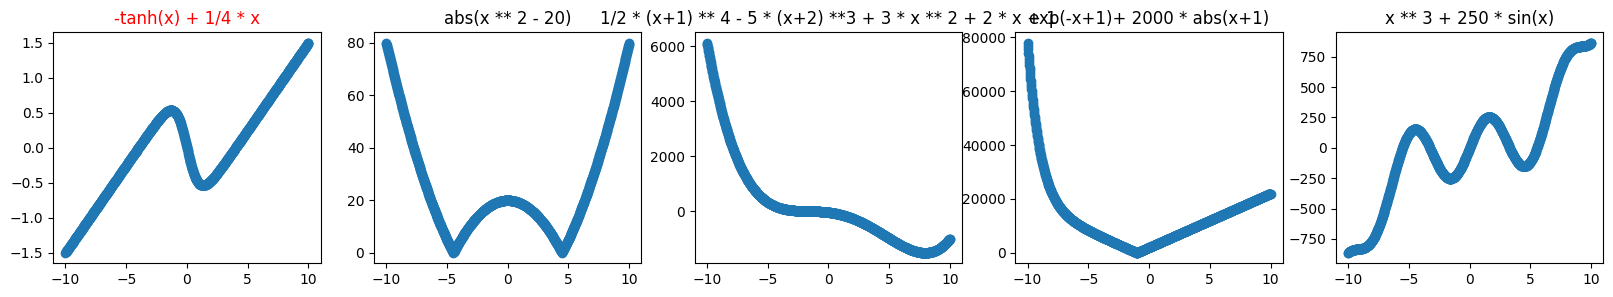

Question  1


/tmp/ipykernel_29557/1061528540.py:26: RuntimeWarning: divide by zero encountered in log
  (lambda x: np.log(x+10) + 1/3 * x , 'log(x+10) + 1/3 * x '),


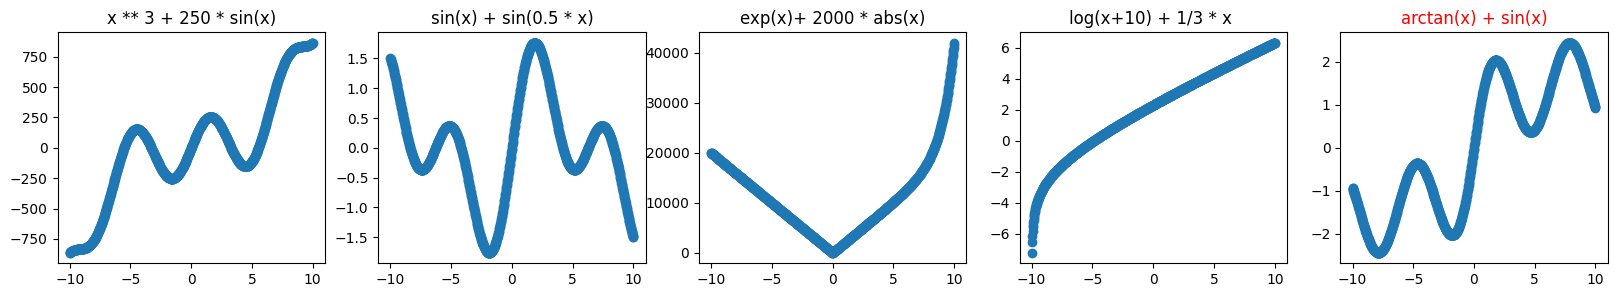

Question  2


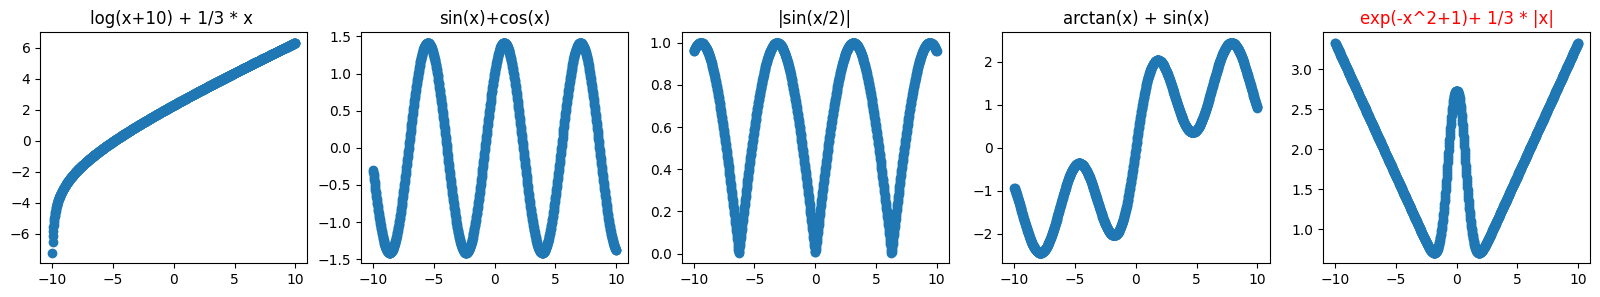

Question  3


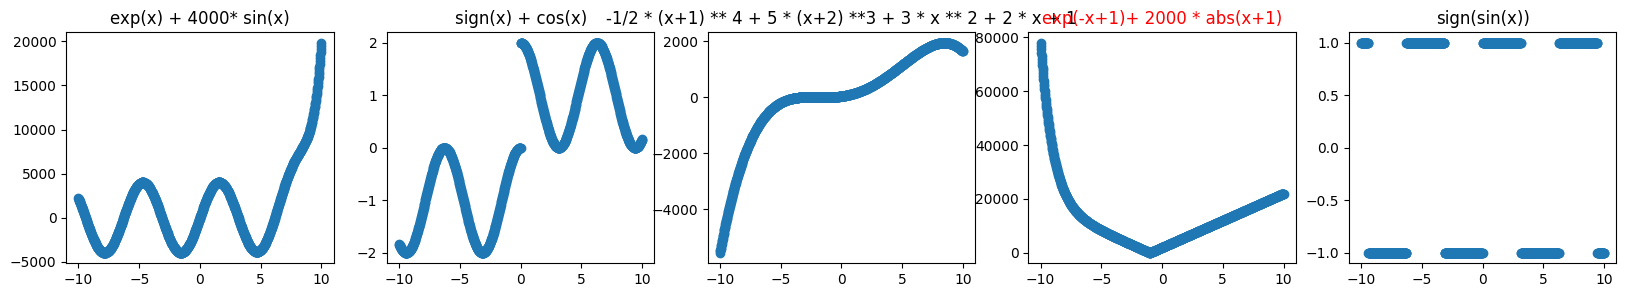

Question  4


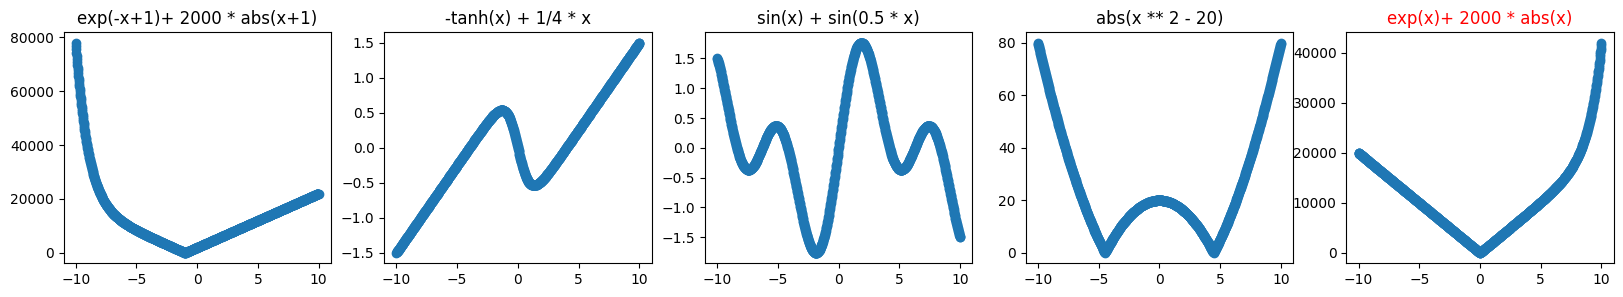

Question  5


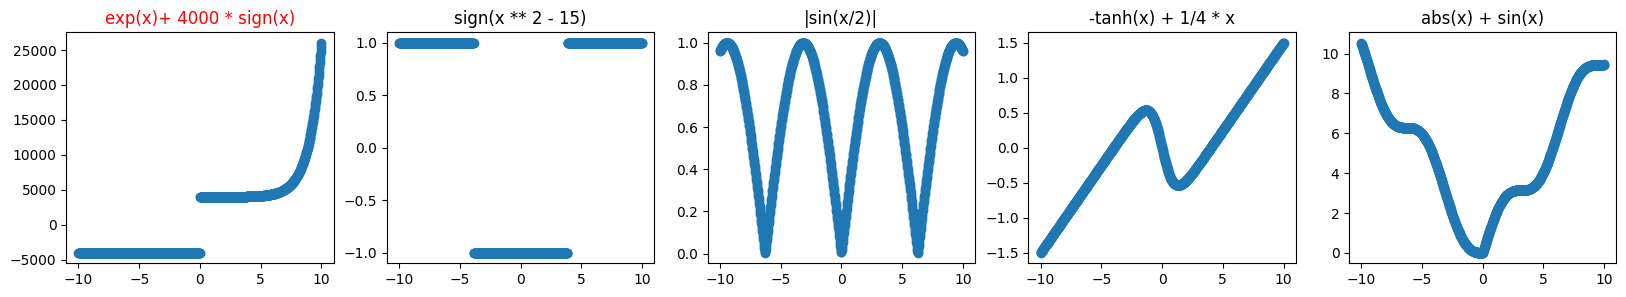

Question  6


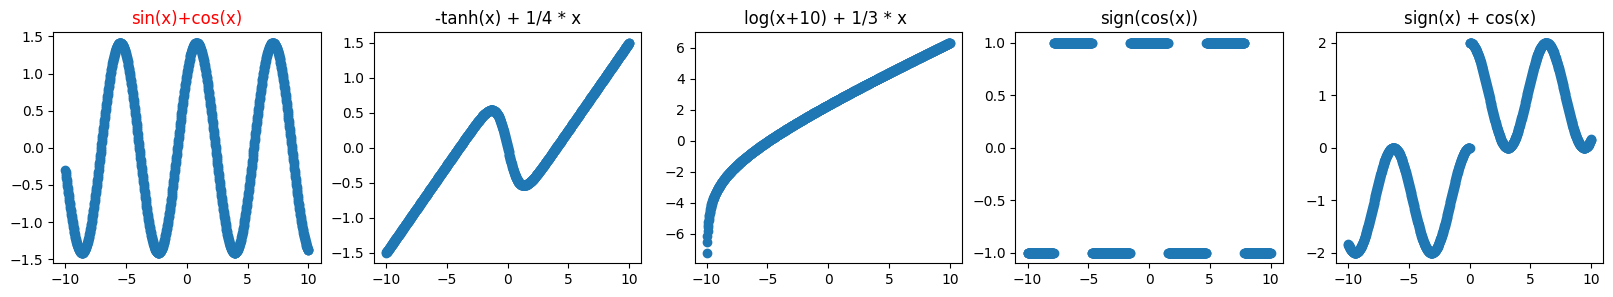

Question  7


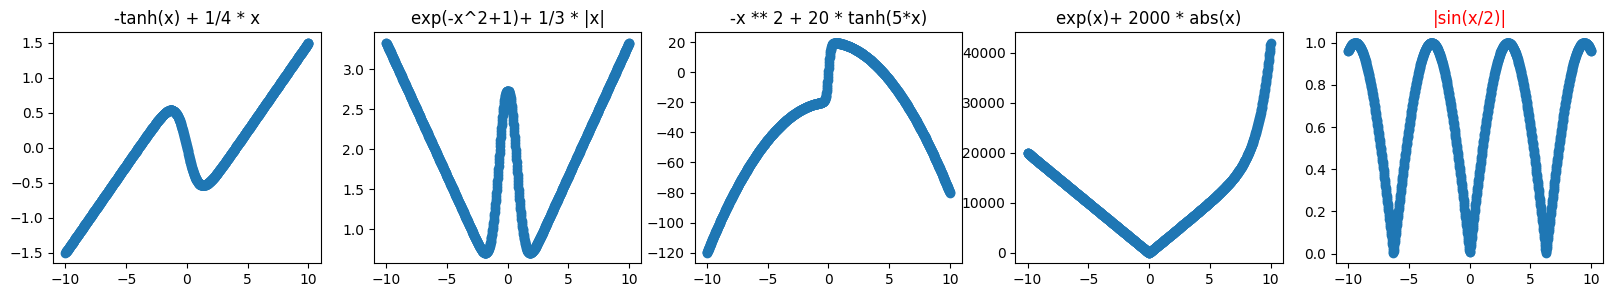

Question  8


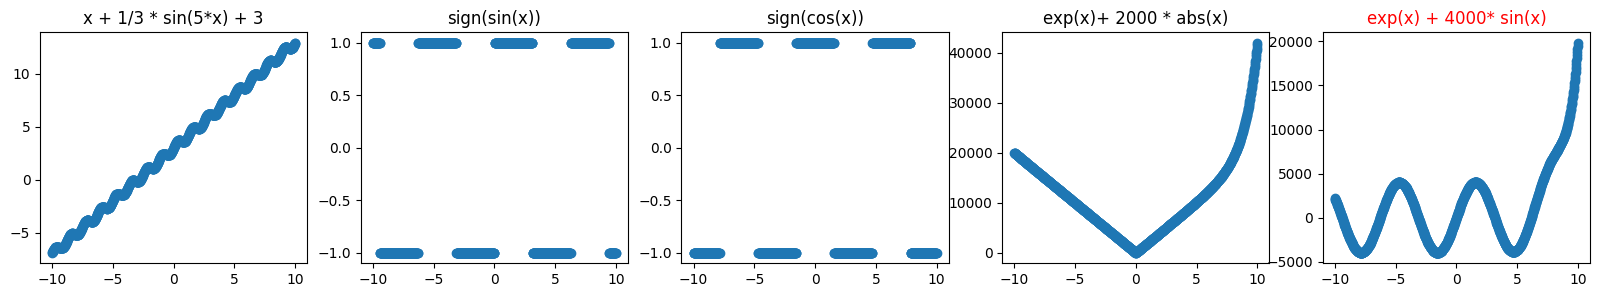

Question  9


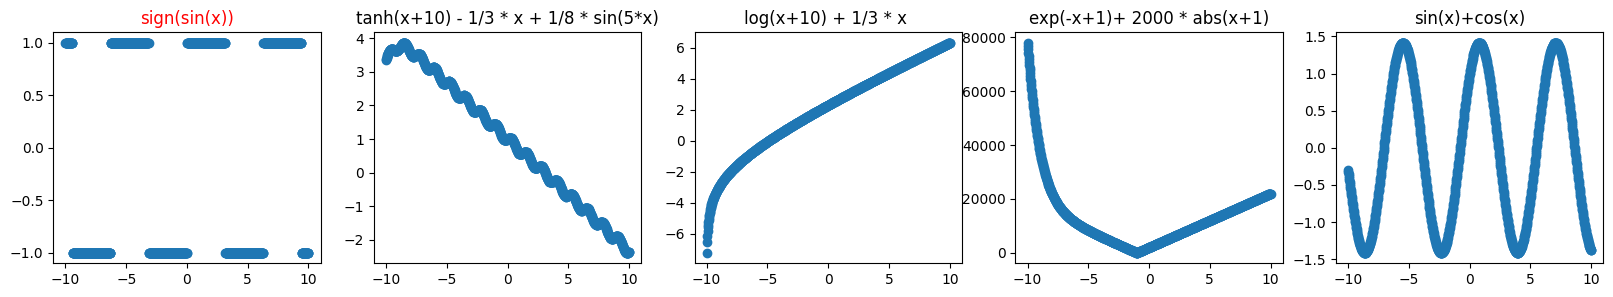

Question  10


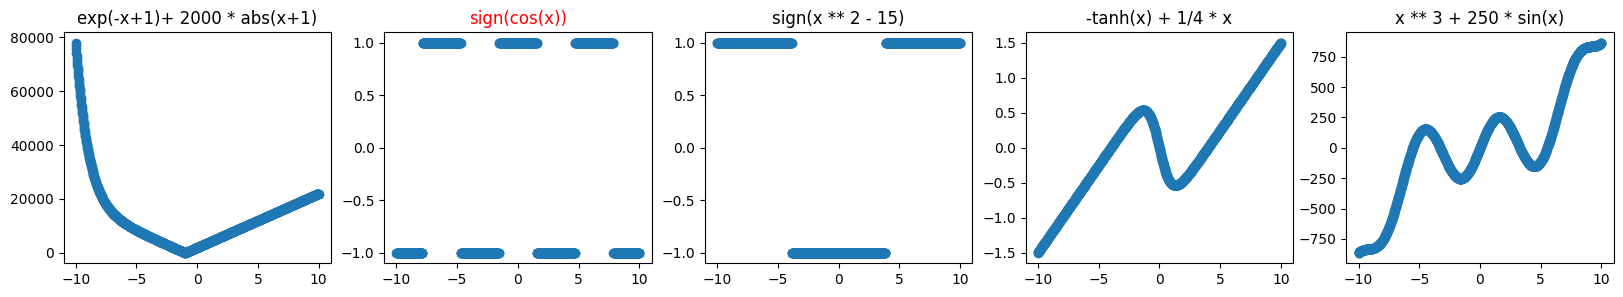

Question  11


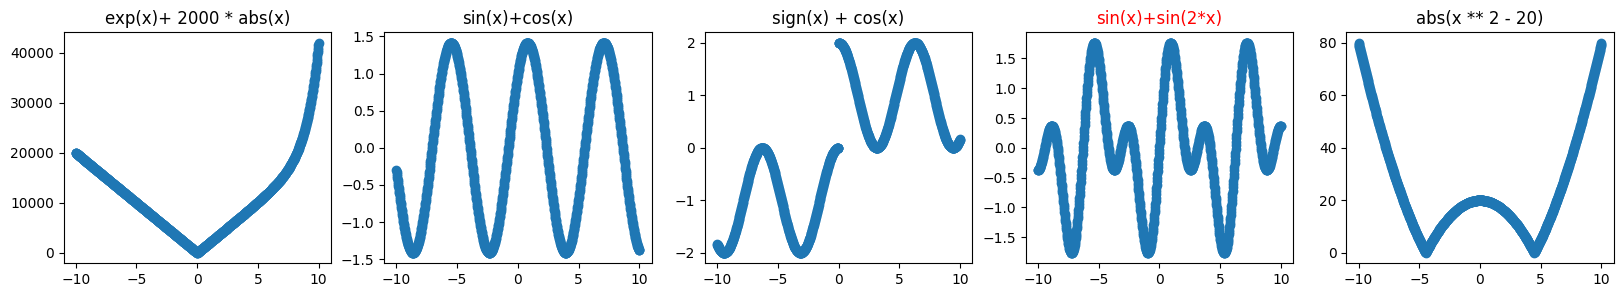

Question  12


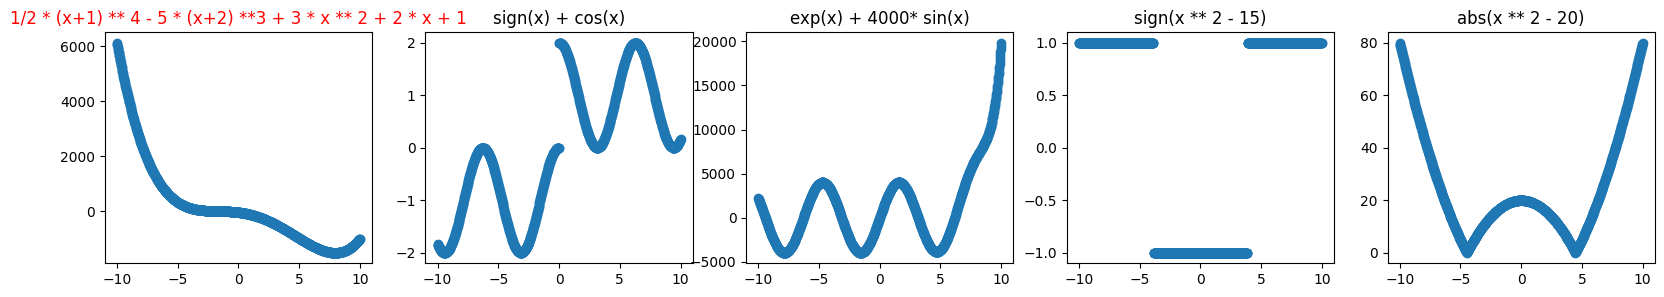

Question  13


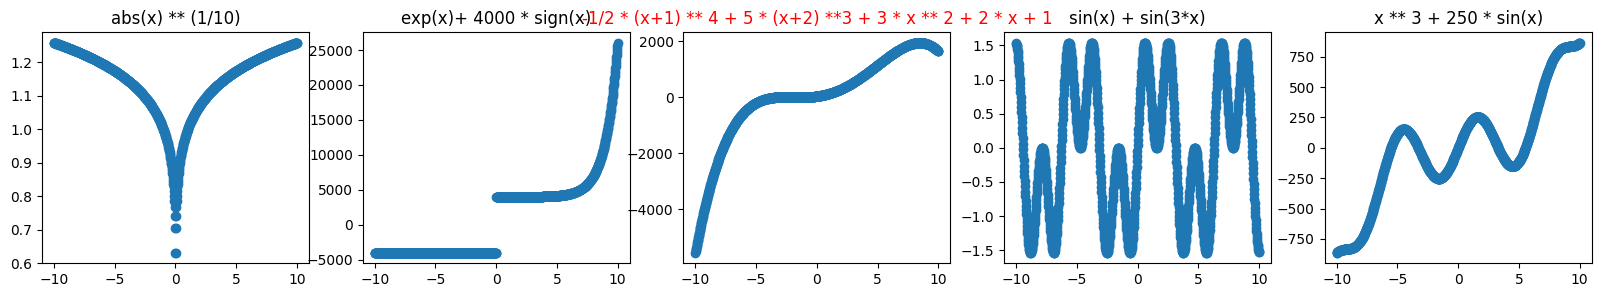

Question  14


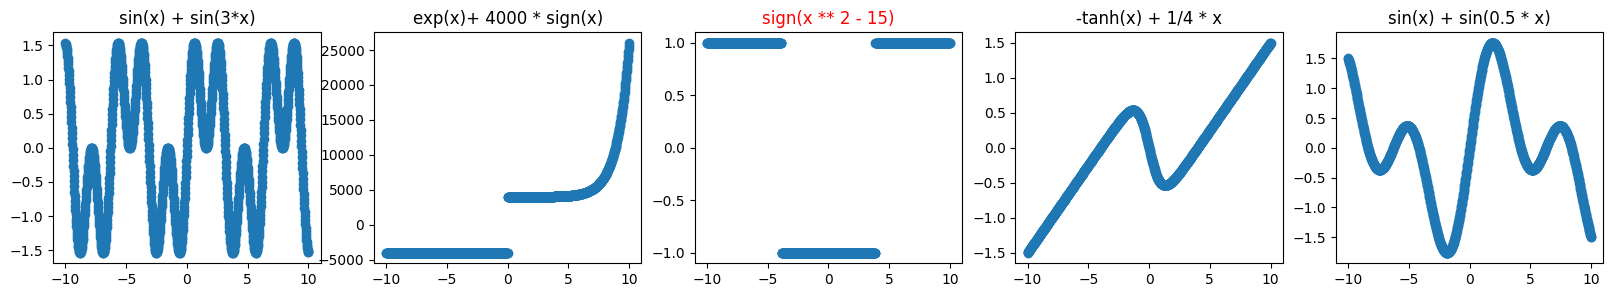

Question  15


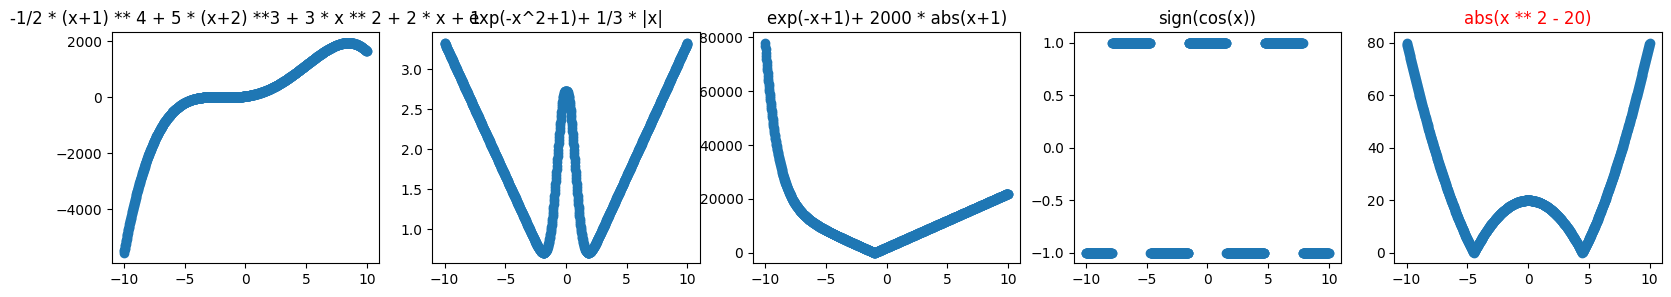

Question  16


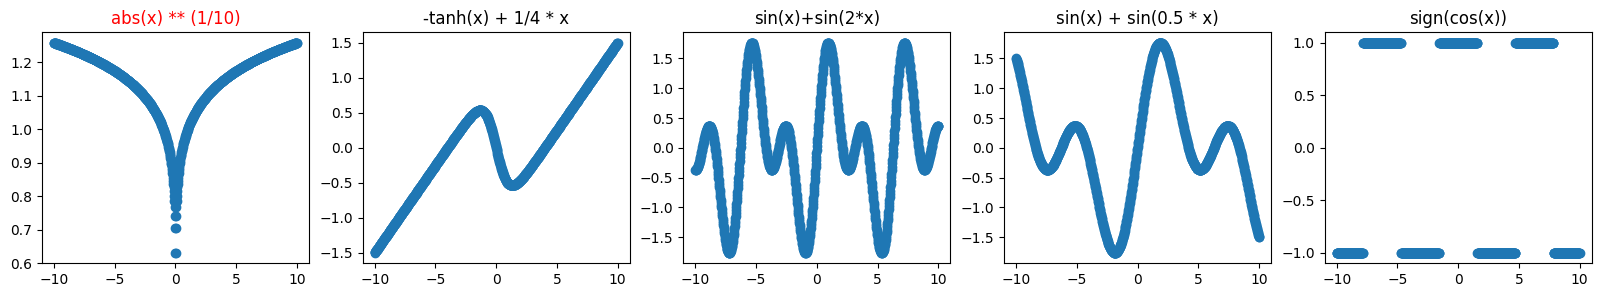

Question  17


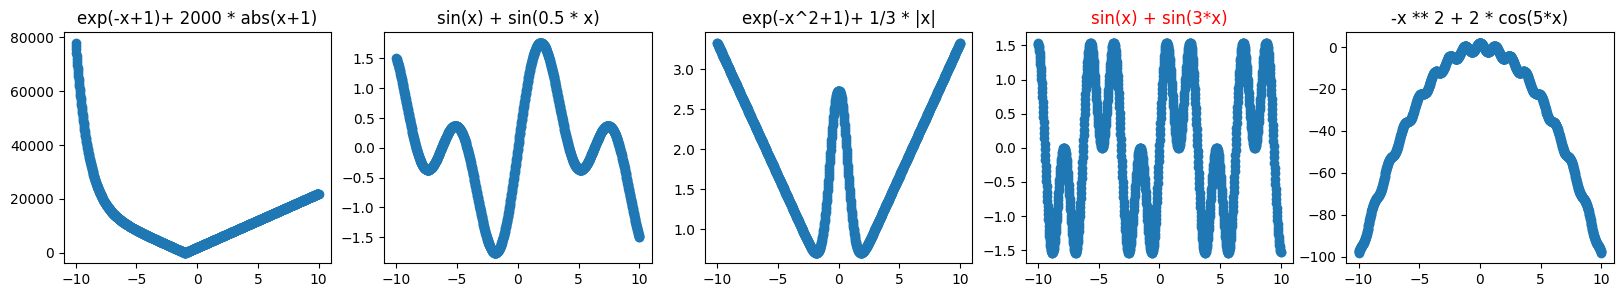

Question  18


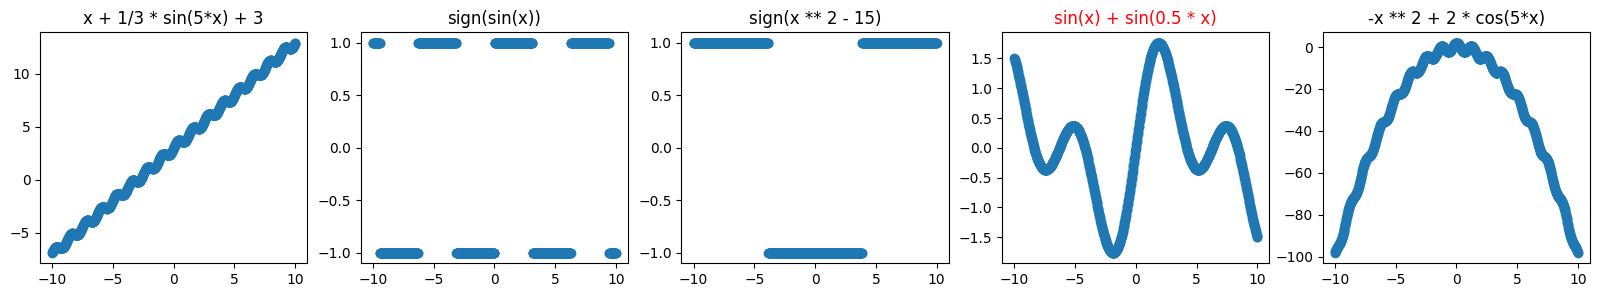

Question  19


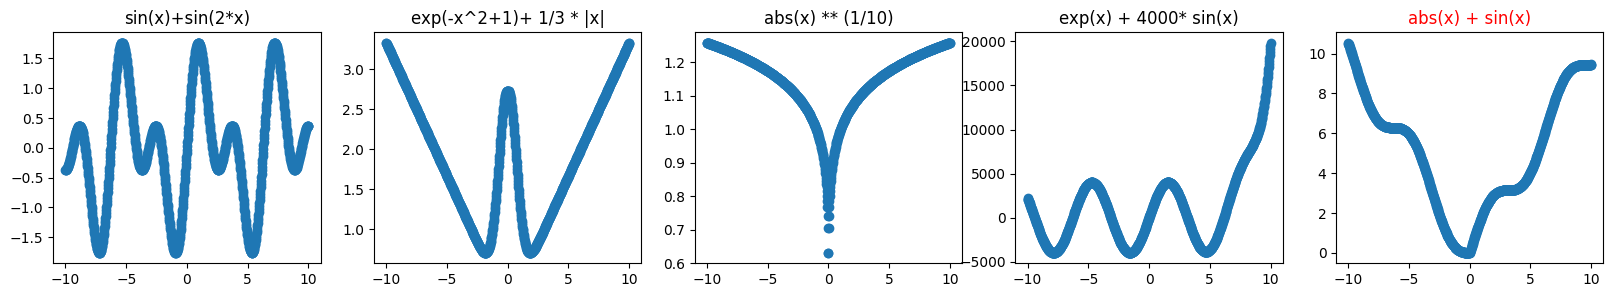

Question  20


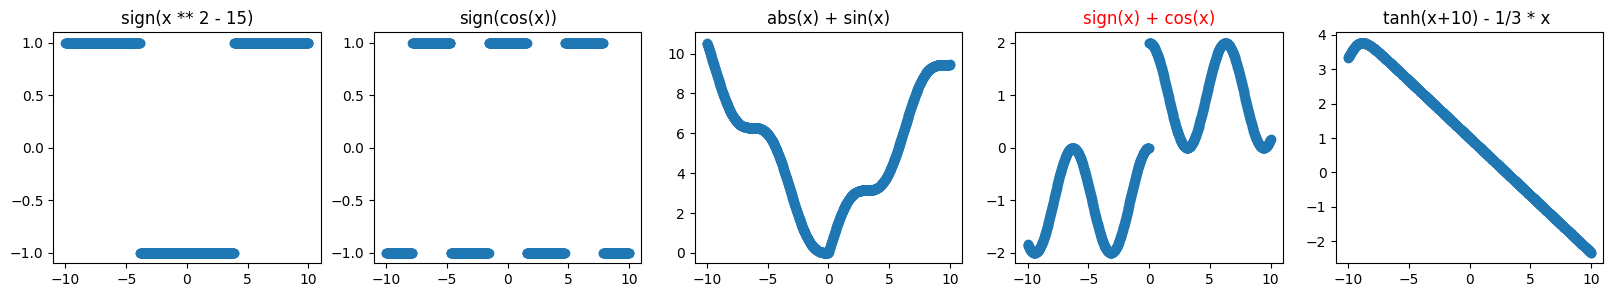

Question  21


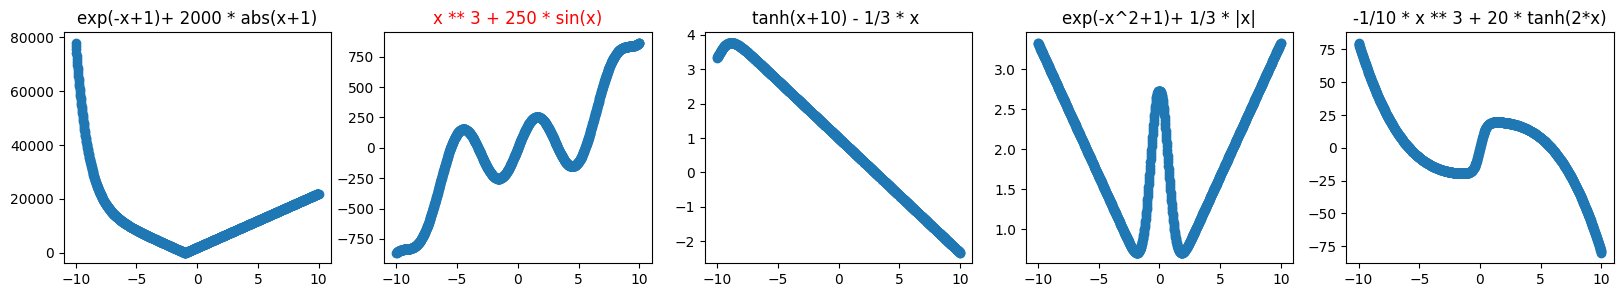

Question  22


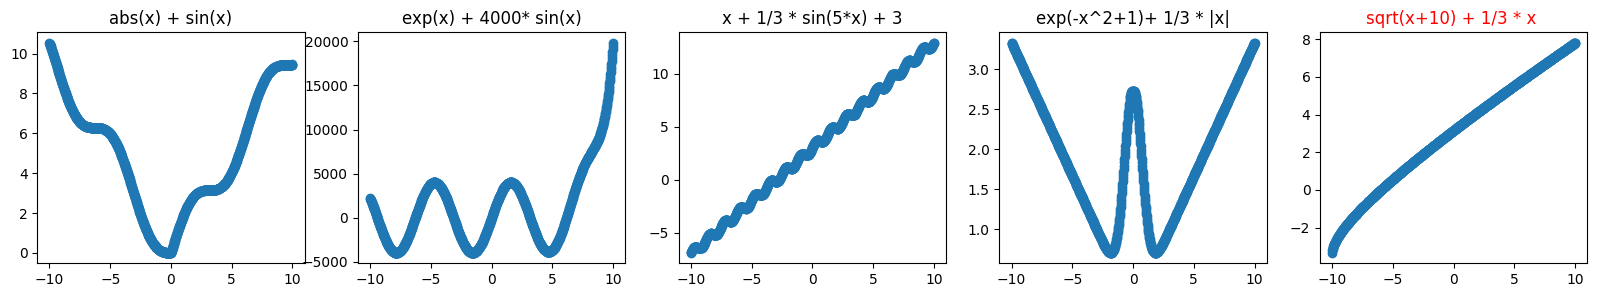

Question  23


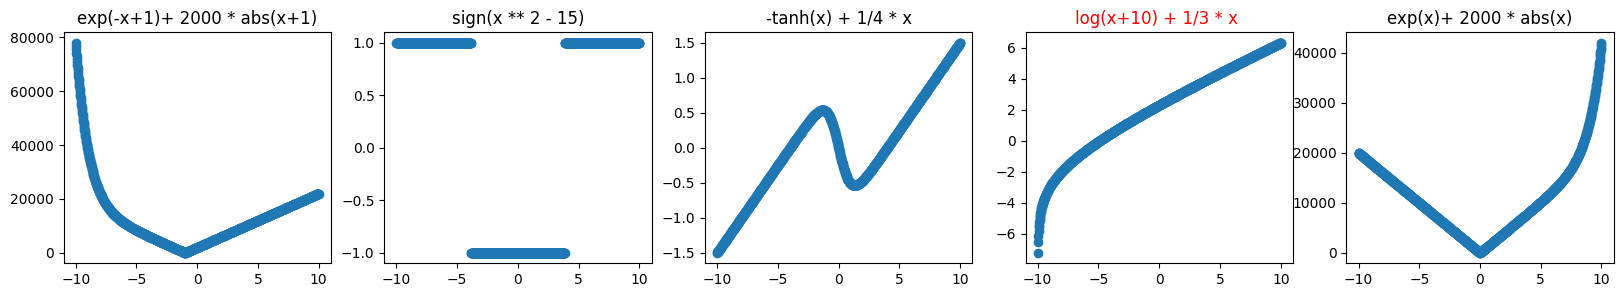

Question  24


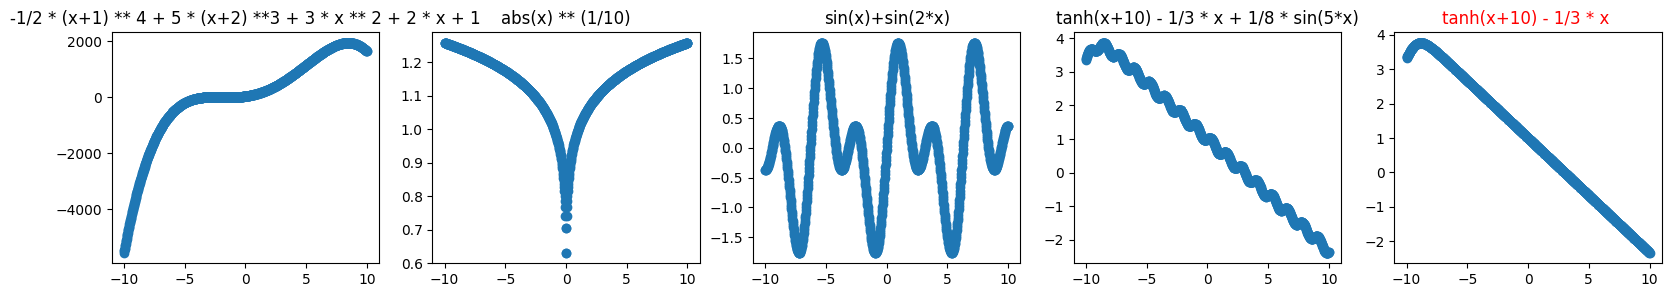

Question  25


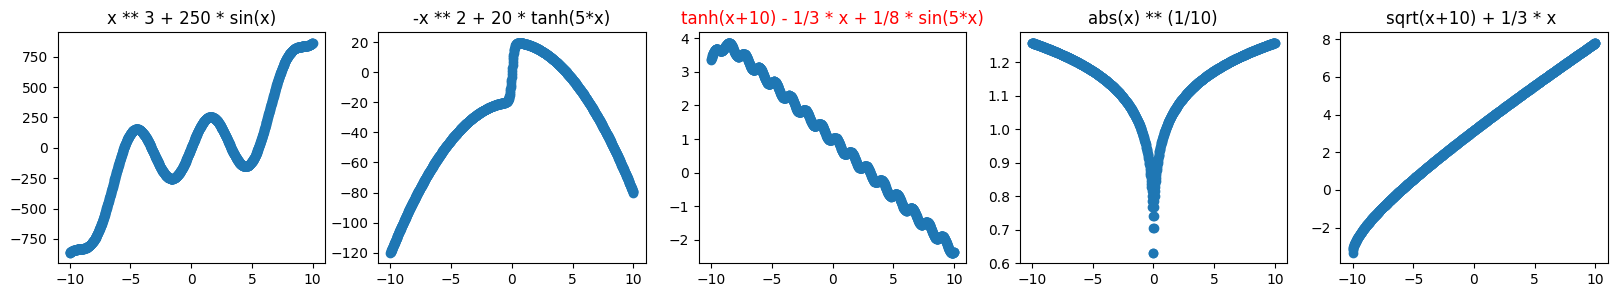

Question  26


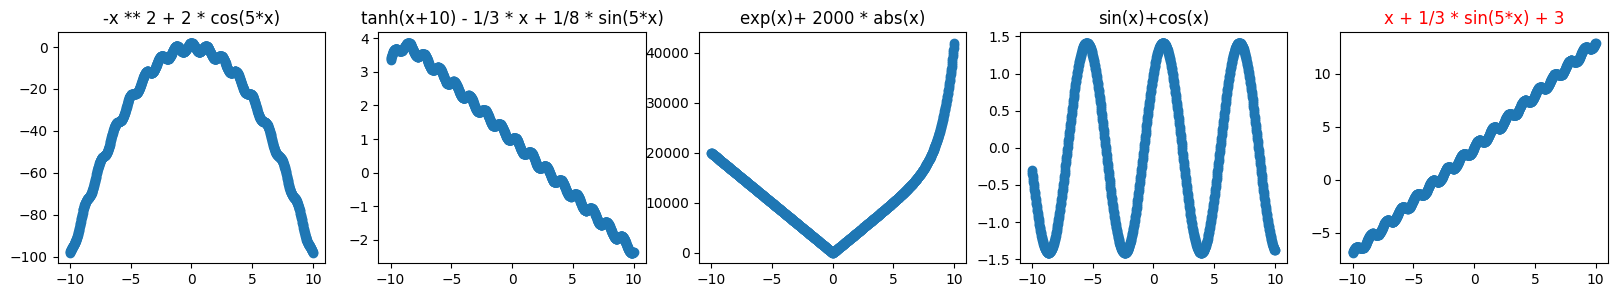

Question  27


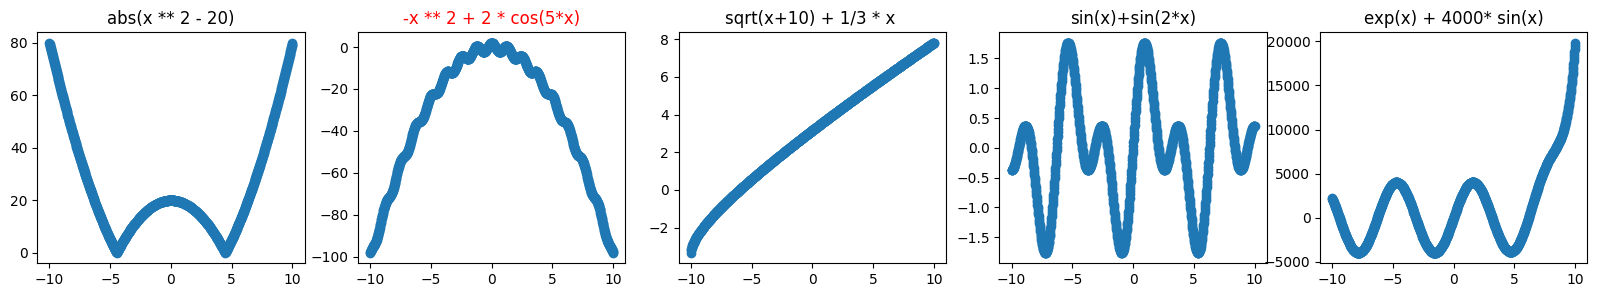

Question  28


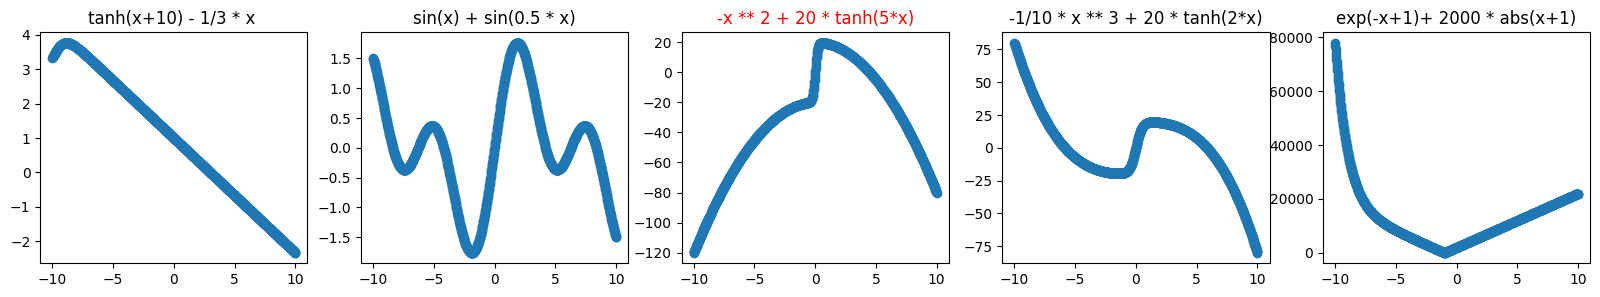

Question  29


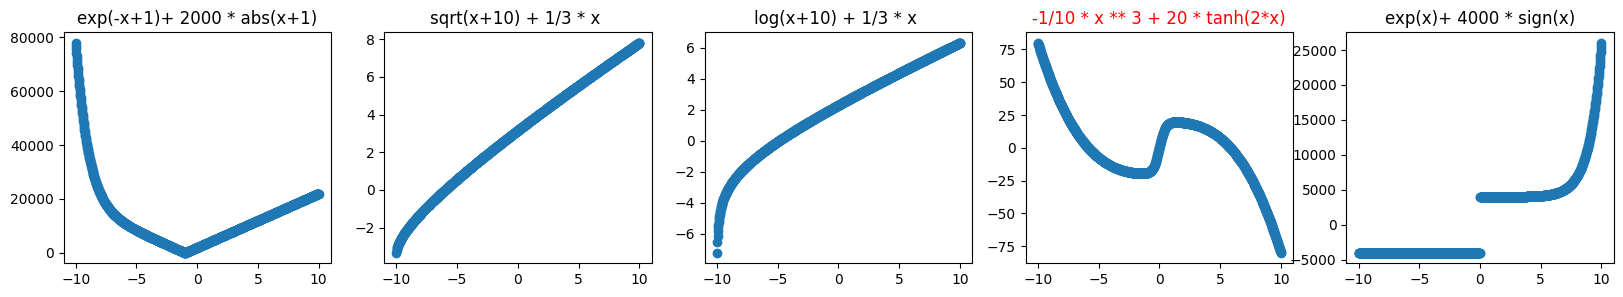

In [ ]:
# first, randomly select the other multiple choice options
np.random.seed(0)
fbench_hard_questions = []
for idx, _ in enumerate(fbench_hard):
    mc_options = [idx]
    # select 4 more random functions
    for _ in range(4):
        random_idx = np.random.randint(0, len(fbench_hard))
        while random_idx in mc_options:
            random_idx = np.random.randint(0, len(fbench_hard))
        mc_options.append(random_idx)
    # shuffle options
    np.random.shuffle(mc_options)
    # store the options and the correct answer
    fbench_hard_questions.append((mc_options, idx))

# plot the 5 functions for each question
# make a 1x5 grid of plots
for idx, (options, correct) in enumerate(fbench_hard_questions):
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    print('Question ', idx)
    for i, ax in enumerate(axes):
        f, n = fbench_hard[options[i]]
        y = f(x)
        ax.scatter(x, y)
        ax.set_title(n)
        # if it is the correct one, set the title color to red
        if options[i] == correct:
            ax.title.set_color('red')
    plt.show()

# Fit EBMs to the functions and convert the EBM graphs to text

In [ ]:
# run this for hard, otherwise standard
fbench = fbench_hard
fbench_questions = fbench_hard_questions

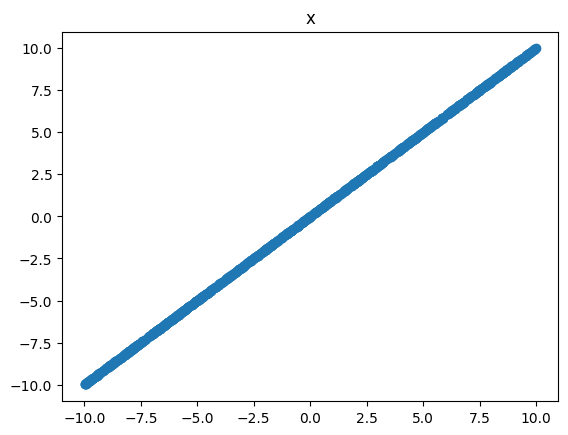

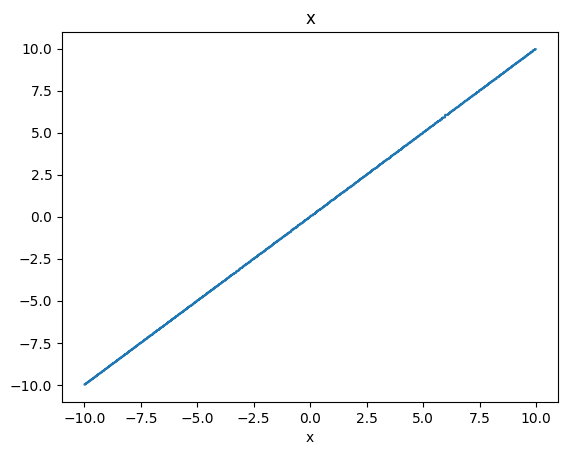

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.97)": -9.98, "(-9.97, -9.95)": -9.96, "(-9.95, -9.91)": -9.93, "(-9.91, -9.88)": -9.9, "(-9.88, -9.86)": -9.87, "(-9.86, -9.82)": -9.84, "(-9.82, -9.77)": -9.8, "(-9.77, -9.75)": -9.76, "(-9.75, -9.72)": -9.73, "(-9.72, -9.68)": -9.7, "(-9.68, -9.64)": -9.66, "(-9.64, -9.61)": -9.63, "(-9.61, -9.56)": -9.6, "(-9.56, -9.51)": -9.53, "(-9.51, -9.48)": -9.5, "(-9.48, -9.45)": -9.47, "(-9.45, -9.43)": -9.44, "(-9.43, -9.4)": -9.42, "(-9.4, -9.37)": -9.39, "(-9.37, -9.35)": -9.36, "(-9.35, -9.32)": -9.33, "(-9.32, -9.28)": -9.29, "(-9.28, -9.22)": -9.26, "(-9.22, -9.16)": -9.19, "(-9.16, -9.14)": -9.16, "(-9.14, -9.14)": -9.14, "(-9.14, -9.09)": -9.11, "(-9.09, -9.03)": -9.05, "(-9.03, -9.01)": -9.03, "(-9.01, -8.98)": -9.0, "(-8.98, -8.97)

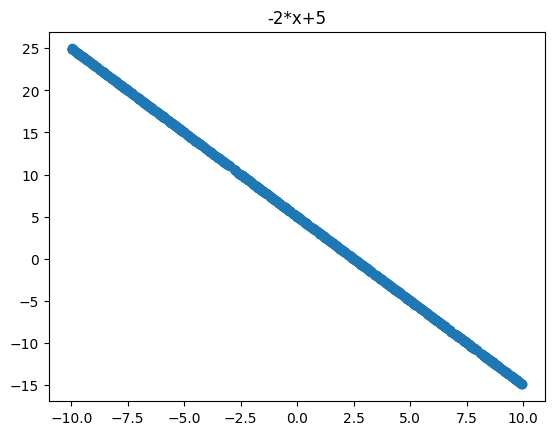

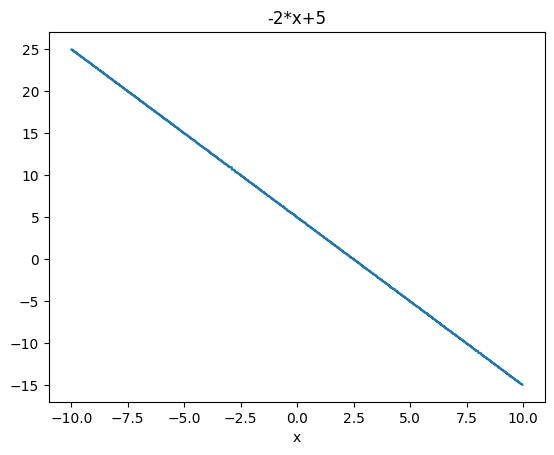

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.96)": 24.97, "(-9.96, -9.94)": 24.92, "(-9.94, -9.9)": 24.86, "(-9.9, -9.87)": 24.79, "(-9.87, -9.83)": 24.7, "(-9.83, -9.8)": 24.63, "(-9.8, -9.77)": 24.58, "(-9.77, -9.73)": 24.49, "(-9.73, -9.7)": 24.45, "(-9.7, -9.69)": 24.4, "(-9.69, -9.66)": 24.36, "(-9.66, -9.64)": 24.32, "(-9.64, -9.61)": 24.25, "(-9.61, -9.58)": 24.19, "(-9.58, -9.54)": 24.13, "(-9.54, -9.5)": 24.04, "(-9.5, -9.47)": 23.99, "(-9.47, -9.45)": 23.93, "(-9.45, -9.41)": 23.86, "(-9.41, -9.34)": 23.73, "(-9.34, -9.3)": 23.65, "(-9.3, -9.27)": 23.56, "(-9.27, -9.22)": 23.52, "(-9.22, -9.17)": 23.39, "(-9.17, -9.13)": 23.33, "(-9.13, -9.1)": 23.26, "(-9.1, -9.06)": 23.16, "(-9.06, -9.05)": 23.12, "(-9.05, -9.02)": 23.08, "(-9.02, -8.99)": 23.0, "(-8.99, -8.94)": 22.9

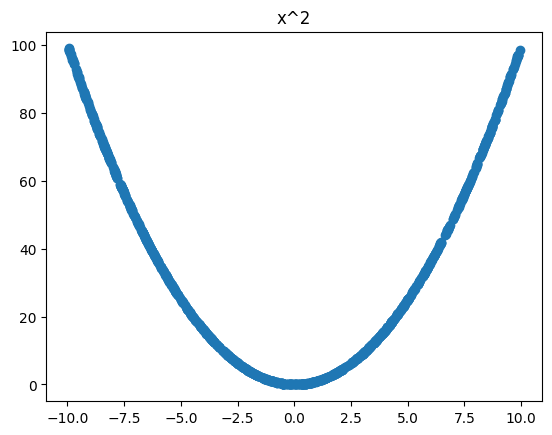

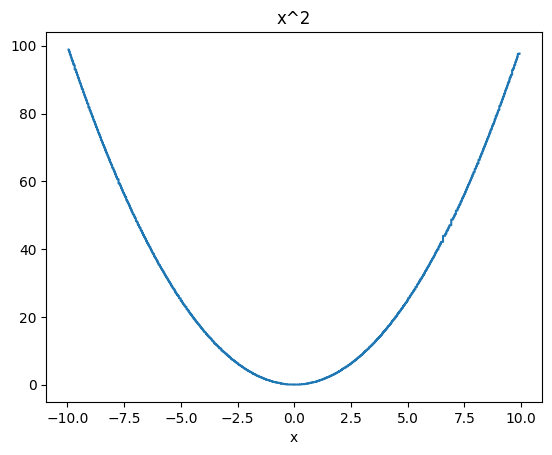

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.95, -9.94)": 98.9, "(-9.94, -9.93)": 98.69, "(-9.93, -9.91)": 98.47, "(-9.91, -9.89)": 98.22, "(-9.89, -9.87)": 97.58, "(-9.87, -9.85)": 97.2, "(-9.85, -9.82)": 96.64, "(-9.82, -9.79)": 95.99, "(-9.79, -9.77)": 95.58, "(-9.77, -9.75)": 95.34, "(-9.75, -9.72)": 94.8, "(-9.72, -9.68)": 94.28, "(-9.68, -9.62)": 92.96, "(-9.62, -9.59)": 92.24, "(-9.59, -9.58)": 91.81, "(-9.58, -9.54)": 91.43, "(-9.54, -9.51)": 90.71, "(-9.51, -9.51)": 90.46, "(-9.51, -9.49)": 90.26, "(-9.49, -9.46)": 89.76, "(-9.46, -9.42)": 89.05, "(-9.42, -9.4)": 88.54, "(-9.4, -9.37)": 88.03, "(-9.37, -9.34)": 87.34, "(-9.34, -9.31)": 87.09, "(-9.31, -9.28)": 86.35, "(-9.28, -9.27)": 86.05, "(-9.27, -9.26)": 85.85, "(-9.26, -9.24)": 85.58, "(-9.24, -9.22)": 85.21, "(-9.22, -9.

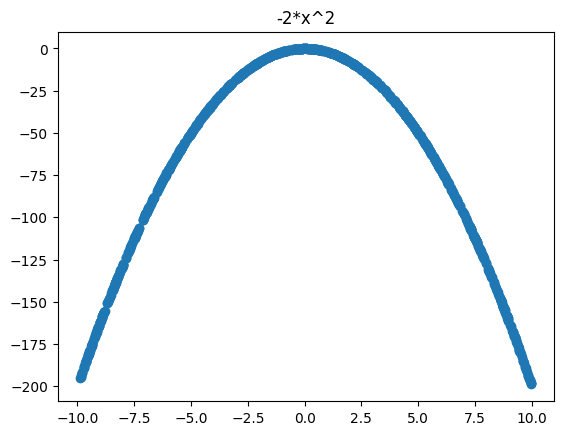

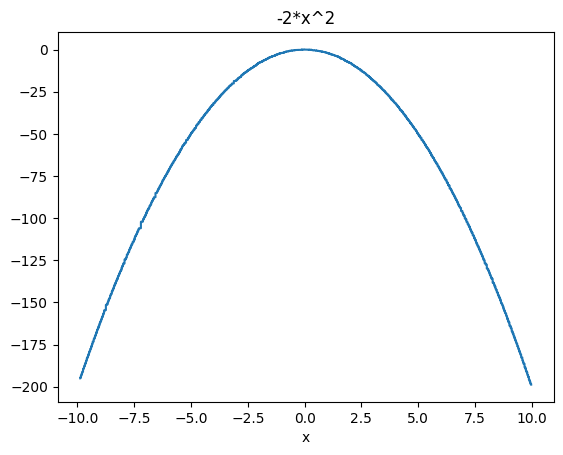

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.88, -9.87)": -195.1, "(-9.87, -9.85)": -194.3, "(-9.85, -9.82)": -193.3, "(-9.82, -9.79)": -192.3, "(-9.79, -9.76)": -191.1, "(-9.76, -9.72)": -189.4, "(-9.72, -9.71)": -188.7, "(-9.71, -9.7)": -188.2, "(-9.7, -9.67)": -187.7, "(-9.67, -9.65)": -186.6, "(-9.65, -9.64)": -186.0, "(-9.64, -9.63)": -185.6, "(-9.63, -9.61)": -185.1, "(-9.61, -9.59)": -184.4, "(-9.59, -9.56)": -183.1, "(-9.56, -9.54)": -182.4, "(-9.54, -9.52)": -181.9, "(-9.52, -9.51)": -181.2, "(-9.51, -9.5)": -180.8, "(-9.5, -9.49)": -180.2, "(-9.49, -9.47)": -179.4, "(-9.47, -9.44)": -178.8, "(-9.44, -9.4)": -177.5, "(-9.4, -9.38)": -176.5, "(-9.38, -9.37)": -176.0, "(-9.37, -9.35)": -175.4, "(-9.35, -9.33)": -174.9, "(-9.33, -9.29)": -173.3, "(-9.29, -9.26)": -171.7, "(-9.26, 

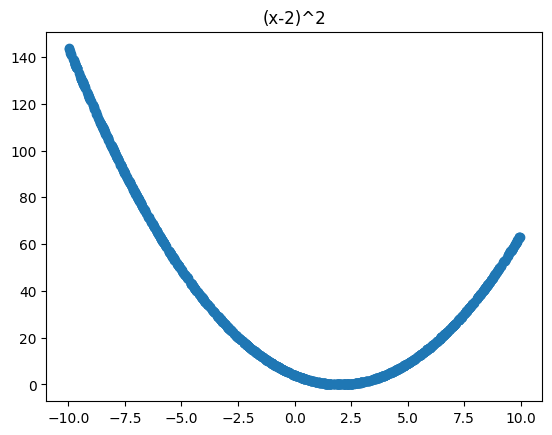

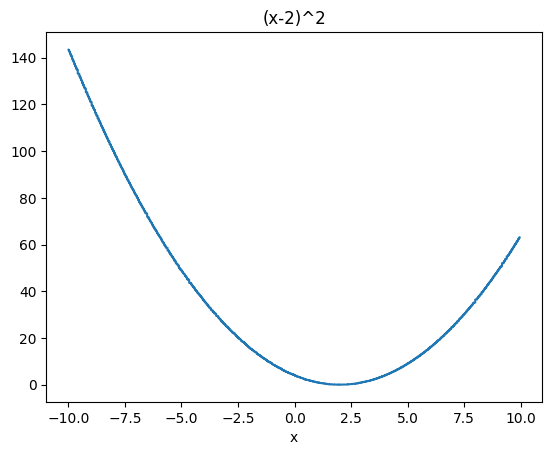

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.98)": 143.5, "(-9.98, -9.95)": 143.2, "(-9.95, -9.92)": 142.5, "(-9.92, -9.89)": 141.7, "(-9.89, -9.87)": 141.1, "(-9.87, -9.83)": 140.6, "(-9.83, -9.79)": 139.3, "(-9.79, -9.77)": 138.7, "(-9.77, -9.74)": 138.3, "(-9.74, -9.71)": 137.3, "(-9.71, -9.69)": 137.0, "(-9.69, -9.67)": 136.5, "(-9.67, -9.65)": 136.1, "(-9.65, -9.63)": 135.5, "(-9.63, -9.58)": 135.2, "(-9.58, -9.51)": 133.2, "(-9.51, -9.47)": 132.0, "(-9.47, -9.44)": 131.2, "(-9.44, -9.41)": 130.6, "(-9.41, -9.39)": 130.1, "(-9.39, -9.38)": 129.7, "(-9.38, -9.36)": 129.3, "(-9.36, -9.34)": 128.9, "(-9.34, -9.31)": 128.4, "(-9.31, -9.3)": 127.9, "(-9.3, -9.29)": 127.5, "(-9.29, -9.27)": 127.2, "(-9.27, -9.22)": 126.9, "(-9.22, -9.16)": 125.2, "(-9.16, -9.13)": 124.1, "(-9.13, 

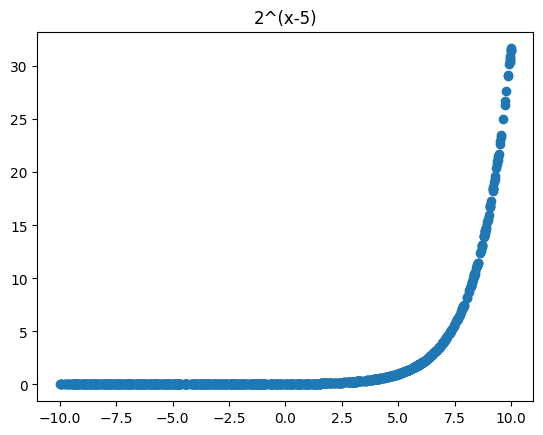

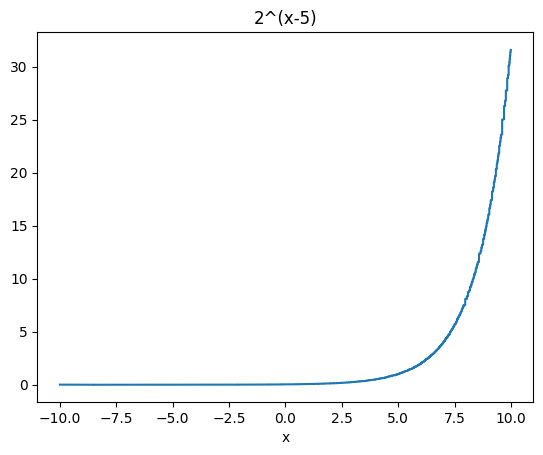

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, 0.26)": 0.01, "(0.26, 1.1)": 0.04, "(1.1, 1.69)": 0.07, "(1.69, 2.13)": 0.1, "(2.13, 2.41)": 0.14, "(2.41, 2.72)": 0.17, "(2.72, 2.93)": 0.21, "(2.93, 3.15)": 0.25, "(3.15, 3.3)": 0.28, "(3.3, 3.52)": 0.32, "(3.52, 3.62)": 0.35, "(3.62, 3.72)": 0.39, "(3.72, 3.9)": 0.43, "(3.9, 3.97)": 0.46, "(3.97, 4.04)": 0.49, "(4.04, 4.15)": 0.52, "(4.15, 4.19)": 0.56, "(4.19, 4.31)": 0.6, "(4.31, 4.4)": 0.63, "(4.4, 4.49)": 0.67, "(4.49, 4.55)": 0.72, "(4.55, 4.63)": 0.77, "(4.63, 4.71)": 0.81, "(4.71, 4.75)": 0.85, "(4.75, 4.87)": 0.88, "(4.87, 4.89)": 0.91, "(4.89, 4.96)": 0.95, "(4.96, 5.03)": 0.98, "(5.03, 5.08)": 1.03, "(5.08, 5.1)": 1.07, "(5.1, 5.17)": 1.11, "(5.17, 5.23)": 1.15, "(5.23, 5.25)": 1.2, "(5.25, 5.31)": 1.24, "(5.31, 5.39)": 1.28,

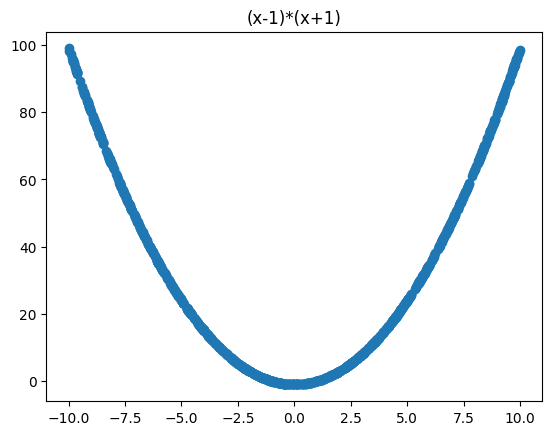

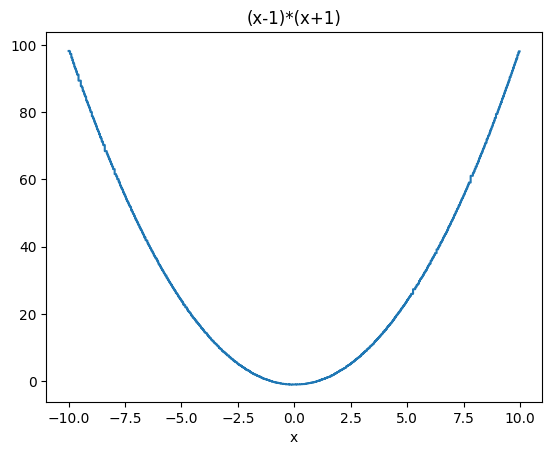

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.94)": 98.2, "(-9.94, -9.88)": 97.32, "(-9.88, -9.84)": 96.23, "(-9.84, -9.81)": 95.51, "(-9.81, -9.8)": 95.18, "(-9.8, -9.79)": 94.85, "(-9.79, -9.78)": 94.6, "(-9.78, -9.75)": 94.37, "(-9.75, -9.72)": 93.55, "(-9.72, -9.7)": 93.29, "(-9.7, -9.68)": 92.88, "(-9.68, -9.66)": 92.5, "(-9.66, -9.64)": 92.16, "(-9.64, -9.63)": 91.87, "(-9.63, -9.62)": 91.56, "(-9.62, -9.56)": 91.18, "(-9.56, -9.46)": 89.39, "(-9.46, -9.41)": 87.75, "(-9.41, -9.37)": 87.36, "(-9.37, -9.33)": 86.39, "(-9.33, -9.31)": 86.02, "(-9.31, -9.29)": 85.5, "(-9.29, -9.26)": 85.0, "(-9.26, -9.22)": 84.64, "(-9.22, -9.19)": 83.49, "(-9.19, -9.17)": 83.24, "(-9.17, -9.15)": 82.94, "(-9.15, -9.14)": 82.65, "(-9.14, -9.12)": 82.37, "(-9.12, -9.1)": 81.97, "(-9.1, -9.07)": 

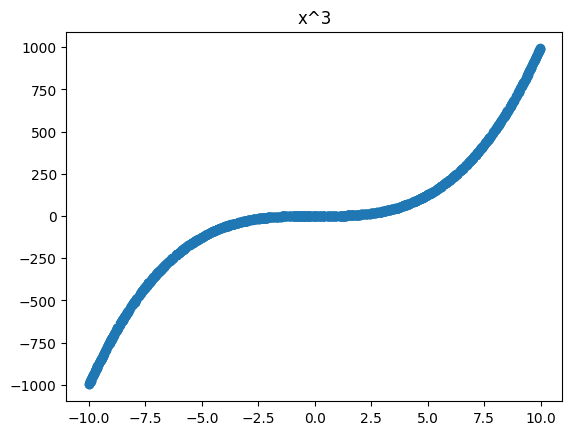

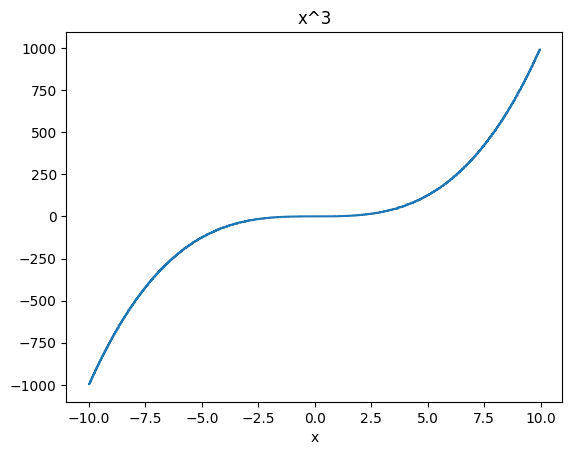

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.99)": -995.1, "(-9.99, -9.97)": -993.1, "(-9.97, -9.94)": -986.1, "(-9.94, -9.94)": -983.2, "(-9.94, -9.93)": -980.1, "(-9.93, -9.92)": -976.5, "(-9.92, -9.9)": -974.3, "(-9.9, -9.87)": -966.9, "(-9.87, -9.85)": -957.4, "(-9.85, -9.83)": -953.0, "(-9.83, -9.82)": -947.7, "(-9.82, -9.81)": -944.5, "(-9.81, -9.79)": -942.1, "(-9.79, -9.77)": -936.0, "(-9.77, -9.75)": -929.6, "(-9.75, -9.73)": -926.5, "(-9.73, -9.7)": -915.2, "(-9.7, -9.68)": -909.0, "(-9.68, -9.67)": -906.8, "(-9.67, -9.66)": -903.8, "(-9.66, -9.65)": -900.2, "(-9.65, -9.64)": -897.7, "(-9.64, -9.62)": -893.3, "(-9.62, -9.61)": -889.8, "(-9.61, -9.58)": -884.6, "(-9.58, -9.56)": -875.2, "(-9.56, -9.54)": -871.1, "(-9.54, -9.51)": -862.1, "(-9.51, -9.49)": -857.2, "(-9.49

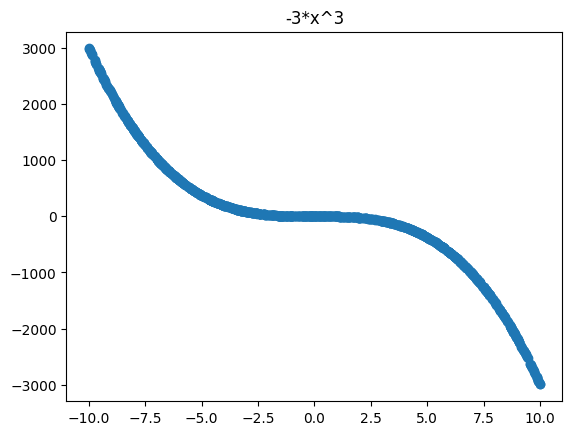

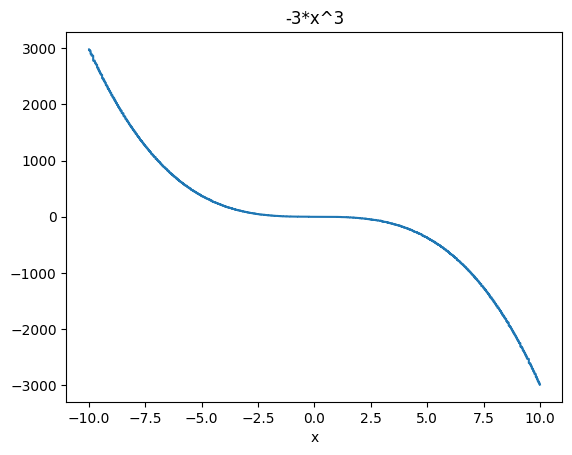

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.98)": 2978.1, "(-9.98, -9.96)": 2971.7, "(-9.96, -9.95)": 2961.6, "(-9.95, -9.91)": 2951.4, "(-9.91, -9.88)": 2900.5, "(-9.88, -9.87)": 2886.3, "(-9.87, -9.8)": 2867.0, "(-9.8, -9.73)": 2778.6, "(-9.73, -9.71)": 2754.1, "(-9.71, -9.69)": 2736.6, "(-9.69, -9.67)": 2718.1, "(-9.67, -9.63)": 2707.0, "(-9.63, -9.57)": 2654.0, "(-9.57, -9.56)": 2624.7, "(-9.56, -9.55)": 2615.8, "(-9.55, -9.53)": 2605.3, "(-9.53, -9.52)": 2593.8, "(-9.52, -9.51)": 2584.7, "(-9.51, -9.5)": 2578.5, "(-9.5, -9.49)": 2571.6, "(-9.49, -9.48)": 2560.7, "(-9.48, -9.46)": 2545.2, "(-9.46, -9.4)": 2526.9, "(-9.4, -9.35)": 2464.8, "(-9.35, -9.35)": 2452.6, "(-9.35, -9.34)": 2445.0, "(-9.34, -9.33)": 2438.3, "(-9.33, -9.3)": 2426.6, "(-9.3, -9.28)": 2403.7, "(-9.28, -9

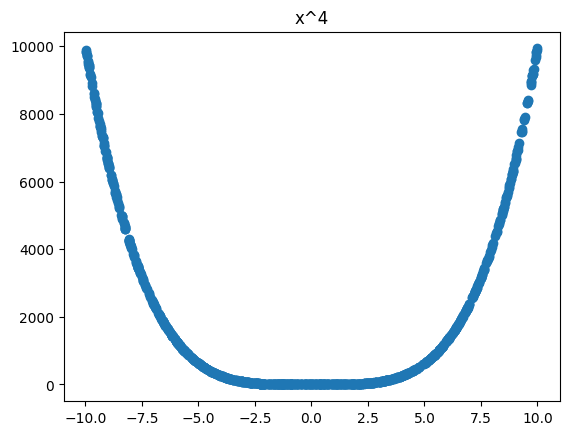

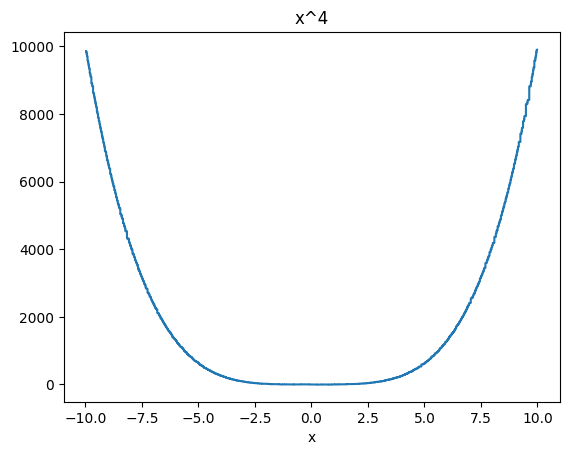

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.97, -9.96)": 9860.7, "(-9.96, -9.96)": 9833.2, "(-9.96, -9.95)": 9813.2, "(-9.95, -9.93)": 9753.3, "(-9.93, -9.93)": 9719.3, "(-9.93, -9.91)": 9705.4, "(-9.91, -9.89)": 9574.7, "(-9.89, -9.87)": 9541.3, "(-9.87, -9.86)": 9483.5, "(-9.86, -9.86)": 9446.6, "(-9.86, -9.85)": 9432.5, "(-9.85, -9.84)": 9393.5, "(-9.84, -9.84)": 9369.2, "(-9.84, -9.81)": 9342.2, "(-9.81, -9.78)": 9205.0, "(-9.78, -9.77)": 9148.5, "(-9.77, -9.74)": 9094.1, "(-9.74, -9.7)": 8903.0, "(-9.7, -9.66)": 8817.5, "(-9.66, -9.63)": 8624.5, "(-9.63, -9.61)": 8581.2, "(-9.61, -9.6)": 8507.2, "(-9.6, -9.58)": 8448.8, "(-9.58, -9.57)": 8404.1, "(-9.57, -9.55)": 8341.7, "(-9.55, -9.55)": 8314.0, "(-9.55, -9.54)": 8286.8, "(-9.54, -9.53)": 8262.4, "(-9.53, -9.52)": 8240.6, "(-9.52

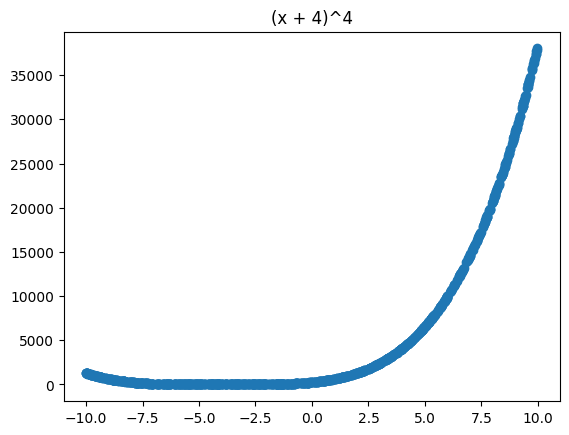

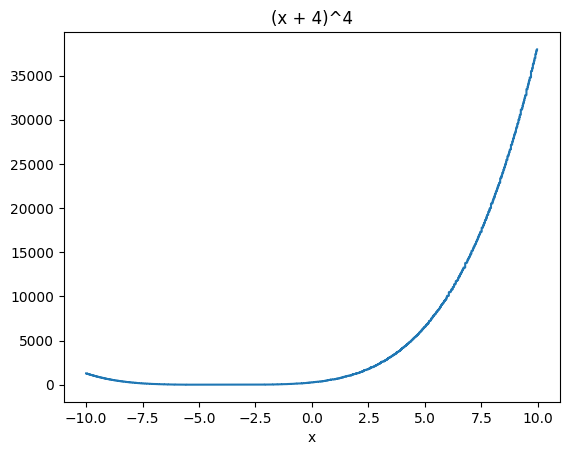

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.95)": 1282.2, "(-9.95, -9.88)": 1239.3, "(-9.88, -9.82)": 1187.9, "(-9.82, -9.76)": 1129.5, "(-9.76, -9.7)": 1089.8, "(-9.7, -9.64)": 1037.5, "(-9.64, -9.56)": 995.8, "(-9.56, -9.5)": 950.3, "(-9.5, -9.43)": 909.9, "(-9.43, -9.35)": 858.4, "(-9.35, -9.28)": 815.5, "(-9.28, -9.23)": 765.2, "(-9.23, -9.12)": 725.5, "(-9.12, -9.06)": 679.5, "(-9.06, -8.96)": 640.0, "(-8.96, -8.87)": 600.0, "(-8.87, -8.79)": 558.3, "(-8.79, -8.67)": 517.2, "(-8.67, -8.55)": 470.8, "(-8.55, -8.43)": 420.6, "(-8.43, -8.31)": 380.6, "(-8.31, -8.18)": 339.5, "(-8.18, -8.05)": 301.1, "(-8.05, -7.86)": 261.4, "(-7.86, -7.7)": 222.3, "(-7.7, -7.45)": 180.2, "(-7.45, -7.12)": 134.0, "(-7.12, -6.72)": 95.4, "(-6.72, -6.08)": 55.2, "(-6.08, -1.33)": 15.4, "(-1.33, -

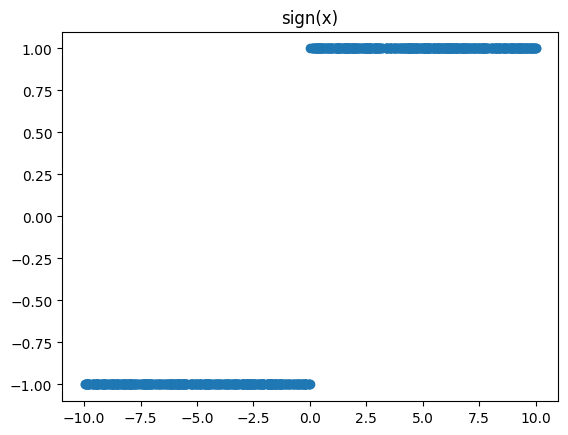

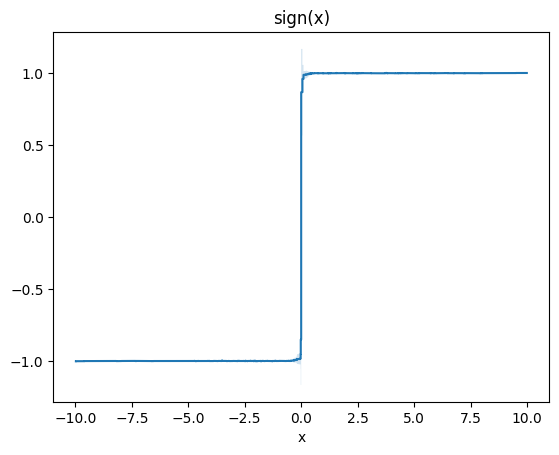

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.56)": -1.002, "(-9.56, -3.51)": -1.0, "(-3.51, -3.49)": -0.997, "(-3.49, -2.1)": -1.0, "(-2.1, -2.09)": -1.002, "(-2.09, -0.4)": -1.0, "(-0.4, -0.31)": -0.998, "(-0.31, -0.23)": -0.994, "(-0.23, -0.19)": -0.991, "(-0.19, -0.18)": -0.989, "(-0.18, -0.04)": -0.987, "(-0.04, -0.02)": -0.983, "(-0.02, -0.02)": -0.953, "(-0.02, 0.0)": -0.851, "(0.0, 0.05)": 0.868, "(0.05, 0.1)": 0.96, "(0.1, 0.22)": 0.989, "(0.22, 0.29)": 0.991, "(0.29, 0.33)": 0.994, "(0.33, 0.44)": 0.996, "(0.44, 9.74)": 1.0, "(9.74, 9.99)": 1.002}



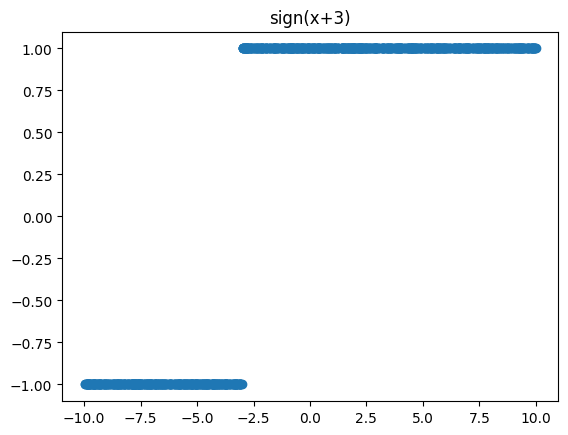

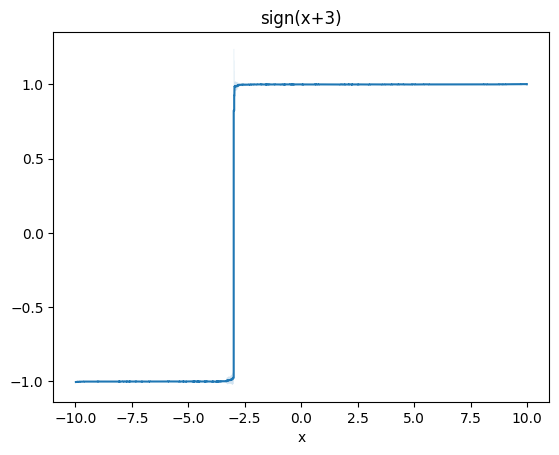

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.81)": -1.004, "(-9.81, -8.07)": -1.001, "(-8.07, -7.61)": -0.999, "(-7.61, -7.6)": -1.002, "(-7.6, -7.06)": -0.999, "(-7.06, -6.73)": -1.002, "(-6.73, -4.74)": -0.999, "(-4.74, -4.66)": -1.002, "(-4.66, -3.75)": -0.999, "(-3.75, -3.74)": -1.002, "(-3.74, -3.31)": -1.0, "(-3.31, -3.24)": -0.995, "(-3.24, -3.12)": -0.991, "(-3.12, -3.07)": -0.988, "(-3.07, -3.03)": -0.985, "(-3.03, -2.99)": -0.976, "(-2.99, -2.97)": 0.824, "(-2.97, -2.96)": 0.925, "(-2.96, -2.95)": 0.955, "(-2.95, -2.94)": 0.984, "(-2.94, -2.83)": 0.989, "(-2.83, -2.79)": 0.992, "(-2.79, -2.61)": 0.997, "(-2.61, -0.49)": 0.999, "(-0.49, -0.41)": 1.002, "(-0.41, -0.34)": 0.998, "(-0.34, 0.06)": 1.001, "(0.06, 0.22)": 0.998, "(0.22, 9.99)": 1.001}



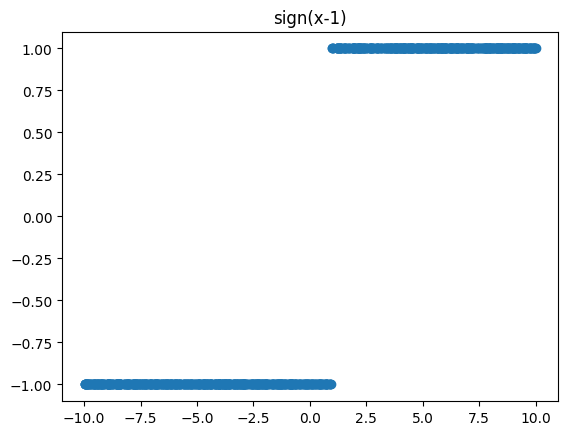

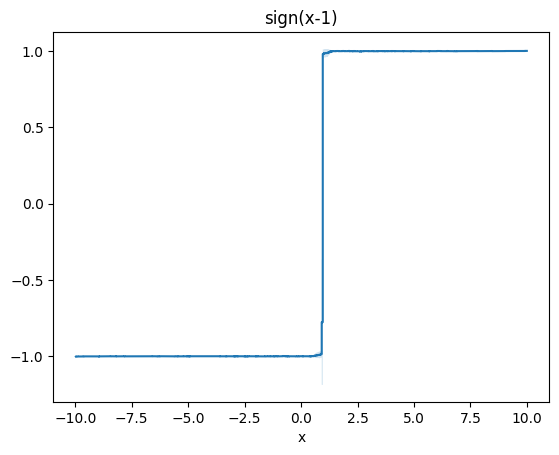

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -7.84)": -1.002, "(-7.84, -2.48)": -1.0, "(-2.48, -2.35)": -1.002, "(-2.35, -2.01)": -0.999, "(-2.01, -1.93)": -1.001, "(-1.93, 0.58)": -0.999, "(0.58, 0.68)": -0.997, "(0.68, 0.79)": -0.993, "(0.79, 0.84)": -0.991, "(0.84, 0.88)": -0.988, "(0.88, 0.9)": -0.985, "(0.9, 0.91)": -0.983, "(0.91, 0.96)": -0.777, "(0.96, 1.0)": 0.981, "(1.0, 1.11)": 0.986, "(1.11, 1.2)": 0.988, "(1.2, 1.22)": 0.991, "(1.22, 1.27)": 0.993, "(1.27, 1.34)": 0.997, "(1.34, 1.57)": 0.999, "(1.57, 1.94)": 1.001, "(1.94, 2.12)": 0.999, "(2.12, 2.14)": 1.001, "(2.14, 3.16)": 0.999, "(3.16, 3.33)": 1.001, "(3.33, 3.99)": 0.999, "(3.99, 4.86)": 1.001, "(4.86, 4.94)": 0.999, "(4.94, 10.0)": 1.001}



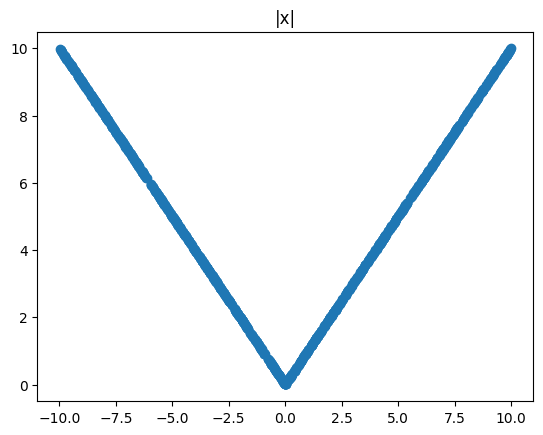

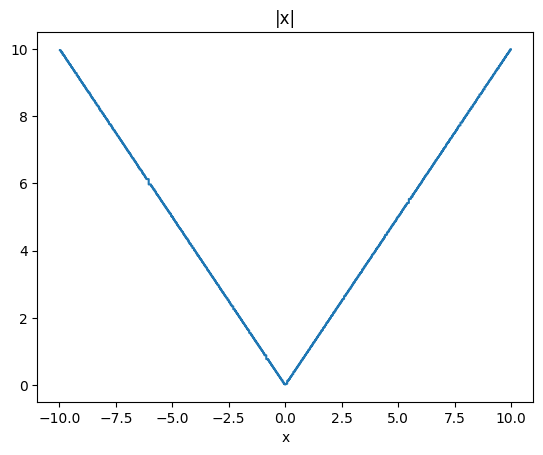

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.95)": 9.963, "(-9.95, -9.91)": 9.941, "(-9.91, -9.86)": 9.893, "(-9.86, -9.8)": 9.824, "(-9.8, -9.77)": 9.794, "(-9.77, -9.73)": 9.761, "(-9.73, -9.71)": 9.725, "(-9.71, -9.68)": 9.697, "(-9.68, -9.64)": 9.657, "(-9.64, -9.61)": 9.626, "(-9.61, -9.58)": 9.592, "(-9.58, -9.55)": 9.558, "(-9.55, -9.52)": 9.538, "(-9.52, -9.5)": 9.515, "(-9.5, -9.47)": 9.491, "(-9.47, -9.44)": 9.464, "(-9.44, -9.4)": 9.426, "(-9.4, -9.35)": 9.379, "(-9.35, -9.33)": 9.34, "(-9.33, -9.3)": 9.314, "(-9.3, -9.24)": 9.277, "(-9.24, -9.18)": 9.207, "(-9.18, -9.17)": 9.184, "(-9.17, -9.14)": 9.161, "(-9.14, -9.13)": 9.139, "(-9.13, -9.11)": 9.119, "(-9.11, -9.07)": 9.081, "(-9.07, -9.04)": 9.06, "(-9.04, -9.03)": 9.033, "(-9.03, -9.0)": 9.011, "(-9.0, -8.97)": 8

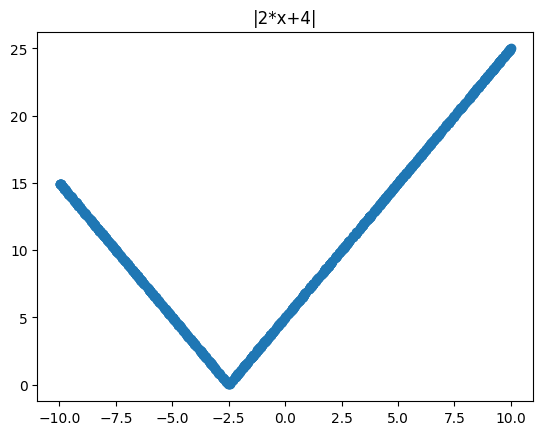

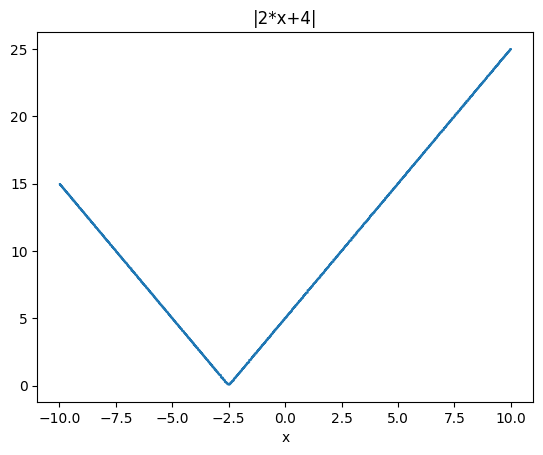

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.96)": 14.96, "(-9.96, -9.92)": 14.91, "(-9.92, -9.88)": 14.82, "(-9.88, -9.85)": 14.74, "(-9.85, -9.81)": 14.68, "(-9.81, -9.77)": 14.59, "(-9.77, -9.75)": 14.53, "(-9.75, -9.71)": 14.46, "(-9.71, -9.68)": 14.4, "(-9.68, -9.65)": 14.33, "(-9.65, -9.6)": 14.27, "(-9.6, -9.58)": 14.19, "(-9.58, -9.53)": 14.14, "(-9.53, -9.49)": 14.03, "(-9.49, -9.44)": 13.96, "(-9.44, -9.38)": 13.82, "(-9.38, -9.32)": 13.69, "(-9.32, -9.28)": 13.61, "(-9.28, -9.25)": 13.56, "(-9.25, -9.22)": 13.49, "(-9.22, -9.19)": 13.42, "(-9.19, -9.16)": 13.37, "(-9.16, -9.13)": 13.28, "(-9.13, -9.07)": 13.21, "(-9.07, -9.01)": 13.1, "(-9.01, -8.97)": 12.97, "(-8.97, -8.92)": 12.9, "(-8.92, -8.88)": 12.8, "(-8.88, -8.86)": 12.75, "(-8.86, -8.82)": 12.7, "(-8.82, -8.78

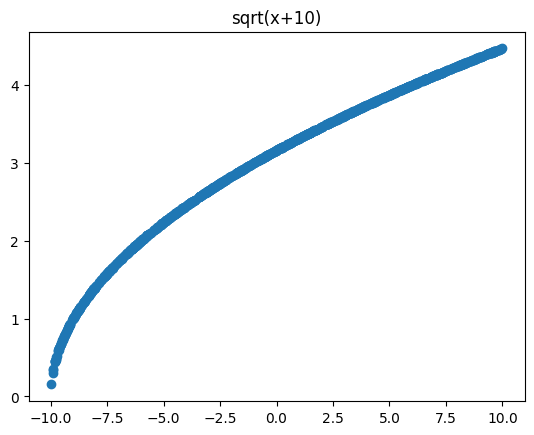

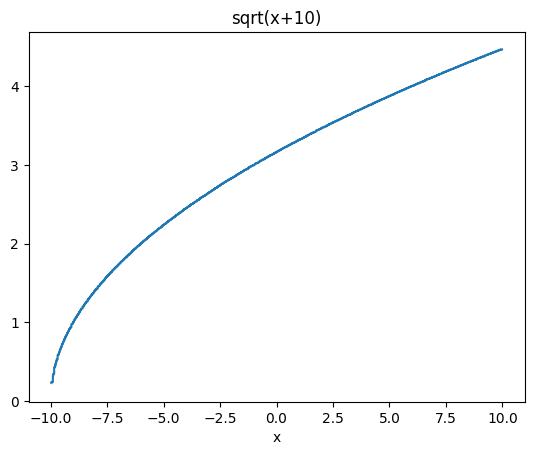

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.94)": 0.235, "(-9.94, -9.9)": 0.242, "(-9.9, -9.88)": 0.324, "(-9.88, -9.84)": 0.348, "(-9.84, -9.8)": 0.432, "(-9.8, -9.79)": 0.451, "(-9.79, -9.78)": 0.46, "(-9.78, -9.77)": 0.473, "(-9.77, -9.76)": 0.486, "(-9.76, -9.73)": 0.506, "(-9.73, -9.69)": 0.53, "(-9.69, -9.65)": 0.586, "(-9.65, -9.65)": 0.591, "(-9.65, -9.63)": 0.599, "(-9.63, -9.62)": 0.613, "(-9.62, -9.61)": 0.619, "(-9.61, -9.6)": 0.627, "(-9.6, -9.57)": 0.649, "(-9.57, -9.55)": 0.668, "(-9.55, -9.54)": 0.674, "(-9.54, -9.53)": 0.68, "(-9.53, -9.5)": 0.69, "(-9.5, -9.48)": 0.721, "(-9.48, -9.47)": 0.726, "(-9.47, -9.46)": 0.735, "(-9.46, -9.43)": 0.743, "(-9.43, -9.4)": 0.761, "(-9.4, -9.39)": 0.778, "(-9.39, -9.38)": 0.785, "(-9.38, -9.36)": 0.791, "(-9.36, -9.34)": 0.8

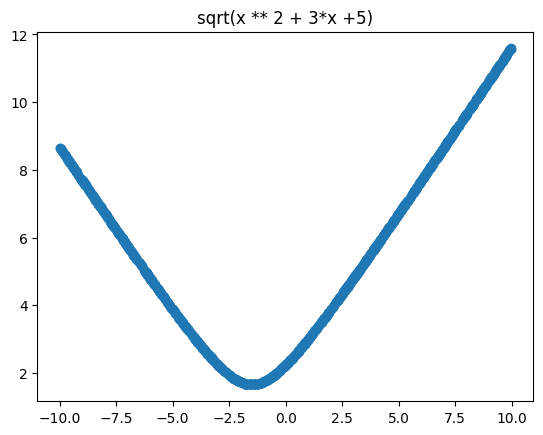

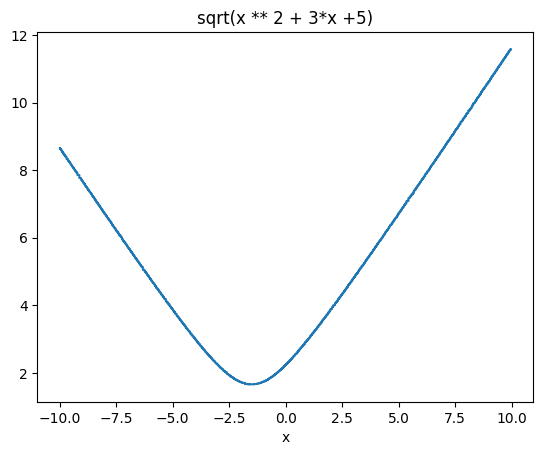

INFO: The graph of feature x was simplified by 0.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.98)": 8.651, "(-9.98, -9.94)": 8.622, "(-9.94, -9.92)": 8.596, "(-9.92, -9.89)": 8.571, "(-9.89, -9.88)": 8.549, "(-9.88, -9.83)": 8.516, "(-9.83, -9.78)": 8.467, "(-9.78, -9.76)": 8.443, "(-9.76, -9.75)": 8.417, "(-9.75, -9.7)": 8.397, "(-9.7, -9.63)": 8.331, "(-9.63, -9.58)": 8.279, "(-9.58, -9.55)": 8.242, "(-9.55, -9.53)": 8.212, "(-9.53, -9.49)": 8.186, "(-9.49, -9.46)": 8.145, "(-9.46, -9.44)": 8.118, "(-9.44, -9.41)": 8.094, "(-9.41, -9.37)": 8.073, "(-9.37, -9.36)": 8.038, "(-9.36, -9.32)": 8.015, "(-9.32, -9.29)": 7.982, "(-9.29, -9.26)": 7.955, "(-9.26, -9.22)": 7.928, "(-9.22, -9.13)": 7.855, "(-9.13, -9.06)": 7.767, "(-9.06, -9.03)": 7.729, "(-9.03, -8.99)": 7.705, "(-8.99, -8.96)": 7.67, "(-8.96, -8.93)": 7.631, "(-8.93, -

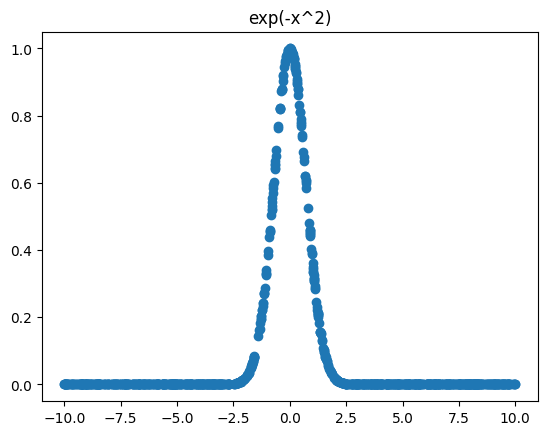

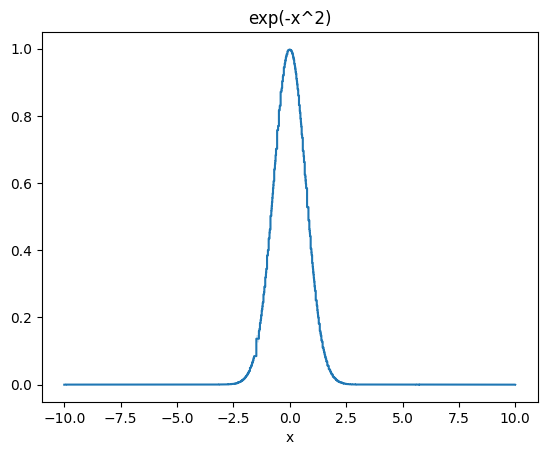

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -2.74)": -0.0005, "(-2.74, -2.58)": 0.0005, "(-2.58, -2.41)": 0.0017, "(-2.41, -2.33)": 0.0034, "(-2.33, -2.29)": 0.0046, "(-2.29, -2.27)": 0.0056, "(-2.27, -2.2)": 0.0068, "(-2.2, -2.17)": 0.0084, "(-2.17, -2.15)": 0.0099, "(-2.15, -2.1)": 0.0111, "(-2.1, -2.09)": 0.0126, "(-2.09, -2.05)": 0.014, "(-2.05, -2.02)": 0.0163, "(-2.02, -1.99)": 0.0186, "(-1.99, -1.97)": 0.0203, "(-1.97, -1.94)": 0.0218, "(-1.94, -1.9)": 0.0258, "(-1.9, -1.88)": 0.0282, "(-1.88, -1.87)": 0.0296, "(-1.87, -1.84)": 0.0324, "(-1.84, -1.83)": 0.0349, "(-1.83, -1.81)": 0.0363, "(-1.81, -1.77)": 0.0401, "(-1.77, -1.73)": 0.0498, "(-1.73, -1.72)": 0.0511, "(-1.72, -1.71)": 0.0527, "(-1.71, -1.69)": 0.0544, "(-1.69, -1.68)": 0.0585, "(-1.68, -1.67)": 0.0604, "(-1.67, 

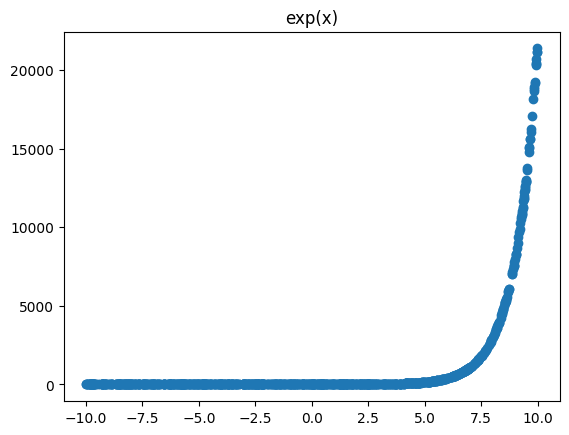

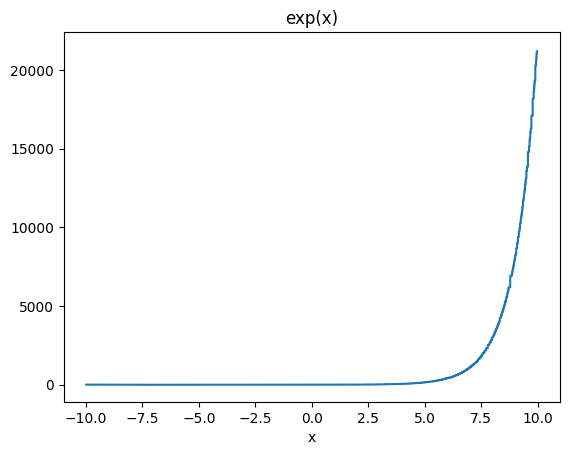

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, 3.23)": 5.4, "(3.23, 3.9)": 27.0, "(3.9, 4.24)": 49.5, "(4.24, 4.52)": 71.2, "(4.52, 4.73)": 94.4, "(4.73, 4.91)": 116.4, "(4.91, 5.04)": 142.1, "(5.04, 5.21)": 163.3, "(5.21, 5.35)": 188.2, "(5.35, 5.47)": 216.7, "(5.47, 5.56)": 243.1, "(5.56, 5.66)": 272.2, "(5.66, 5.75)": 300.5, "(5.75, 5.83)": 327.7, "(5.83, 5.91)": 355.4, "(5.91, 5.97)": 386.7, "(5.97, 6.02)": 409.7, "(6.02, 6.16)": 437.9, "(6.16, 6.24)": 473.6, "(6.24, 6.26)": 497.7, "(6.26, 6.28)": 521.9, "(6.28, 6.35)": 546.0, "(6.35, 6.39)": 572.3, "(6.39, 6.42)": 603.6, "(6.42, 6.49)": 629.6, "(6.49, 6.51)": 658.8, "(6.51, 6.56)": 683.4, "(6.56, 6.63)": 726.4, "(6.63, 6.66)": 760.8, "(6.66, 6.67)": 782.9, "(6.67, 6.69)": 807.4, "(6.69, 6.75)": 829.1, "(6.75, 6.78)": 862.5, "(6.7

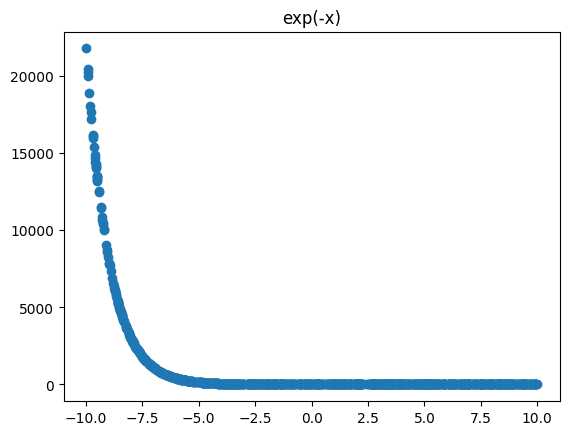

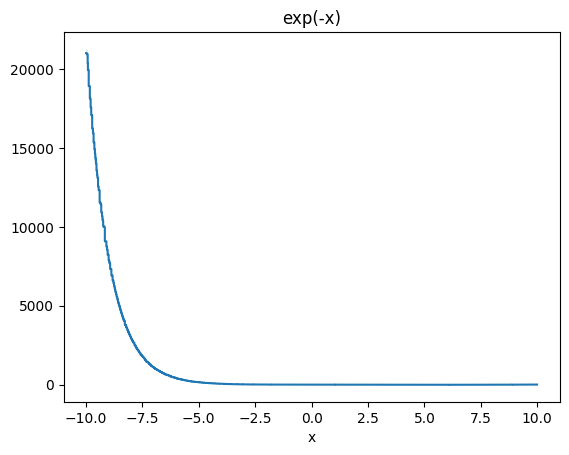

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.96)": 21013.8, "(-9.96, -9.92)": 20949.6, "(-9.92, -9.91)": 20354.5, "(-9.91, -9.88)": 19954.9, "(-9.88, -9.83)": 18925.8, "(-9.83, -9.79)": 18136.3, "(-9.79, -9.77)": 17576.5, "(-9.77, -9.72)": 17083.8, "(-9.72, -9.69)": 16243.5, "(-9.69, -9.68)": 16064.0, "(-9.68, -9.66)": 15929.9, "(-9.66, -9.62)": 15357.7, "(-9.62, -9.6)": 14921.7, "(-9.6, -9.58)": 14660.8, "(-9.58, -9.57)": 14410.9, "(-9.57, -9.56)": 14296.4, "(-9.56, -9.56)": 14221.9, "(-9.56, -9.55)": 14103.2, "(-9.55, -9.53)": 14020.9, "(-9.53, -9.51)": 13579.6, "(-9.51, -9.51)": 13507.6, "(-9.51, -9.5)": 13432.9, "(-9.5, -9.49)": 13311.7, "(-9.49, -9.49)": 13235.0, "(-9.49, -9.46)": 13112.0, "(-9.46, -9.44)": 12563.4, "(-9.44, -9.39)": 12329.9, "(-9.39, -9.35)": 11540.9, "(-9.

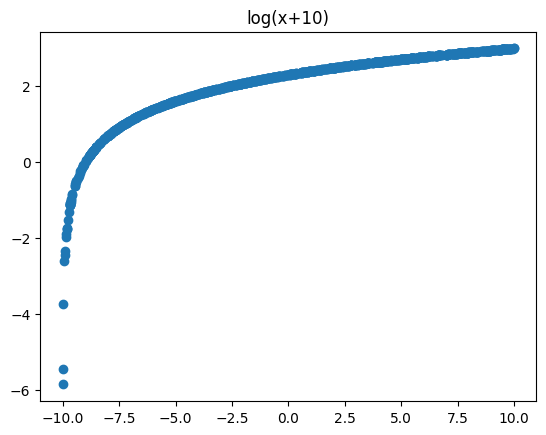

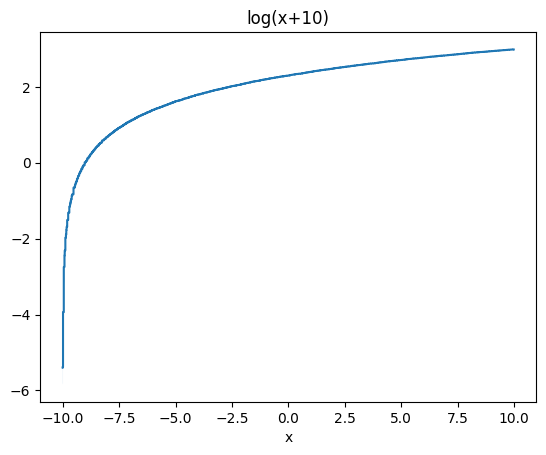

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -10.0)": -5.402, "(-10.0, -9.99)": -5.373, "(-9.99, -9.95)": -3.936, "(-9.95, -9.92)": -2.746, "(-9.92, -9.91)": -2.442, "(-9.91, -9.88)": -2.31, "(-9.88, -9.86)": -1.974, "(-9.86, -9.84)": -1.893, "(-9.84, -9.83)": -1.777, "(-9.83, -9.83)": -1.739, "(-9.83, -9.8)": -1.689, "(-9.8, -9.76)": -1.508, "(-9.76, -9.71)": -1.316, "(-9.71, -9.68)": -1.156, "(-9.68, -9.68)": -1.135, "(-9.68, -9.68)": -1.125, "(-9.68, -9.67)": -1.115, "(-9.67, -9.66)": -1.086, "(-9.66, -9.65)": -1.069, "(-9.65, -9.64)": -1.044, "(-9.64, -9.63)": -0.999, "(-9.63, -9.6)": -0.958, "(-9.6, -9.58)": -0.867, "(-9.58, -9.52)": -0.83, "(-9.52, -9.47)": -0.658, "(-9.47, -9.45)": -0.627, "(-9.45, -9.43)": -0.576, "(-9.43, -9.4)": -0.532, "(-9.4, -9.39)": -0.505, "(-9.39, -9

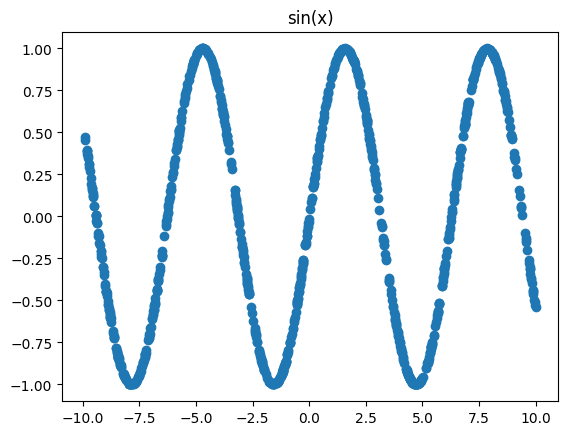

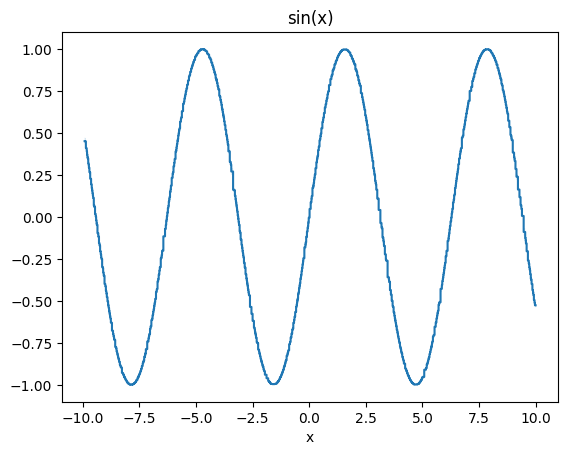

INFO: The graph of feature x was simplified by 0.4%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.92, -9.87)": 0.451, "(-9.87, -9.83)": 0.41, "(-9.83, -9.81)": 0.395, "(-9.81, -9.8)": 0.371, "(-9.8, -9.79)": 0.357, "(-9.79, -9.76)": 0.348, "(-9.76, -9.74)": 0.319, "(-9.74, -9.73)": 0.309, "(-9.73, -9.71)": 0.293, "(-9.71, -9.68)": 0.266, "(-9.68, -9.64)": 0.227, "(-9.64, -9.61)": 0.194, "(-9.61, -9.59)": 0.172, "(-9.59, -9.57)": 0.158, "(-9.57, -9.56)": 0.14, "(-9.56, -9.54)": 0.126, "(-9.54, -9.52)": 0.113, "(-9.52, -9.49)": 0.068, "(-9.49, -9.46)": 0.058, "(-9.46, -9.43)": 0.018, "(-9.43, -9.41)": 0.008, "(-9.41, -9.39)": -0.02, "(-9.39, -9.38)": -0.037, "(-9.38, -9.35)": -0.047, "(-9.35, -9.32)": -0.097, "(-9.32, -9.29)": -0.113, "(-9.29, -9.26)": -0.156, "(-9.26, -9.24)": -0.17, "(-9.24, -9.21)": -0.203, "(-9.21, -9.19)": -0.223, "(-9

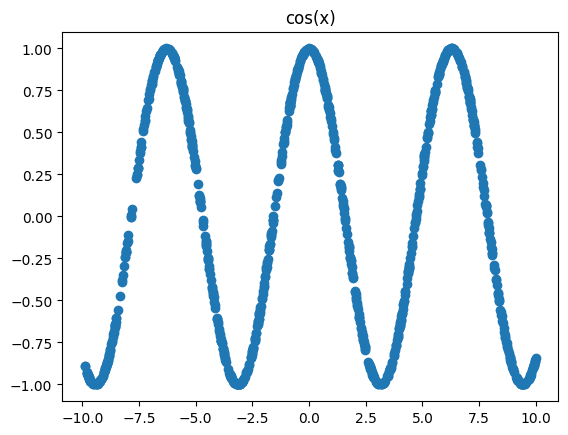

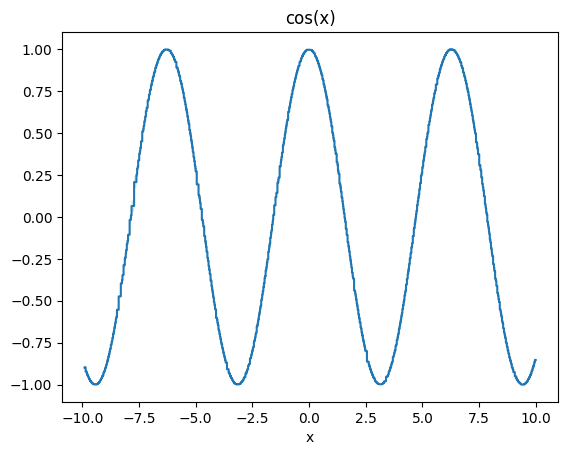

INFO: The graph of feature x was simplified by 0.4%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.9, -9.85)": -0.899, "(-9.85, -9.8)": -0.922, "(-9.8, -9.78)": -0.93, "(-9.78, -9.73)": -0.942, "(-9.73, -9.7)": -0.956, "(-9.7, -9.67)": -0.964, "(-9.67, -9.61)": -0.975, "(-9.61, -9.54)": -0.986, "(-9.54, -9.25)": -0.994, "(-9.25, -9.21)": -0.985, "(-9.21, -9.15)": -0.974, "(-9.15, -9.12)": -0.96, "(-9.12, -9.07)": -0.949, "(-9.07, -9.02)": -0.928, "(-9.02, -9.0)": -0.917, "(-9.0, -8.97)": -0.908, "(-8.97, -8.95)": -0.897, "(-8.95, -8.93)": -0.887, "(-8.93, -8.91)": -0.878, "(-8.91, -8.89)": -0.87, "(-8.89, -8.88)": -0.859, "(-8.88, -8.85)": -0.849, "(-8.85, -8.83)": -0.835, "(-8.83, -8.8)": -0.825, "(-8.8, -8.77)": -0.803, "(-8.77, -8.74)": -0.785, "(-8.74, -8.71)": -0.763, "(-8.71, -8.67)": -0.747, "(-8.67, -8.64)": -0.72, "(-8.64, -8.61)"

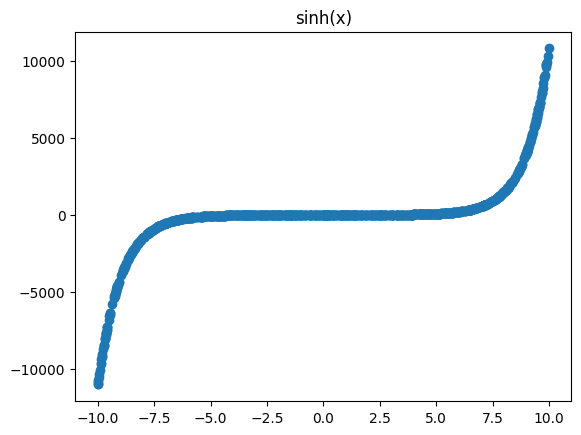

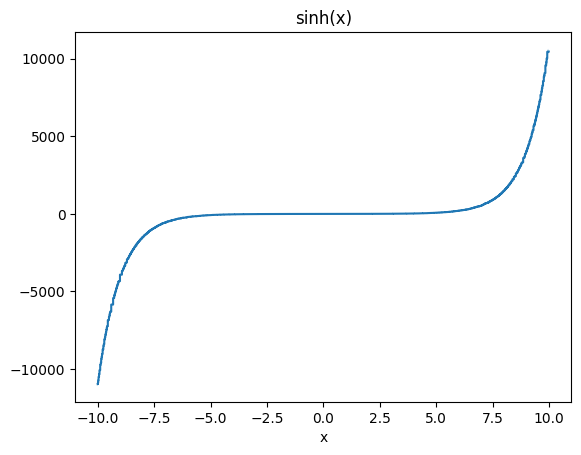

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.99)": -10975.8, "(-9.99, -9.98)": -10882.9, "(-9.98, -9.96)": -10734.5, "(-9.96, -9.94)": -10505.0, "(-9.94, -9.92)": -10332.6, "(-9.92, -9.89)": -10074.8, "(-9.89, -9.87)": -9728.5, "(-9.87, -9.85)": -9603.4, "(-9.85, -9.83)": -9359.6, "(-9.83, -9.82)": -9242.4, "(-9.82, -9.81)": -9164.5, "(-9.81, -9.78)": -9026.7, "(-9.78, -9.75)": -8738.3, "(-9.75, -9.74)": -8525.6, "(-9.74, -9.73)": -8460.7, "(-9.73, -9.71)": -8398.8, "(-9.71, -9.69)": -8099.4, "(-9.69, -9.68)": -8049.7, "(-9.68, -9.67)": -7960.6, "(-9.67, -9.65)": -7818.0, "(-9.65, -9.64)": -7754.5, "(-9.64, -9.64)": -7667.2, "(-9.64, -9.62)": -7639.3, "(-9.62, -9.61)": -7481.1, "(-9.61, -9.6)": -7437.0, "(-9.6, -9.59)": -7302.0, "(-9.59, -9.58)": -7280.4, "(-9.58, -9.55)": -7233.

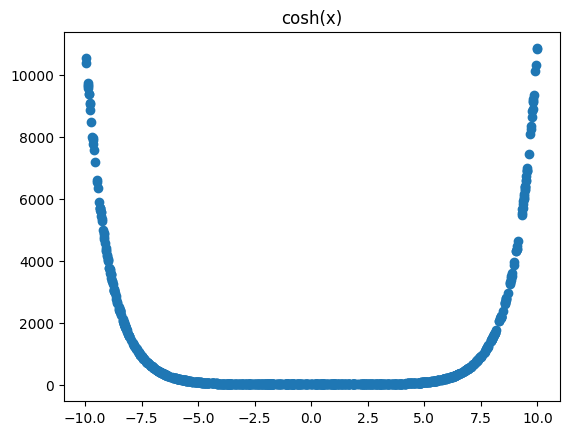

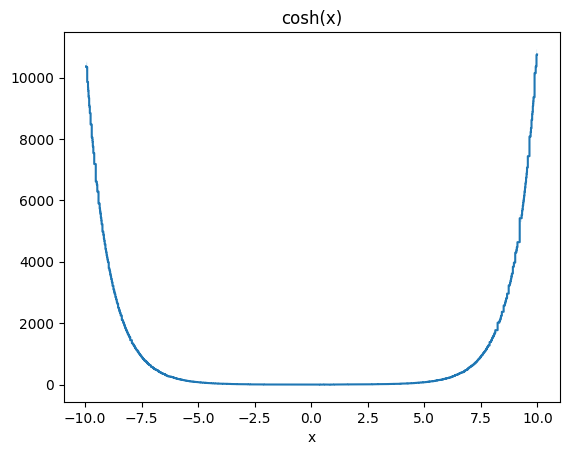

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.96, -9.95)": 10370.7, "(-9.95, -9.91)": 10346.2, "(-9.91, -9.87)": 9857.3, "(-9.87, -9.87)": 9693.9, "(-9.87, -9.86)": 9627.2, "(-9.86, -9.85)": 9571.6, "(-9.85, -9.84)": 9393.4, "(-9.84, -9.82)": 9340.9, "(-9.82, -9.81)": 9098.0, "(-9.81, -9.79)": 9035.2, "(-9.79, -9.76)": 8844.8, "(-9.76, -9.71)": 8475.6, "(-9.71, -9.68)": 8051.3, "(-9.68, -9.67)": 7962.3, "(-9.67, -9.66)": 7898.4, "(-9.66, -9.64)": 7759.8, "(-9.64, -9.6)": 7543.2, "(-9.6, -9.53)": 7186.0, "(-9.53, -9.48)": 6614.4, "(-9.48, -9.46)": 6517.5, "(-9.46, -9.41)": 6287.4, "(-9.41, -9.36)": 5900.4, "(-9.36, -9.34)": 5733.7, "(-9.34, -9.34)": 5704.5, "(-9.34, -9.34)": 5681.4, "(-9.34, -9.33)": 5635.5, "(-9.33, -9.32)": 5582.5, "(-9.32, -9.31)": 5549.7, "(-9.31, -9.29)": 5440.1, "(-

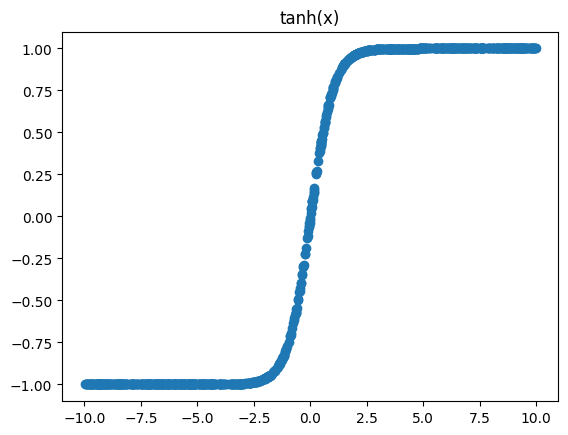

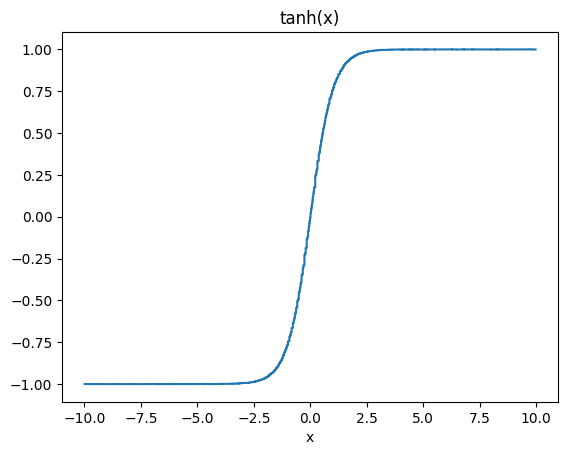

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -3.46)": -1.0, "(-3.46, -3.08)": -0.997, "(-3.08, -2.72)": -0.995, "(-2.72, -2.65)": -0.991, "(-2.65, -2.51)": -0.989, "(-2.51, -2.43)": -0.986, "(-2.43, -2.34)": -0.984, "(-2.34, -2.26)": -0.981, "(-2.26, -2.19)": -0.977, "(-2.19, -2.13)": -0.974, "(-2.13, -2.05)": -0.97, "(-2.05, -2.01)": -0.967, "(-2.01, -1.98)": -0.964, "(-1.98, -1.94)": -0.962, "(-1.94, -1.89)": -0.958, "(-1.89, -1.86)": -0.955, "(-1.86, -1.85)": -0.952, "(-1.85, -1.82)": -0.95, "(-1.82, -1.8)": -0.947, "(-1.8, -1.77)": -0.943, "(-1.77, -1.73)": -0.939, "(-1.73, -1.68)": -0.935, "(-1.68, -1.62)": -0.929, "(-1.62, -1.59)": -0.922, "(-1.59, -1.57)": -0.918, "(-1.57, -1.52)": -0.914, "(-1.52, -1.46)": -0.903, "(-1.46, -1.44)": -0.896, "(-1.44, -1.41)": -0.891, "(-1.41, 

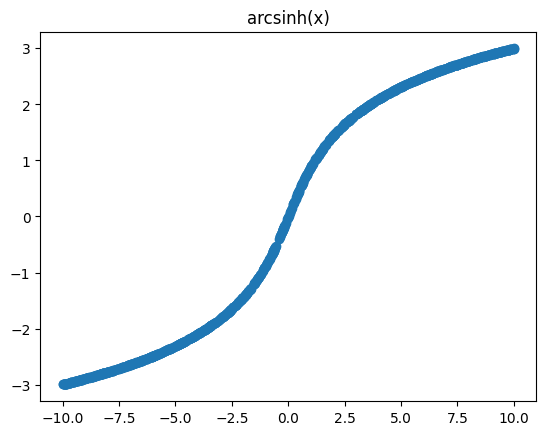

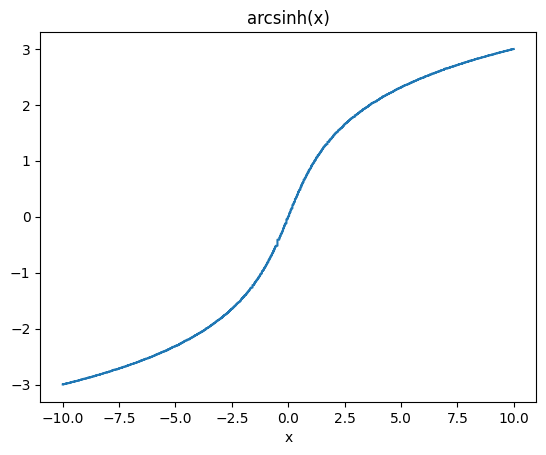

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.94)": -2.998, "(-9.94, -9.88)": -2.992, "(-9.88, -9.83)": -2.986, "(-9.83, -9.73)": -2.979, "(-9.73, -9.67)": -2.972, "(-9.67, -9.63)": -2.966, "(-9.63, -9.58)": -2.959, "(-9.58, -9.5)": -2.952, "(-9.5, -9.42)": -2.946, "(-9.42, -9.34)": -2.938, "(-9.34, -9.28)": -2.93, "(-9.28, -9.22)": -2.924, "(-9.22, -9.16)": -2.916, "(-9.16, -9.1)": -2.91, "(-9.1, -8.99)": -2.899, "(-8.99, -8.93)": -2.893, "(-8.93, -8.87)": -2.883, "(-8.87, -8.77)": -2.875, "(-8.77, -8.7)": -2.868, "(-8.7, -8.64)": -2.859, "(-8.64, -8.57)": -2.852, "(-8.57, -8.52)": -2.845, "(-8.52, -8.46)": -2.836, "(-8.46, -8.37)": -2.828, "(-8.37, -8.32)": -2.821, "(-8.32, -8.26)": -2.815, "(-8.26, -8.2)": -2.808, "(-8.2, -8.17)": -2.801, "(-8.17, -8.12)": -2.795, "(-8.12, -8.0

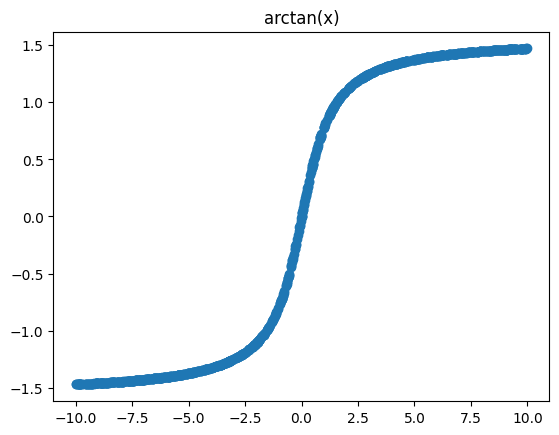

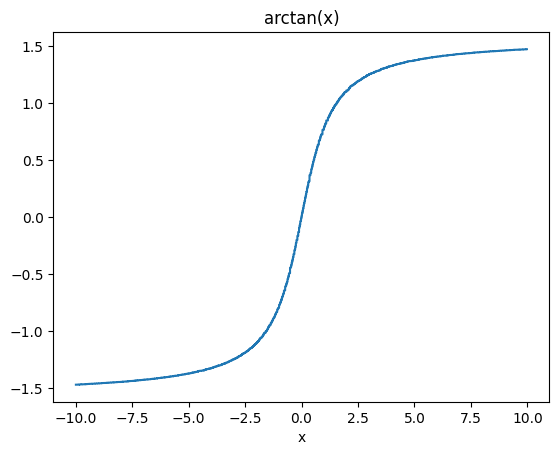

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.72)": -1.471, "(-9.72, -9.41)": -1.468, "(-9.41, -9.1)": -1.464, "(-9.1, -8.86)": -1.461, "(-8.86, -8.6)": -1.458, "(-8.6, -8.39)": -1.455, "(-8.39, -8.15)": -1.452, "(-8.15, -7.92)": -1.448, "(-7.92, -7.69)": -1.445, "(-7.69, -7.57)": -1.442, "(-7.57, -7.35)": -1.439, "(-7.35, -7.15)": -1.435, "(-7.15, -7.0)": -1.432, "(-7.0, -6.81)": -1.428, "(-6.81, -6.67)": -1.425, "(-6.67, -6.5)": -1.421, "(-6.5, -6.39)": -1.418, "(-6.39, -6.25)": -1.414, "(-6.25, -6.07)": -1.411, "(-6.07, -5.93)": -1.407, "(-5.93, -5.84)": -1.404, "(-5.84, -5.68)": -1.4, "(-5.68, -5.63)": -1.397, "(-5.63, -5.48)": -1.394, "(-5.48, -5.4)": -1.391, "(-5.4, -5.3)": -1.388, "(-5.3, -5.15)": -1.383, "(-5.15, -5.04)": -1.379, "(-5.04, -4.93)": -1.374, "(-4.93, -4.85)":

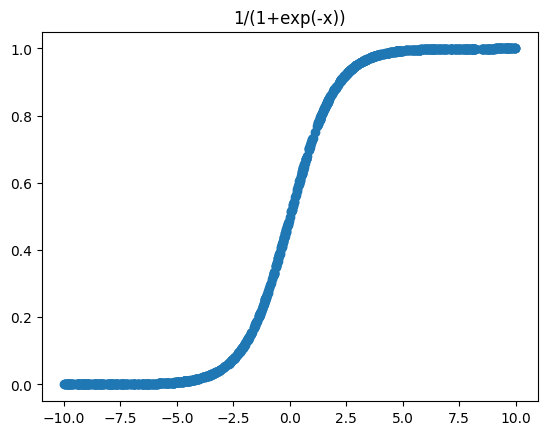

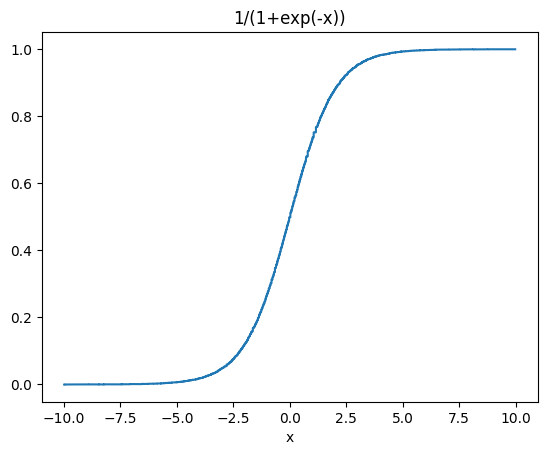

INFO: The graph of feature x was simplified by 0.1%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -8.37)": -0.001, "(-8.37, -6.54)": 0.001, "(-6.54, -5.8)": 0.002, "(-5.8, -5.5)": 0.003, "(-5.5, -5.22)": 0.005, "(-5.22, -4.96)": 0.006, "(-4.96, -4.79)": 0.007, "(-4.79, -4.68)": 0.008, "(-4.68, -4.51)": 0.01, "(-4.51, -4.48)": 0.011, "(-4.48, -4.34)": 0.012, "(-4.34, -4.2)": 0.013, "(-4.2, -4.15)": 0.014, "(-4.15, -4.07)": 0.016, "(-4.07, -4.03)": 0.017, "(-4.03, -3.94)": 0.018, "(-3.94, -3.84)": 0.019, "(-3.84, -3.83)": 0.021, "(-3.83, -3.76)": 0.022, "(-3.76, -3.69)": 0.023, "(-3.69, -3.61)": 0.025, "(-3.61, -3.53)": 0.027, "(-3.53, -3.49)": 0.028, "(-3.49, -3.44)": 0.03, "(-3.44, -3.37)": 0.032, "(-3.37, -3.31)": 0.034, "(-3.31, -3.28)": 0.035, "(-3.28, -3.24)": 0.037, "(-3.24, -3.21)": 0.038, "(-3.21, -3.18)": 0.039, "(-3.18, -3.16

In [66]:
from interpret.glassbox import ExplainableBoostingRegressor

fbench_functions_as_text = []
for f, n in fbench:
    x = np.random.uniform(-10, 10, 1000)
    y = f(x)
    ebm = ExplainableBoostingRegressor(feature_names=['x'])  
    ebm.fit(x.reshape(-1, 1), y)
    ebm_global = ebm.explain_global()

    # plot the function
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

    graph = graphs.extract_graph(ebm, 0)
    # add the intercept
    graph.scores = [x + ebm.intercept_ for x in graph.scores]
    #graphs.plot_graph(graph)
    #graph = t2ebm.graphs.simplify_graph(graph, min_variation_per_cent=0.01)
    graphs.plot_graph(graph)
    plt.title(n)    
    plt.show()

    graph_as_text = graphs.graph_to_text(graph, max_tokens=10000, x_axis_precision=2, confidence_bounds=False)
    print(graph_as_text)
    fbench_functions_as_text.append(graph_as_text)

In [67]:
# remove the 'preamble' from the text
fbench_functions_as_text = [x[141:] for x in fbench_functions_as_text]

In [68]:
# replace "means" with "graph"
fbench_functions_as_text = [x.replace("Means", "Graph") for x in fbench_functions_as_text]

In [69]:
fbench_functions_as_text

['Feature Name: x\nFeature Type: continuous\nGraph: {"(-9.99, -9.97)": -9.98, "(-9.97, -9.95)": -9.96, "(-9.95, -9.91)": -9.93, "(-9.91, -9.88)": -9.9, "(-9.88, -9.86)": -9.87, "(-9.86, -9.82)": -9.84, "(-9.82, -9.77)": -9.8, "(-9.77, -9.75)": -9.76, "(-9.75, -9.72)": -9.73, "(-9.72, -9.68)": -9.7, "(-9.68, -9.64)": -9.66, "(-9.64, -9.61)": -9.63, "(-9.61, -9.56)": -9.6, "(-9.56, -9.51)": -9.53, "(-9.51, -9.48)": -9.5, "(-9.48, -9.45)": -9.47, "(-9.45, -9.43)": -9.44, "(-9.43, -9.4)": -9.42, "(-9.4, -9.37)": -9.39, "(-9.37, -9.35)": -9.36, "(-9.35, -9.32)": -9.33, "(-9.32, -9.28)": -9.29, "(-9.28, -9.22)": -9.26, "(-9.22, -9.16)": -9.19, "(-9.16, -9.14)": -9.16, "(-9.14, -9.14)": -9.14, "(-9.14, -9.09)": -9.11, "(-9.09, -9.03)": -9.05, "(-9.03, -9.01)": -9.03, "(-9.01, -8.98)": -9.0, "(-8.98, -8.97)": -8.98, "(-8.97, -8.95)": -8.95, "(-8.95, -8.91)": -8.93, "(-8.91, -8.88)": -8.9, "(-8.88, -8.86)": -8.88, "(-8.86, -8.85)": -8.86, "(-8.85, -8.81)": -8.83, "(-8.81, -8.79)": -8.8, "(-8.79

# The test questions as we would present them to a human

In [ ]:
# randomly shuffle questions
np.random.seed(0)
np.random.shuffle(fbench_questions)


In [ ]:
for mc_options, solution in fbench_questions:
    # print the solution
    print(f"Solution: {fbench[solution][1]}")

Solution: exp(-x^2+1)+ 1/3 * |x|
Solution: -x ** 2 + 20 * tanh(5*x)
Solution: -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
Solution: sign(cos(x))
Solution: x + 1/3 * sin(5*x) + 3
Solution: tanh(x+10) - 1/3 * x 
Solution: x ** 3 + 250 * sin(x)
Solution: sin(x)+sin(2*x)
Solution: sin(x) + sin(3*x)
Solution: sqrt(x+10) + 1/3 * x 
Solution: exp(x)+ 4000 * sign(x)
Solution: abs(x) ** (1/10)
Solution: exp(x) + 4000* sin(x)
Solution: sign(x ** 2 - 15)
Solution: log(x+10) + 1/3 * x 
Solution: abs(x) + cos(x)
Solution: arctan(x) + sin(x)
Solution: -1/10 * x ** 3 + 20 * tanh(2*x)
Solution: sin(x)+cos(x)
Solution: exp(x)+ 2000 * abs(x)
Solution: sin(x) + sin(0.5 * x)
Solution: -x ** 2 + 2 * cos(5*x)
Solution: abs(x) + sin(x)
Solution: sign(sin(x))
Solution: |sin(x/2)|
Solution: tanh(x+10) - 1/3 * x + 1/8 * sin(5*x)
Solution: exp(-x+1)+ 2000 * abs(x+1)
Solution: -tanh(x) + 1/4 * x
Solution: sign(x) + cos(x)
Solution: abs(x ** 2 - 20)
Solution: 1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x

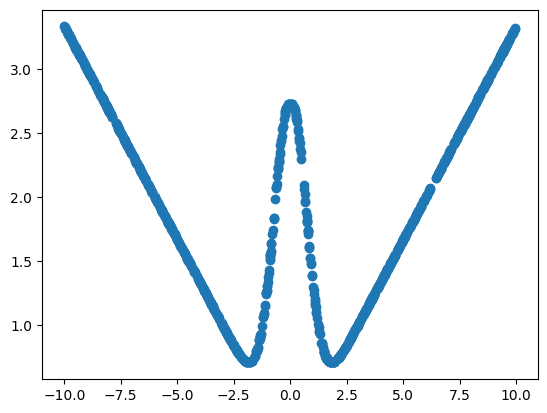

a) sqrt(x+10) + 1/3 * x 
b) sin(x)+cos(x)
c) |sin(x/2)|
d) arctan(x) + sin(x)
e) exp(-x^2+1)+ 1/3 * |x|
--------------------------------------------------------------------------------


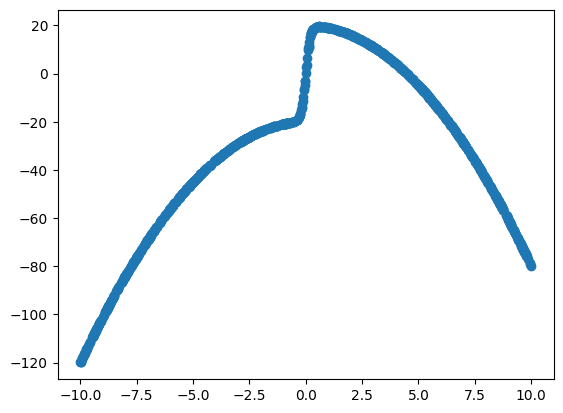

a) log(x+10) + 1/3 * x 
b) abs(x ** 2 - 20)
c) -x ** 2 + 20 * tanh(5*x)
d) exp(-x+1)+ 2000 * abs(x+1)
e) sin(x) + sin(0.5 * x)
--------------------------------------------------------------------------------


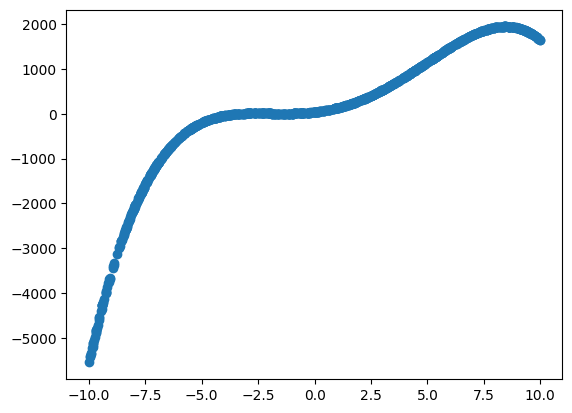

a) abs(x) ** (1/10)
b) exp(x)+ 4000 * sign(x)
c) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
d) sin(x) + sin(3*x)
e) sign(x) + cos(x)
--------------------------------------------------------------------------------


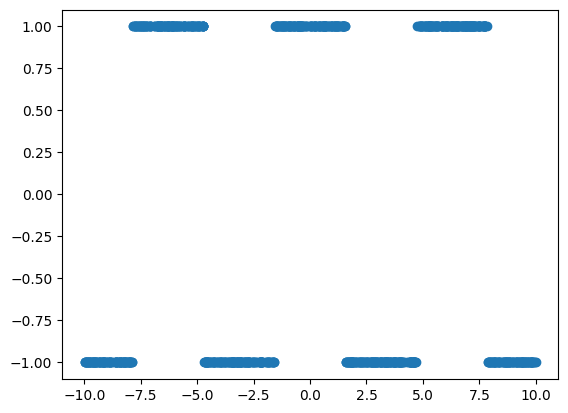

a) exp(-x+1)+ 2000 * abs(x+1)
b) sign(cos(x))
c) sign(x ** 2 - 15)
d) -tanh(x) + 1/4 * x
e) sign(x) + cos(x)
--------------------------------------------------------------------------------


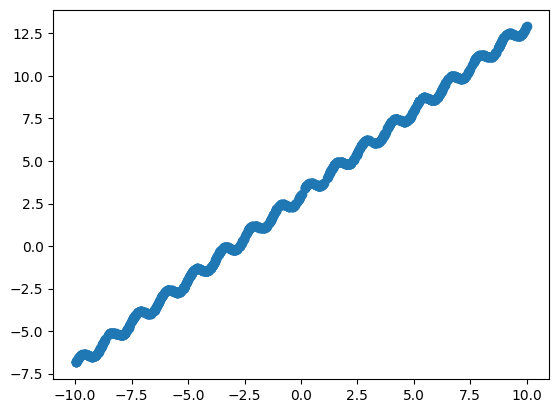

a) tanh(x+10) - 1/3 * x 
b) sin(x)+cos(x)
c) exp(x)+ 2000 * abs(x)
d) sign(x) + cos(x)
e) x + 1/3 * sin(5*x) + 3
--------------------------------------------------------------------------------


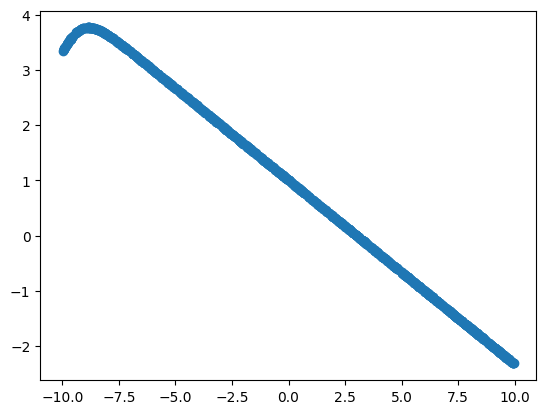

a) sin(x)+sin(2*x)
b) abs(x) ** (1/10)
c) log(x+10) + 1/3 * x 
d) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
e) tanh(x+10) - 1/3 * x 
--------------------------------------------------------------------------------


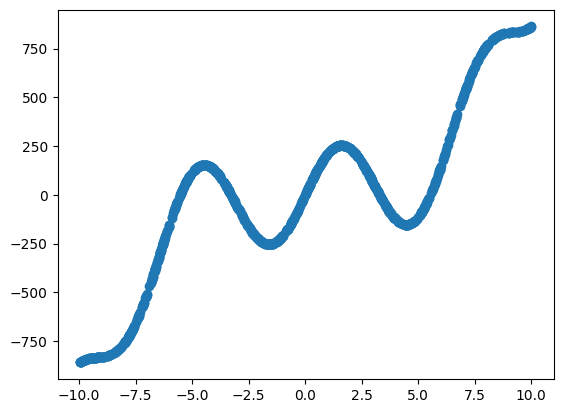

a) sin(x)+sin(2*x)
b) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
c) exp(x) + 4000* sin(x)
d) abs(x) ** (1/10)
e) x ** 3 + 250 * sin(x)
--------------------------------------------------------------------------------


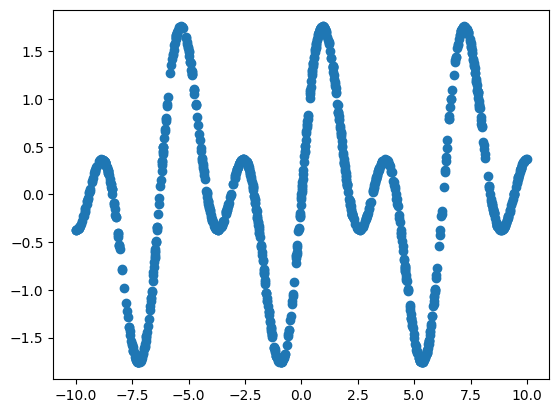

a) exp(x)+ 2000 * abs(x)
b) sin(x)+cos(x)
c) abs(x) + cos(x)
d) sin(x)+sin(2*x)
e) abs(x ** 2 - 20)
--------------------------------------------------------------------------------


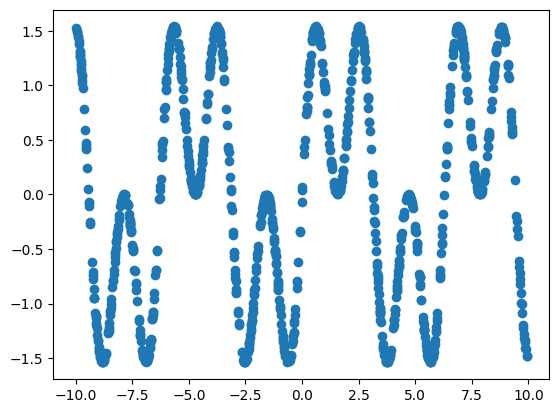

a) sin(x) + sin(3*x)
b) exp(-x^2+1)+ 1/3 * |x|
c) x + 1/3 * sin(5*x) + 3
d) -1/10 * x ** 3 + 20 * tanh(2*x)
e) exp(-x+1)+ 2000 * abs(x+1)
--------------------------------------------------------------------------------


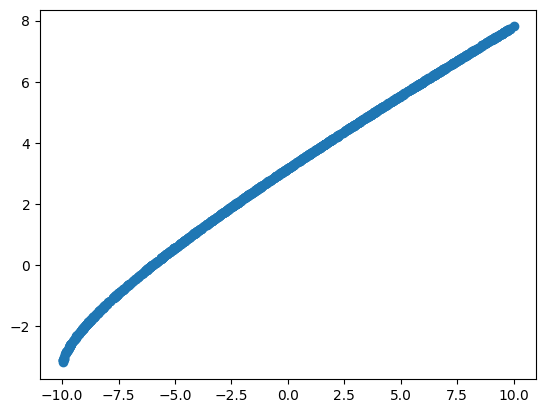

a) abs(x) + cos(x)
b) sqrt(x+10) + 1/3 * x 
c) log(x+10) + 1/3 * x 
d) exp(-x^2+1)+ 1/3 * |x|
e) exp(-x+1)+ 2000 * abs(x+1)
--------------------------------------------------------------------------------


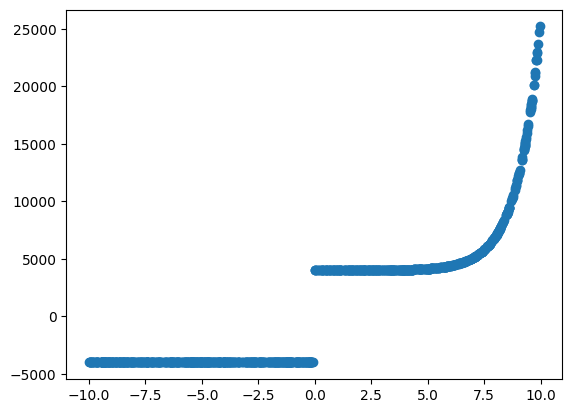

a) exp(x)+ 4000 * sign(x)
b) sign(x ** 2 - 15)
c) |sin(x/2)|
d) -tanh(x) + 1/4 * x
e) abs(x) + sin(x)
--------------------------------------------------------------------------------


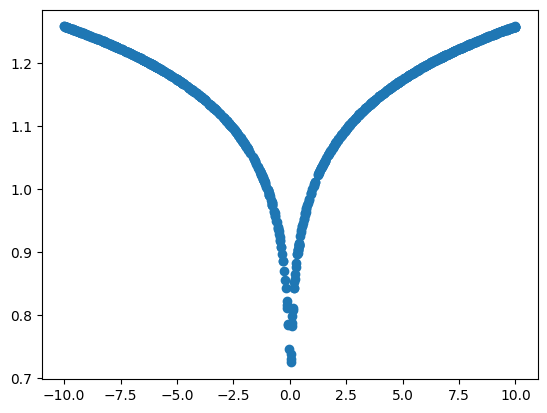

a) abs(x) ** (1/10)
b) -tanh(x) + 1/4 * x
c) sin(x)+sin(2*x)
d) sin(x) + sin(0.5 * x)
e) sign(cos(x))
--------------------------------------------------------------------------------


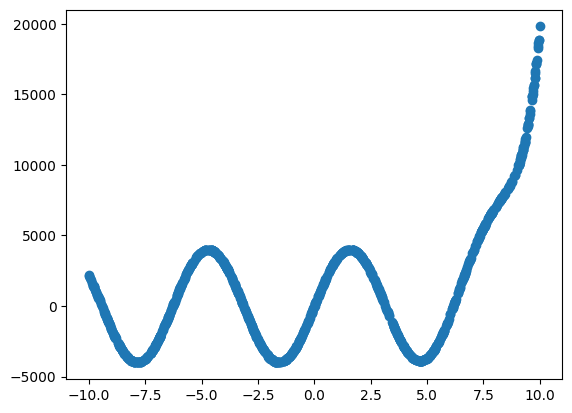

a) tanh(x+10) - 1/3 * x + 1/8 * sin(5*x)
b) sign(sin(x))
c) sign(cos(x))
d) exp(x)+ 2000 * abs(x)
e) exp(x) + 4000* sin(x)
--------------------------------------------------------------------------------


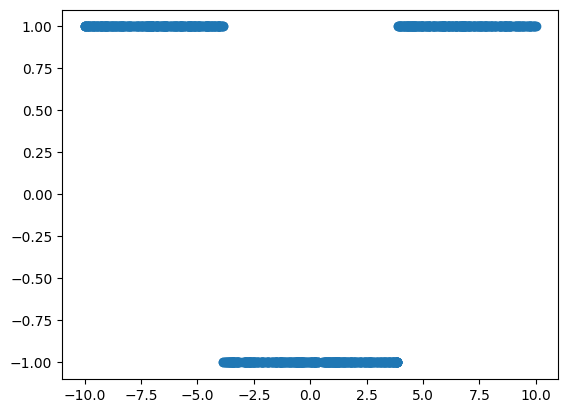

a) exp(x)+ 4000 * sign(x)
b) -tanh(x) + 1/4 * x
c) sin(x) + sin(3*x)
d) sign(x ** 2 - 15)
e) -1/10 * x ** 3 + 20 * tanh(2*x)
--------------------------------------------------------------------------------


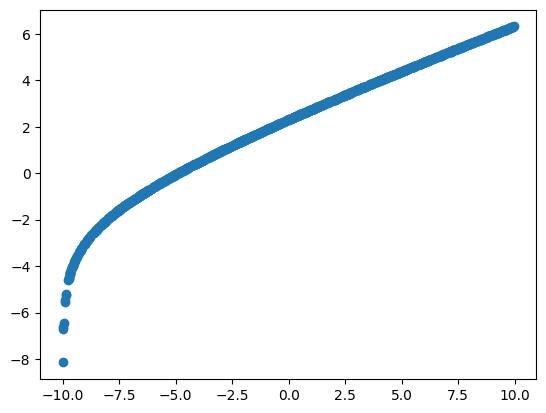

a) log(x+10) + 1/3 * x 
b) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
c) exp(x)+ 2000 * abs(x)
d) exp(-x+1)+ 2000 * abs(x+1)
e) sin(x)+sin(2*x)
--------------------------------------------------------------------------------


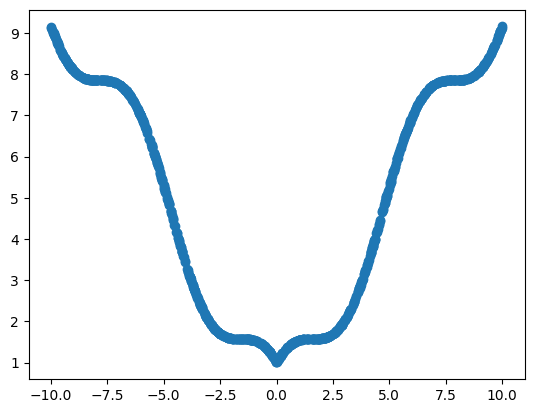

a) x ** 3 + 250 * sin(x)
b) abs(x) + sin(x)
c) abs(x) + cos(x)
d) sin(x)+cos(x)
e) -tanh(x) + 1/4 * x
--------------------------------------------------------------------------------


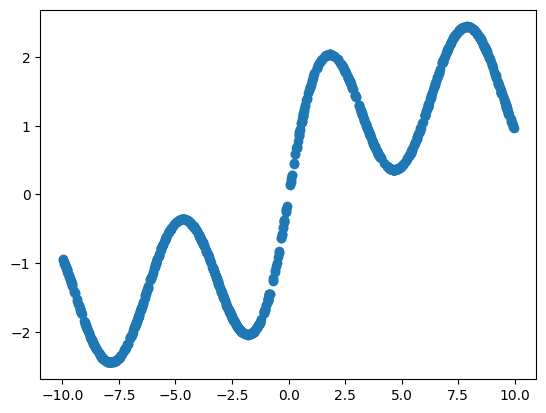

a) sign(x) + cos(x)
b) sin(x) + sin(0.5 * x)
c) exp(x)+ 2000 * abs(x)
d) sqrt(x+10) + 1/3 * x 
e) arctan(x) + sin(x)
--------------------------------------------------------------------------------


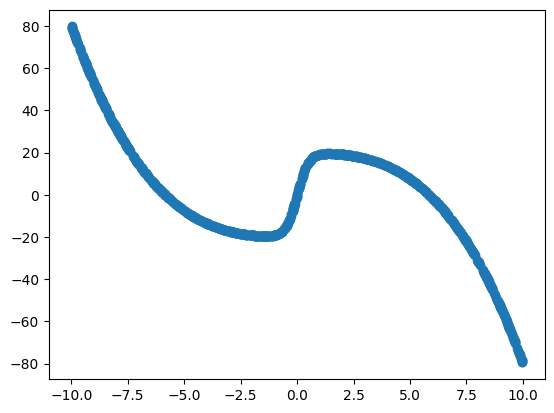

a) exp(-x+1)+ 2000 * abs(x+1)
b) x ** 3 + 250 * sin(x)
c) exp(x)+ 4000 * sign(x)
d) -1/10 * x ** 3 + 20 * tanh(2*x)
e) -x ** 2 + 20 * tanh(5*x)
--------------------------------------------------------------------------------


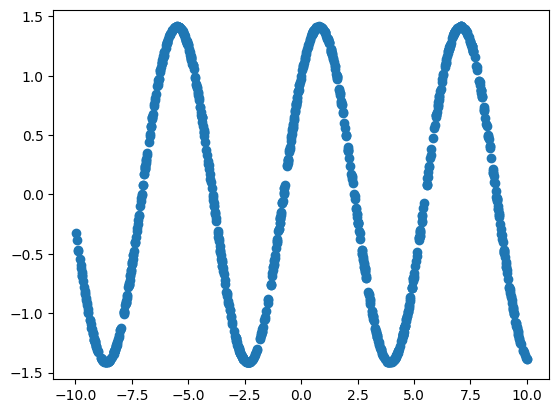

a) sin(x)+cos(x)
b) -tanh(x) + 1/4 * x
c) sqrt(x+10) + 1/3 * x 
d) sign(cos(x))
e) abs(x) + cos(x)
--------------------------------------------------------------------------------


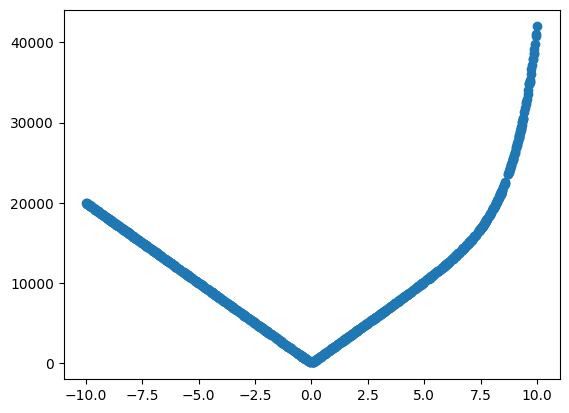

a) exp(-x+1)+ 2000 * abs(x+1)
b) -tanh(x) + 1/4 * x
c) sin(x) + sin(0.5 * x)
d) abs(x ** 2 - 20)
e) exp(x)+ 2000 * abs(x)
--------------------------------------------------------------------------------


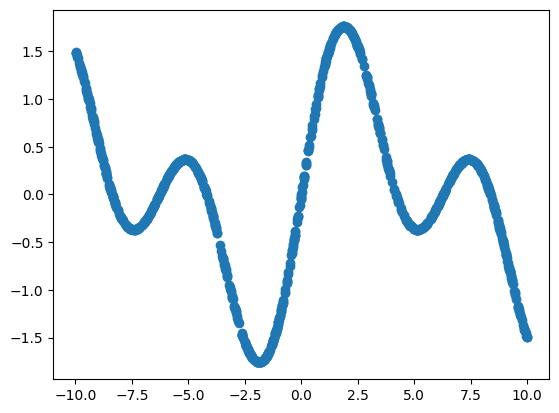

a) x + 1/3 * sin(5*x) + 3
b) sin(x) + sin(0.5 * x)
c) sign(x ** 2 - 15)
d) sin(x) + sin(3*x)
e) abs(x) + cos(x)
--------------------------------------------------------------------------------


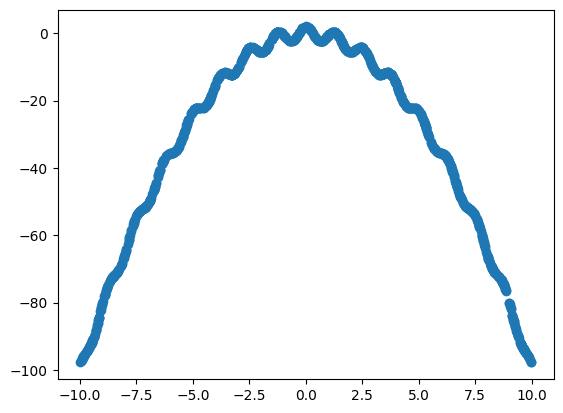

a) abs(x ** 2 - 20)
b) -x ** 2 + 2 * cos(5*x)
c) x ** 3 + 250 * sin(x)
d) sin(x)+sin(2*x)
e) exp(x) + 4000* sin(x)
--------------------------------------------------------------------------------


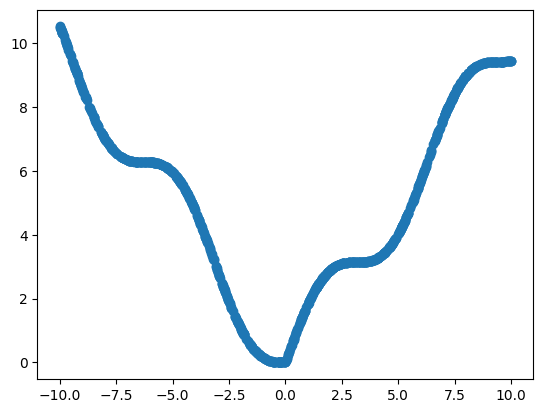

a) sign(cos(x))
b) exp(x) + 4000* sin(x)
c) abs(x) + sin(x)
d) x ** 3 + 250 * sin(x)
e) sin(x)+sin(2*x)
--------------------------------------------------------------------------------


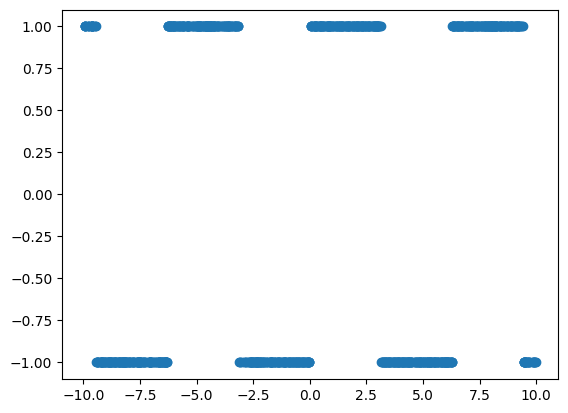

a) sign(sin(x))
b) tanh(x+10) - 1/3 * x 
c) sqrt(x+10) + 1/3 * x 
d) exp(-x+1)+ 2000 * abs(x+1)
e) sin(x)+cos(x)
--------------------------------------------------------------------------------


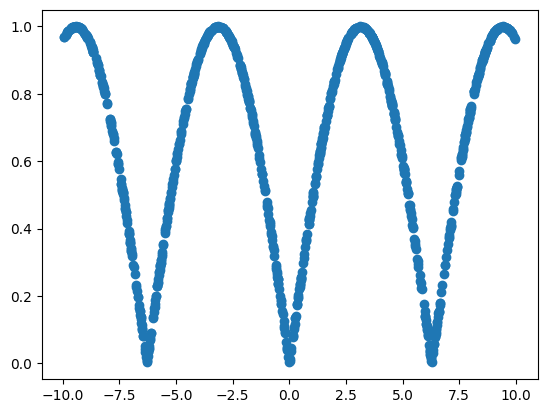

a) -tanh(x) + 1/4 * x
b) exp(-x^2+1)+ 1/3 * |x|
c) -x ** 2 + 2 * cos(5*x)
d) exp(x)+ 2000 * abs(x)
e) |sin(x/2)|
--------------------------------------------------------------------------------


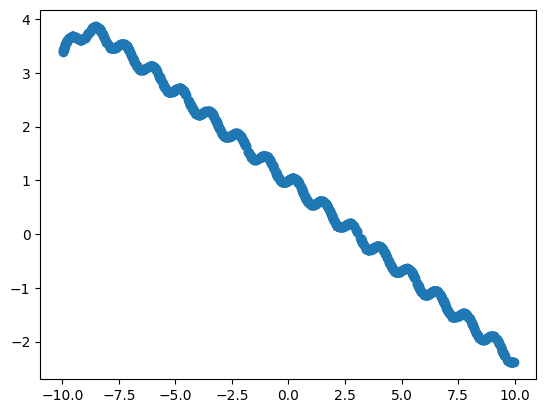

a) x ** 3 + 250 * sin(x)
b) abs(x) ** (1/10)
c) tanh(x+10) - 1/3 * x + 1/8 * sin(5*x)
d) tanh(x+10) - 1/3 * x 
e) -x ** 2 + 2 * cos(5*x)
--------------------------------------------------------------------------------


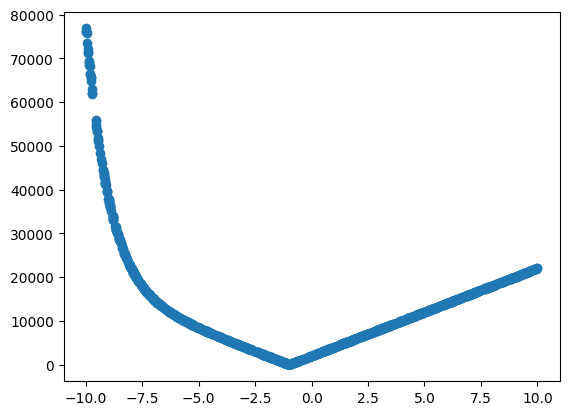

a) exp(x) + 4000* sin(x)
b) abs(x) + cos(x)
c) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
d) exp(-x+1)+ 2000 * abs(x+1)
e) sign(sin(x))
--------------------------------------------------------------------------------


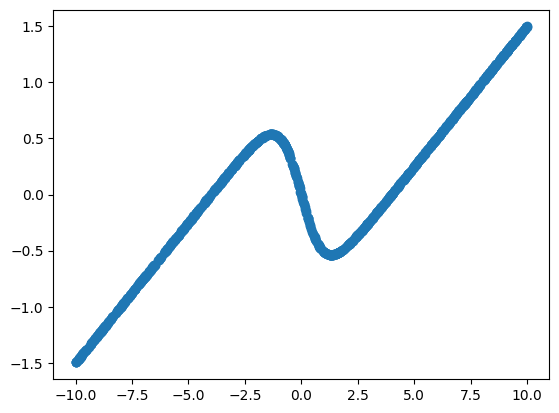

a) -tanh(x) + 1/4 * x
b) abs(x ** 2 - 20)
c) 1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
d) exp(-x+1)+ 2000 * abs(x+1)
e) sign(x) + cos(x)
--------------------------------------------------------------------------------


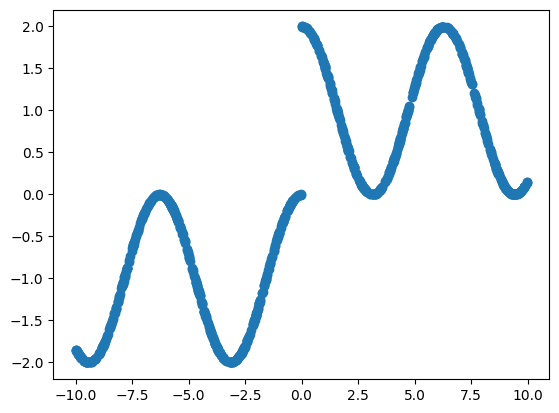

a) exp(x) + 4000* sin(x)
b) sign(x) + cos(x)
c) log(x+10) + 1/3 * x 
d) -1/10 * x ** 3 + 20 * tanh(2*x)
e) -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
--------------------------------------------------------------------------------


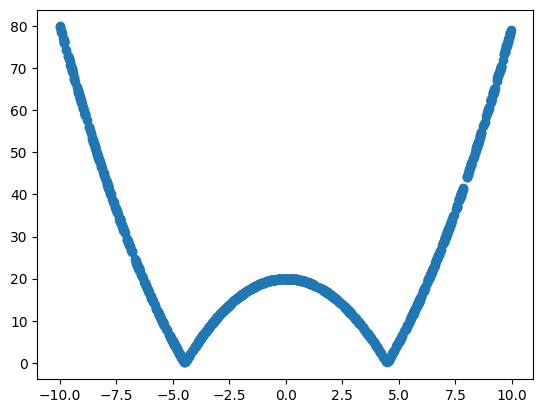

a) sign(cos(x))
b) exp(-x+1)+ 2000 * abs(x+1)
c) -x ** 2 + 20 * tanh(5*x)
d) exp(-x^2+1)+ 1/3 * |x|
e) abs(x ** 2 - 20)
--------------------------------------------------------------------------------


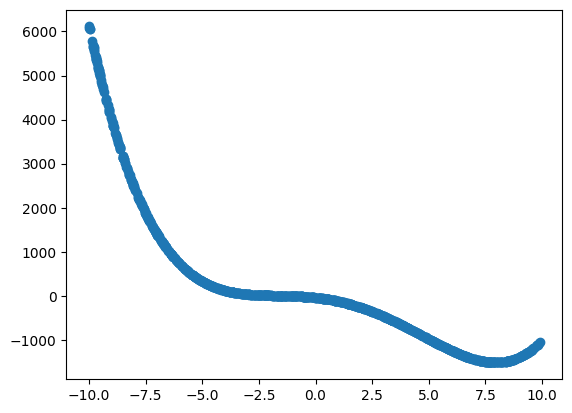

a) 1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1
b) abs(x) + cos(x)
c) exp(x) + 4000* sin(x)
d) sign(x ** 2 - 15)
e) abs(x ** 2 - 20)
--------------------------------------------------------------------------------


In [ ]:
for mc_options, solution in fbench_questions:
    # matplotlib draw the graph of the solution
    f, n = fbench[solution]
    x = np.random.uniform(-10, 10, 1000)
    y = f(x)
    plt.scatter(x, y)
    plt.show()
    # print the mc options
    for i, idx in enumerate(mc_options):
        print(f"{cases[i]} {fbench[idx][1]}")
    print('-'*80)


# Generate LLM questions

In [70]:
cases = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']
print(cases)

['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']


In [71]:
llm_questions = []
for mc_options, solution in fbench_questions:
    question = """Consider the following graph. The graph is presented as a JSON object with keys representing the x-axis and values representing the y-axis. The keys are intervals that represent ranges where the function takes the same value.\n"""
    question += f"\n{fbench_functions_as_text[solution]}\n"
    question += "The graph approximately depicts one of the following functions:\n\n"
    question += '\n'.join([f'{case} f(x) = {fbench[option][1]}' for case, option in zip(cases, mc_options)])
    question += "\n\nWhich of these functions is depicted in the graph? Think step by step."
    llm_questions.append(question)

In [72]:
print(llm_questions[0])

Consider the following graph. The graph is presented as a JSON object with keys representing the x-axis and values representing the y-axis. The keys are intervals that represent ranges where the function takes the same value.

Feature Name: x
Feature Type: continuous
Graph: {"(-9.99, -9.97)": -9.98, "(-9.97, -9.95)": -9.96, "(-9.95, -9.91)": -9.93, "(-9.91, -9.88)": -9.9, "(-9.88, -9.86)": -9.87, "(-9.86, -9.82)": -9.84, "(-9.82, -9.77)": -9.8, "(-9.77, -9.75)": -9.76, "(-9.75, -9.72)": -9.73, "(-9.72, -9.68)": -9.7, "(-9.68, -9.64)": -9.66, "(-9.64, -9.61)": -9.63, "(-9.61, -9.56)": -9.6, "(-9.56, -9.51)": -9.53, "(-9.51, -9.48)": -9.5, "(-9.48, -9.45)": -9.47, "(-9.45, -9.43)": -9.44, "(-9.43, -9.4)": -9.42, "(-9.4, -9.37)": -9.39, "(-9.37, -9.35)": -9.36, "(-9.35, -9.32)": -9.33, "(-9.32, -9.28)": -9.29, "(-9.28, -9.22)": -9.26, "(-9.22, -9.16)": -9.19, "(-9.16, -9.14)": -9.16, "(-9.14, -9.14)": -9.14, "(-9.14, -9.09)": -9.11, "(-9.09, -9.03)": -9.05, "(-9.03, -9.01)": -9.03, "(-9.0

# Benchmark gpt-4-turbo-2024-04-09

In [40]:
for idx, question in enumerate(llm_questions):
    print(f'Graph {fbench[idx][1]}\n')
    messages = []
    messages.append({'role': 'system', 'content': "You are an expert statistician and data scientist."})
    messages.append({'role': 'user', 'content': question})
    response = t2ebm.utils.openai_completion_query('gpt-4-turbo-2024-04-09', messages)
    print(response)
    print('-'*80)

Graph x

To determine which function is depicted in the JSON graph, let's examine the behavior of the graph and compare it to the key features of the functions listed.

### Step-by-step Analysis

1. **Graph Overview**:
   The JSON object has keys as intervals ("a, b") and values as numbers which are approximately in the middle of the interval's start and end. This suggests an approximate relationship where y ≈ x within each interval.

2. **Examining Functions**:
   - **f(x) = x**: This function directly maps x to y. A graph for this function would be a straight line with a slope of 1 passing through the origin.
   - **f(x) = sign(x)**: This function returns -1 for x < 0, 0 for x = 0, and +1 for x > 0, so its graph would be flat lines at -1, 0, and +1.
   - **f(x) = -3*x^3**: This cubic function would show curvature and asymmetric behavior around zero, with sharp turns dependent on the negative cubic power.
   - **f(x) = sign(x+3)**: This would shift the graph of f(x) = sign(x) to the l

In [62]:
23 / 30

0.7666666666666667

# gpt-4-turbo-2024-04-09 with longer context

In [73]:
for idx, question in enumerate(llm_questions):
    print(f'Graph {fbench[idx][1]}\n')
    messages = []
    messages.append({'role': 'system', 'content': "You are an expert statistician and data scientist."})
    messages.append({'role': 'user', 'content': question})
    response = t2ebm.utils.openai_completion_query('gpt-4-turbo-2024-04-09', messages)
    print(response)
    print('-'*80)

Graph x

To determine which function is depicted by the graph provided in the JSON object, we can follow a step-by-step method to analyze the relationship between the x-axis values (intervals) and their corresponding y-axis values. Let's consider each function option provided:

### Option a: f(x) = x
This is a linear function with a slope of 1. If this were the correct function, values on the y-axis should be equal to their corresponding midpoint x values in each interval.

### Option b: f(x) = sign(x)
This function results in values of -1 for negative x, 0 for x=0, and 1 for positive x. The output is not continuous, but should only output -1, 0, or 1, reflecting the sign of x.

### Option c: f(x) = -3*x^3
This is a cubic function scaled by -3. For increasing x, |y| should increase more dramatically than linearly (rapidly growing as x moves away from zero).

### Option d: f(x) = sign(x+3)
This function shifts the standard sign function to the left by 3 units. Thus, it outputs -1 for x 

In [75]:
19 / 30

0.6333333333333333

# Benchmark gemini-1.5-pro-latest

In [ ]:
import google.generativeai as genai

In [ ]:
genai.configure(api_key=os.environ['GENAI_API_KEY'])

In [57]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")

In [58]:
def to_gemini(messages):
    gemini_messages = []
    for message in messages:
        if message["role"] == "system":
            pass
        elif message["role"] == "user":
            gemini_messages.append({'role':'user', 'parts': [message['content']]})
        elif message["role"] == "assistant":
            gemini_messages.append({'role':'model', 'parts': [message['content']]})
        else:
            raise ValueError("Unknown message role: {}".format(message["role"]))
    return gemini_messages

In [59]:
import time

for idx, question in enumerate(llm_questions):
    print(f'Graph {fbench[idx][1]}\n')
    messages = []
    messages.append({'role': 'system', 'content': "You are an expert statistician and data scientist."})
    messages.append({'role': 'user', 'content': question})
    response = model.generate_content(
                to_gemini(messages),
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,
                    max_output_tokens=500,
                    temperature=1),
            )
    try:
        response = response.text
    except:
        print(f"Gemini: Invalid response with parts {response.parts}.")
        response = ""
    print(response)
    print('-'*80)
    # sleep 30 sec to avoid rate limit
    time.sleep(30)

Graph x

Let's analyze the graph step-by-step to determine the correct function:

1. **Observe the General Trend:** The graph seems to have a generally increasing trend. As x increases, y also increases. This eliminates options b) and d) since the sign function primarily outputs -1, 0, or 1 and wouldn't have a consistently increasing trend.

2. **Check for Symmetry:**  The graph is not symmetric about the y-axis or the origin. This eliminates option c), as cubic functions have specific symmetry properties.

3. **Analyze the Rate of Increase:** The graph's rate of increase appears to become steeper as x increases. This suggests an exponential function rather than a linear function. This eliminates option a). 

4. **Consider Option e):**  The function f(x) = 2^(x-5) is an exponential function that would indeed exhibit an increasing trend with a steeper rate of increase as x grows. This seems to fit the observed pattern of the graph. 

**Therefore, the function depicted in the graph is mo

In [61]:
19 / 30

0.6333333333333333

# Benchmark gemini-1.5-flash-latest

In [ ]:
model = genai.GenerativeModel(model_name="gemini-1.5-flash-latest")

In [53]:
for idx, question in enumerate(llm_questions):
    print(f'Graph {fbench[idx][1]}\n')
    messages = []
    messages.append({'role': 'system', 'content': "You are an expert statistician and data scientist."})
    messages.append({'role': 'user', 'content': question})
    response = model.generate_content(
                to_gemini(messages),
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,
                    max_output_tokens=500,
                    temperature=1),
            )
    try:
        response = response.text
    except:
        print(f"Gemini: Invalid response with parts {response.parts}.")
        response = ""
    print(response)
    print('-'*80)

Graph x

Let's analyze the graph step-by-step and eliminate options:

1. **The graph is not a straight line:** This eliminates options **a) f(x) = x** and **d) f(x) = sign(x+3)**. The sign function is always either -1, 0, or 1, resulting in a horizontal line with jumps.

2. **The graph is not strictly increasing or decreasing:** This eliminates options **c) f(x) = -3*x^3** and **e) f(x) = 2^(x-5)**.  A cubic function like -3x^3 would be decreasing for positive x and increasing for negative x. An exponential function like 2^(x-5) would be increasing throughout its domain.

3. **The graph has a constant value within intervals:** This is a key characteristic of the sign function. The sign function is either -1, 0, or 1. Within each interval, the graph is constant, which is a typical behavior for the sign function.

**Therefore, the graph approximately depicts the function b) f(x) = sign(x).** 

The graph shows that the function is -1 for negative x values, 0 for x = 0, and 1 for positive 

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)



models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
